In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.dpi'] = 300

In [3]:
pd.set_option('display.max_rows', None)  # Показать все строки
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('dataset.csv')
df.head()

/var/folders/nv/y1xwhy_x1gx4gn0wks7mdjqc0000gn/T/ipykernel_81468/3741571952.py:1: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/aleksejgavrikov/Downloads/huita.csv')


unnamed:_0          region        date    coord_l    coord_w  \
0           6  Алтайский край  2015-01-31  81.151944  53.740000   
1           8  Алтайский край  2015-01-30  85.018056  51.684444   
2          12  Алтайский край  2015-01-30  81.250000  53.818056   
3          42  Алтайский край  2015-01-23  84.000000  53.000000   
4          47  Алтайский край  2015-01-22  83.920556  53.463056   

                                           road_name  road_category  \
0       Романово - Завьялово - Баево - Камень-на-Оби            5.0   
1                            Куяган - Куяча - Тоурак            6.0   
2  Барнаул - Камень-на-Оби - граница Новосибирско...            5.0   
3  Быканов Мост - Солоновка - Солонешное - границ...            7.0   
4  Р-256 Чуйский тракт Новосибирск - Барнаул - Го...            3.0   

   n_vehicles  n_participants  n_deaths  n_injured  vehicle_failure  \
0           1               3         0          3                0   
1           2               3         0          2                0   
2           2               3         0          1                0   
3           1               2         1          1                0   
4           1               2         0          1                0   

   non_private_vehicle  white_vehicle  black_vehicle  colored_vehicle  \
0                    0              0              0                1   
1                    1              1              0                1   
2                    0              1              0                1   
3                    0              0              0                1   
4                    0              0              0                1   

   drunk_driver  female_driver  escaped  no_seatbelt_injury  n_drunk  \
0             0              0        1                   1        0   
1             0              0        0                   0        0   
2             0              0        0                   0        0   
3             0              0        0                   0        0   
4             0              1        0                   0        0   

   n_children  n_cyclists  vehicle_age_min  vehicle_age_max  vehicle_age_avg  \
0           0           0           2003.0           2003.0           2003.0   
1           0           0           2002.0           2004.0           2003.0   
2           0           0           2005.0           2008.0           2006.5   
3           0           0           2003.0           2003.0           2003.0   
4           0           0           2005.0           2005.0           2005.0   

   n_class_a  n_class_b  n_class_c  n_class_d  n_class_e  n_class_s  \
0          0          1          0          0          0          0   
1          1          0          0          0          0          0   
2          0          1          0          0          0          0   
3          0          1          0          0          0          0   
4          0          0          0          0          0          0   

   n_front_drive  n_rear_drive  n_4wd  n_guilty  guilty_share  \
0              0             0      0         1           1.0   
1              0             0      0         1           0.5   
2              0             0      0         1           0.5   
3              0             0      0         1           1.0   
4              0             0      0         1           1.0   

   n_fatal_violations  guilty_exp_avg  exp_avg  \
0                   4            17.0     17.0   
1                   1             7.0     10.0   
2                   1             2.0     15.5   
3                   1            18.0     18.0   
4                   2            16.0     16.0   

                                       road_rank_cat road_defects_cat  \
0  Региональная или межмуниципальная (дорога реги...   Не установлены   
1  Региональная или межмуниципальная (дорога реги...   Не установлены   
2  Региональная или межмуниципальная (дорога реги...   

In [5]:
# Создаем словарь для замены, объединяя похожие формулировки
replace_dict = {
    'Местного значения (дороги местного значения, включая относящиеся к собственности поселений, муниципальных районов, городских округов)': 
    'Местного значения (дорога местного значения, включая относящиеся к собственности поселений, муниципальных районов, городских округов)',
    'Частная (дороги, относящиеся к частной и иным формам собственности)':
    'Частная (дорога, относящиеся к частной и иным формам собственности)',
    'Иная дорога':
    'Другие места'
}

# Применяем замену
df['road_rank_cat'] = df['road_rank_cat'].replace(replace_dict)

# Проверка
print(df['road_rank_cat'].value_counts())

road_rank_cat
Региональная или межмуниципальная (дорога регионального или межмуниципального значения)                                                  253296
Федеральная (дорога федерального значения)                                                                                               170354
Местного значения (дорога местного значения, включая относящиеся к собственности поселений, муниципальных районов, городских округов)     33287
Не указано                                                                                                                                 1776
Другие места                                                                                                                               1698
Частная (дорога, относящиеся к частной и иным формам собственности)                                                                        1014
Name: count, dtype: int64


Шрифт 'HSE Sans' установлен


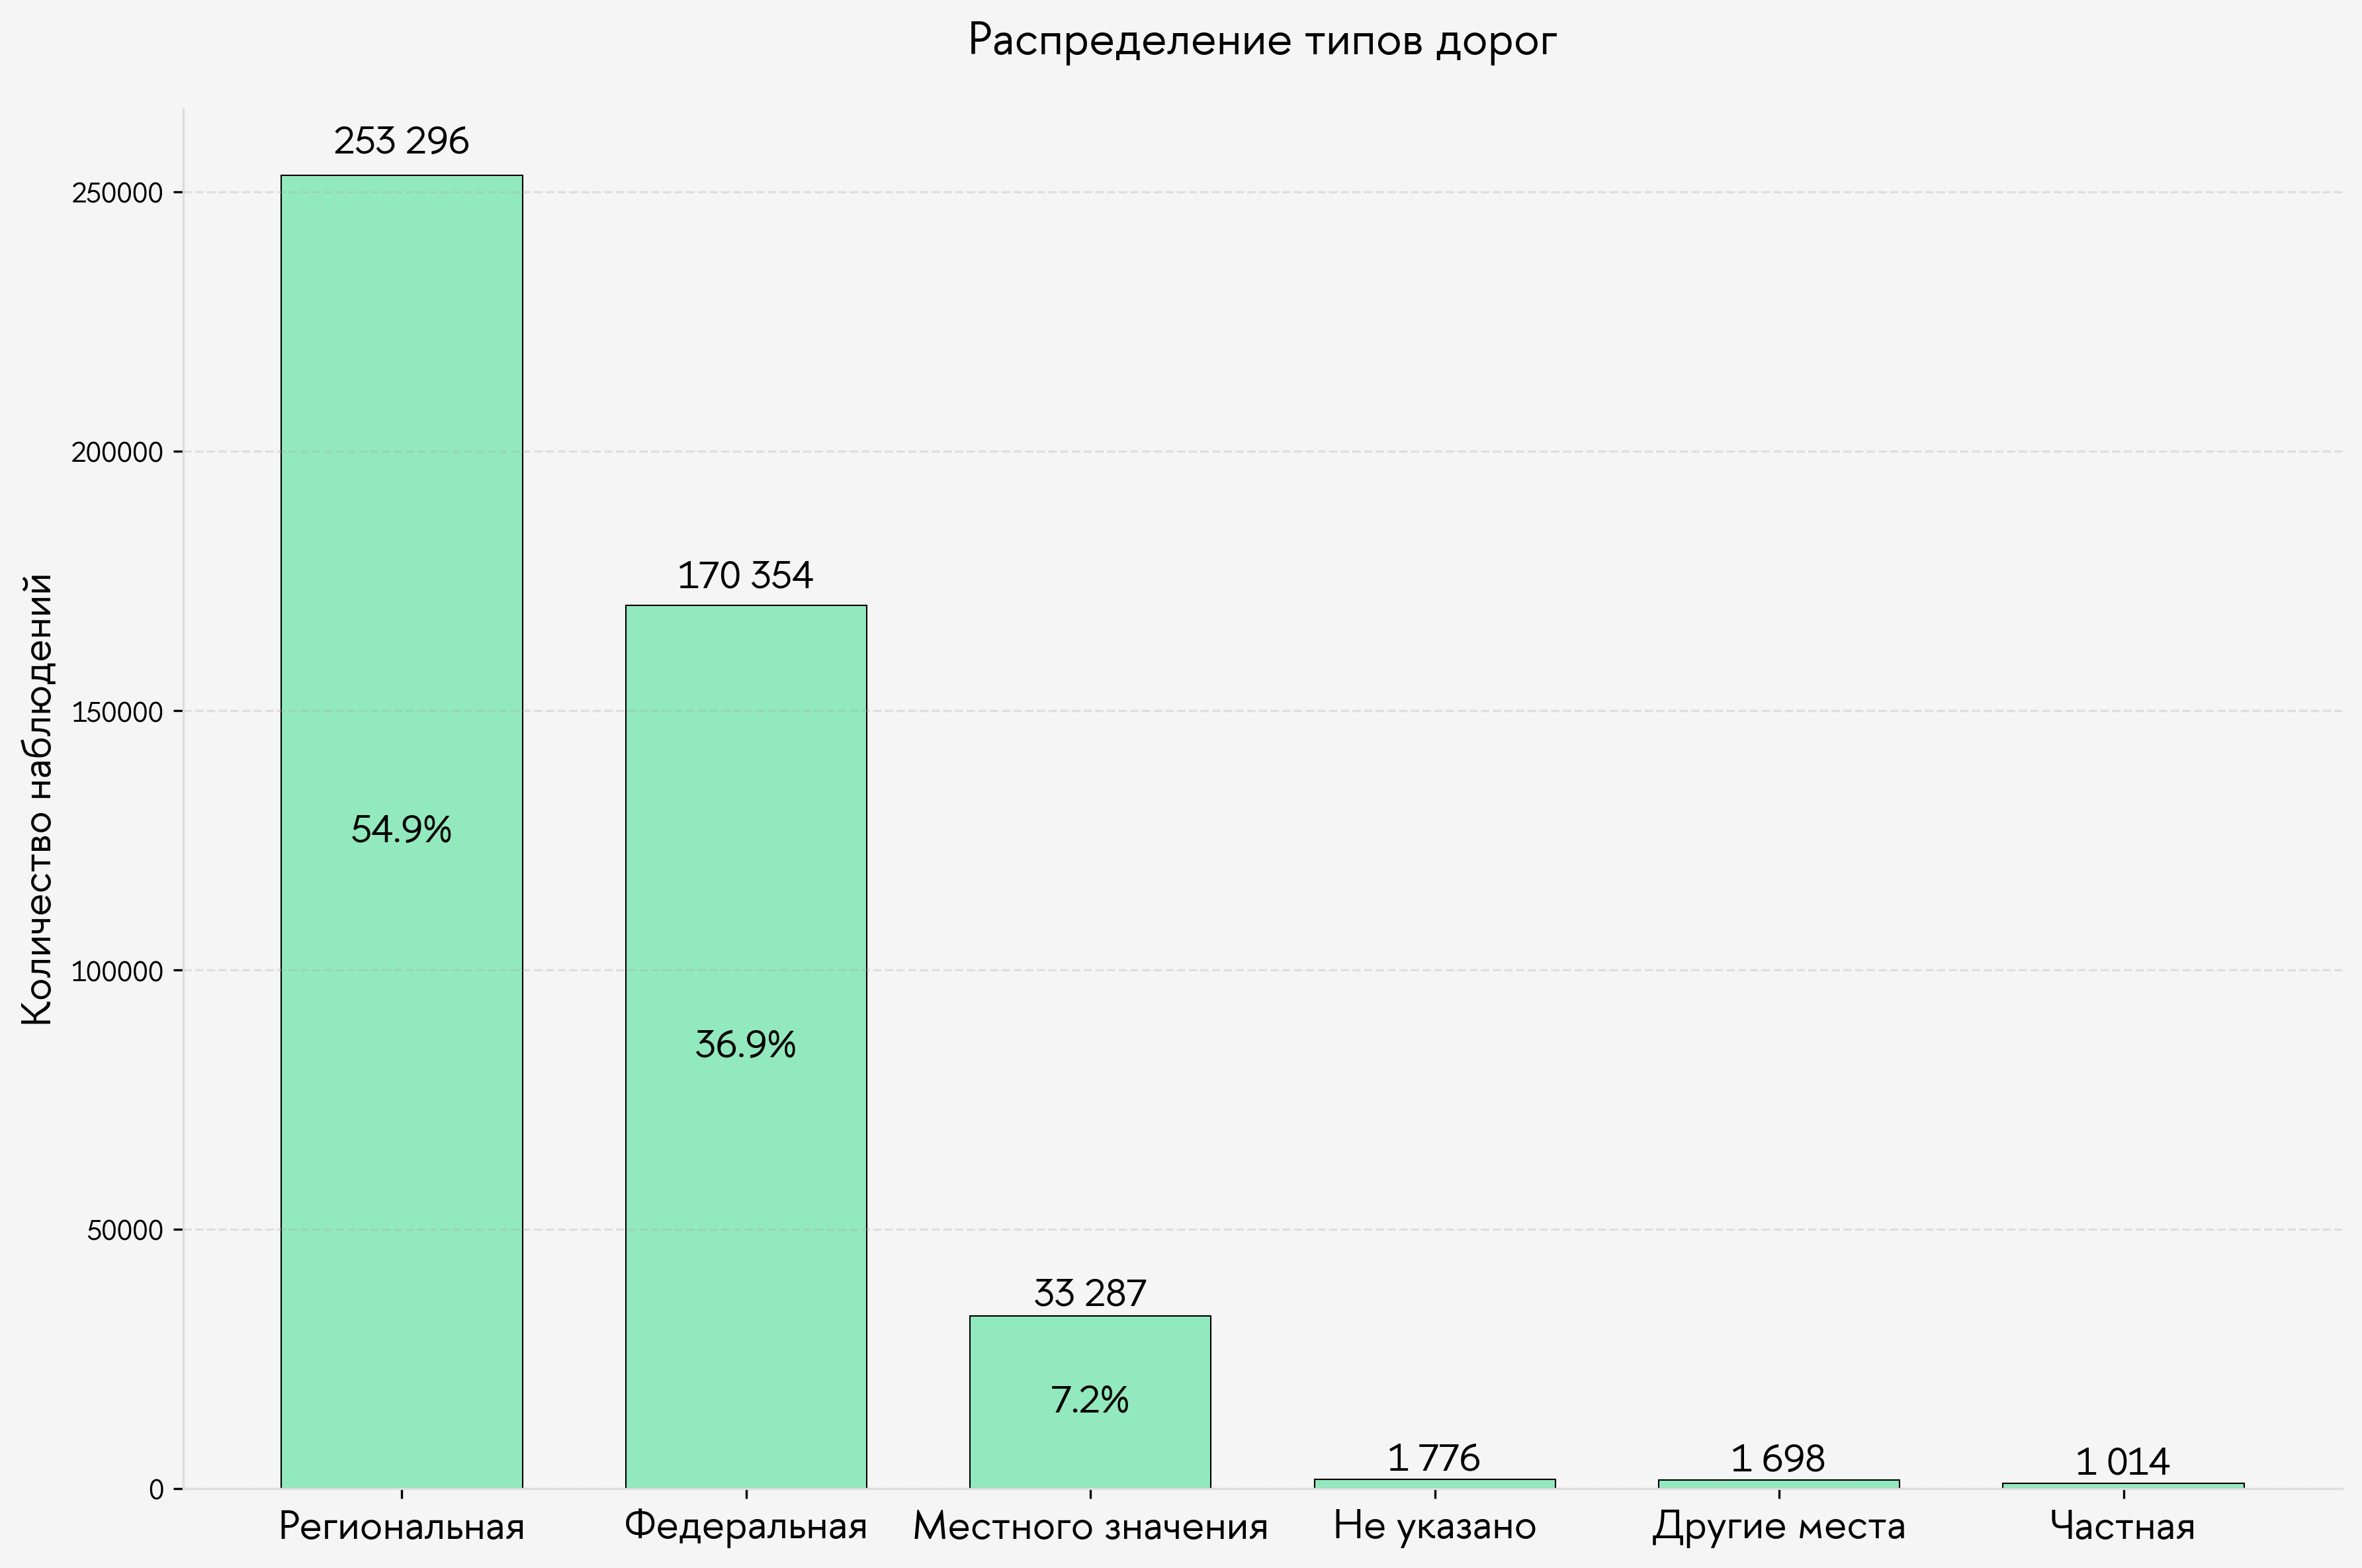

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from pathlib import Path

# Установка шрифта HSE Sans
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()

if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name
    print(f"Шрифт '{font_name}' установлен")
else:
    print("Шрифт HSE Sans не найден, используется системный")

# Получение данных
value_counts = df['road_rank_cat'].value_counts()

# Рассчитываем проценты
total = value_counts.sum()
percentages = (value_counts.values / total * 100).round(1)

# СОЗДАЕМ КОРОТКИЕ НАЗВАНИЯ (только до скобки '(')
short_names = []
for name in value_counts.index:
    if '(' in name:
        short_name = name.split('(')[0].strip()
        if short_name == 'Региональная или межмуниципальная':
            short_name = 'Региональная'
    else:
        short_name = name
    short_names.append(short_name)

# СОЗДАЕМ ВЕРТИКАЛЬНЫЙ BAR PLOT (столбцы вверх)
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#F5F5F5')  # фон фигуры
ax.set_facecolor('#F5F5F5')  # фон графика

# Создание bar plot - ВСЕ столбцы ОДНИМ цветом (#93E9BE - светлозеленый)
bars = ax.bar(
    short_names,  # используем короткие названия напрямую
    value_counts.values,  # высоты столбцов
    color='#93E9BE',  # Все столбцы одним цветом
    width=0.7,
    edgecolor='#000000',  # черная обводка для контраста
    linewidth=0.5
)

# Настройки внешнего вида
ax.set_ylabel('Количество наблюдений', fontsize=15)
ax.set_title('Распределение типов дорог', fontsize=17, fontweight='bold', pad=20)

# Поворачиваем подписи для лучшей читаемости
plt.xticks(rotation=0, fontsize=15)

# Убираем рамку
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# Добавляем вертикальную сетку
ax.grid(axis='y', linestyle='--', alpha=0.3, color='#AAAAAA')

# ДОБАВЛЯЕМ ПРОЦЕНТЫ ВНУТРИ СТОЛБЦОВ (в центре)
for i, bar in enumerate(bars):
    height = bar.get_height()
    percent = percentages[i]
    
    # Процент ВНУТРИ столбца в центре
    if i <= 2:
        ax.text(bar.get_x() + bar.get_width()/2,
            height / 2,  # РОВНО ПО ЦЕНТРУ столбца
            f'{percent}%',
            ha='center',
            va='center',
            fontsize=14,
            fontweight='bold',
            color='black')  # белый цвет для контраста на зеленом фоне
    
    # Количество НАД столбцом
    ax.text(bar.get_x() + bar.get_width()/2,
            height + height * 0.01,  # немного выше столбца
            f'{int(height):,}'.replace(',', ' '),
            ha='center',
            va='bottom',
            fontsize=14,
            fontweight='medium')

# Устанавливаем отступ
plt.tight_layout()

# Показываем график
plt.show()

Шрифт 'HSE Sans' установлен


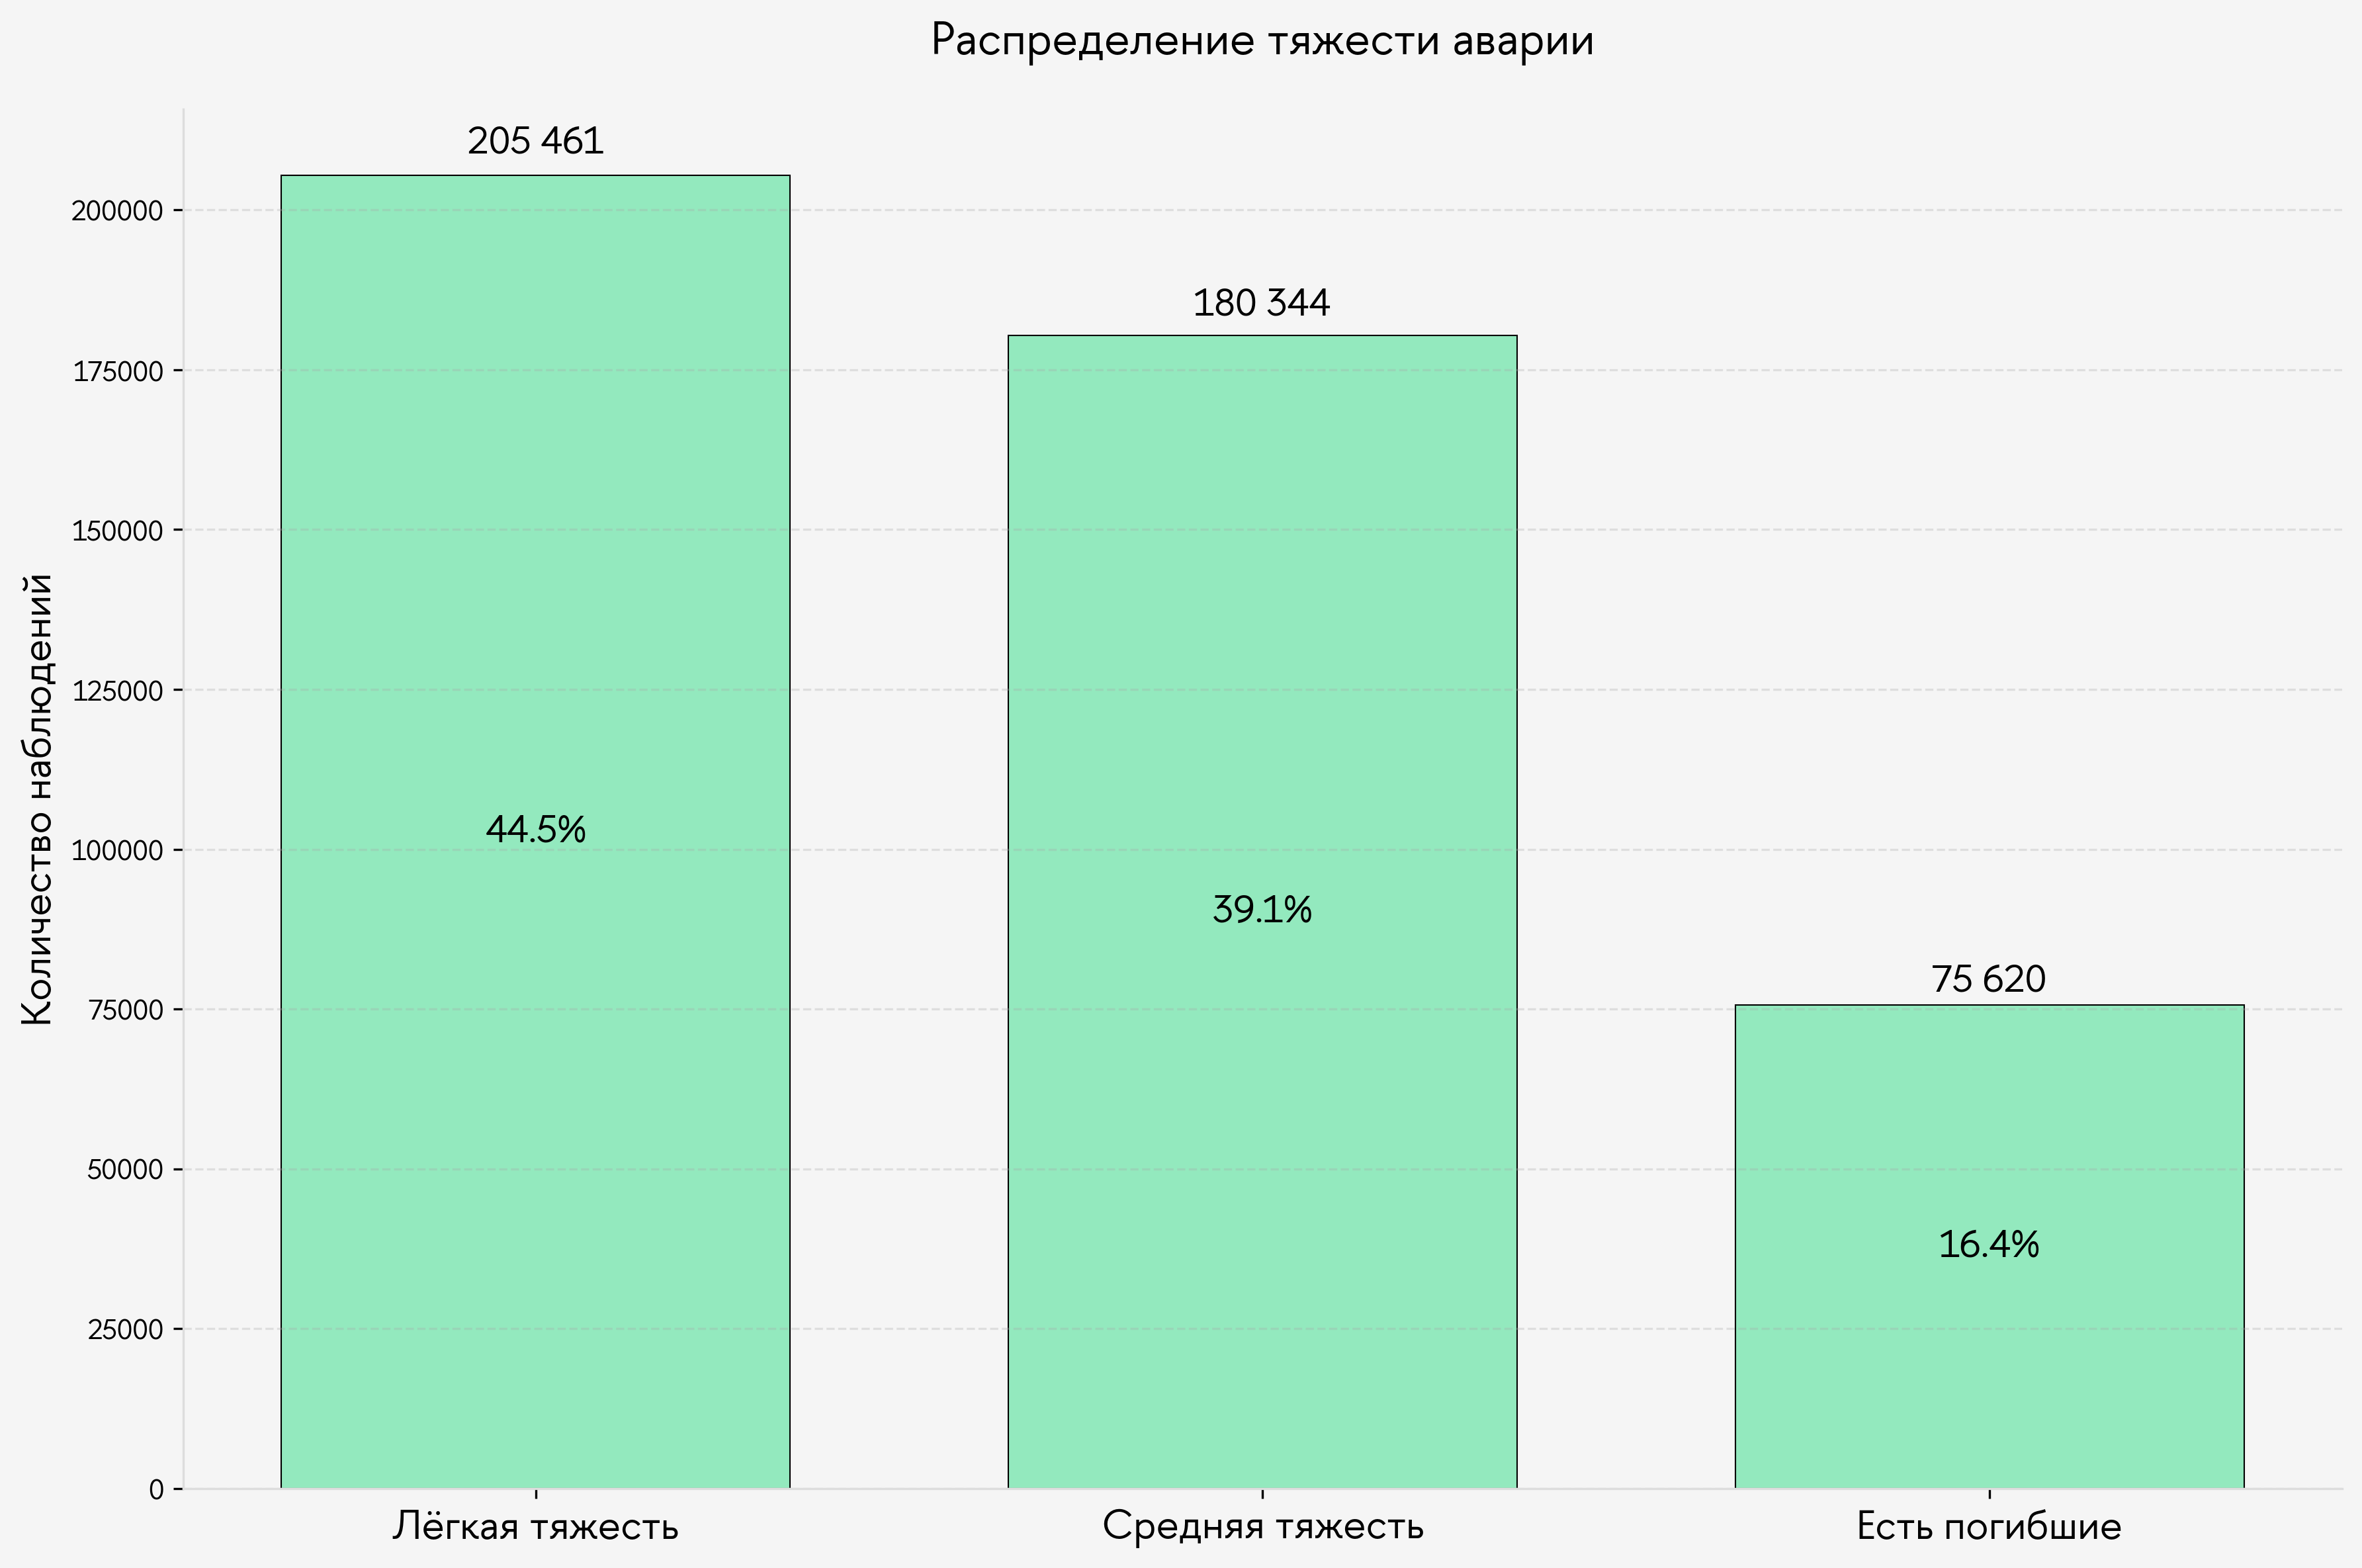

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from pathlib import Path

# Установка шрифта HSE Sans
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()

if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name
    print(f"Шрифт '{font_name}' установлен")
else:
    print("Шрифт HSE Sans не найден, используется системный")

# Получение данных
value_counts = df['severity'].value_counts()

# Рассчитываем проценты
total = value_counts.sum()
percentages = (value_counts.values / total * 100).round(1)

# СОЗДАЕМ КОРОТКИЕ НАЗВАНИЯ (только до скобки '(')
short_names = ['Лёгкая тяжесть', 'Средняя тяжесть', 'Есть погибшие']

# СОЗДАЕМ ВЕРТИКАЛЬНЫЙ BAR PLOT (столбцы вверх)
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#F5F5F5')  # фон фигуры
ax.set_facecolor('#F5F5F5')  # фон графика

# Создание bar plot - ВСЕ столбцы ОДНИМ цветом (#93E9BE - светлозеленый)
bars = ax.bar(
    short_names,  # используем короткие названия напрямую
    value_counts.values,  # высоты столбцов
    color='#93E9BE',  # Все столбцы одним цветом
    width=0.7,
    edgecolor='#000000',  # черная обводка для контраста
    linewidth=0.5
)

# Настройки внешнего вида
ax.set_ylabel('Количество наблюдений', fontsize=15)
ax.set_title('Распределение тяжести аварии', fontsize=17, fontweight='bold', pad=20)

# Поворачиваем подписи для лучшей читаемости
plt.xticks(rotation=0, fontsize=15)

# Убираем рамку
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# Добавляем вертикальную сетку
ax.grid(axis='y', linestyle='--', alpha=0.3, color='#AAAAAA')

# ДОБАВЛЯЕМ ПРОЦЕНТЫ ВНУТРИ СТОЛБЦОВ (в центре)
for i, bar in enumerate(bars):
    height = bar.get_height()
    percent = percentages[i]
    
    # Процент ВНУТРИ столбца в центре
    if i <= 2:
        ax.text(bar.get_x() + bar.get_width()/2,
            height / 2,  # РОВНО ПО ЦЕНТРУ столбца
            f'{percent}%',
            ha='center',
            va='center',
            fontsize=14,
            fontweight='bold',
            color='black')  # белый цвет для контраста на зеленом фоне
    
    # Количество НАД столбцом
    ax.text(bar.get_x() + bar.get_width()/2,
            height + height * 0.01,  # немного выше столбца
            f'{int(height):,}'.replace(',', ' '),
            ha='center',
            va='bottom',
            fontsize=14,
            fontweight='medium')

# Устанавливаем отступ
plt.tight_layout()

# Показываем график
plt.show()

In [8]:
consequencies = ['n_VEHICLES', 'n_PARTICIPANTS', 'n_DEATHS', 'n_INJURED', 'no_seatbelt_injury', 'severity']
reasons = ['crossing_violation', 'impaired_driving', 'interference_violation', 'license_violation', 'maneuver_violation', 'other_violation', 'pedestrian_violation', 'sudden_appearance_violation', 'traffic_control_violation', 'transport_violation', 'vehicle_tech_violation', 'wrong_way']
tech_reasons = ['vehicle_failure', 'license_violation', 'transport_violation', 'vehicle_tech_violation']
beh_reasons = ['impaired_driving', 'traffic_control_violation', 'wrong_way']
car_description = ['non_private_vehicle', 'white_vehicle', 'black_vehicle', 'colored_vehicle', 'vehicle_age_avg', 'n_class_a', 'n_class_b', 'n_class_c', 'n_class_d', 'n_class_e', 'n_class_s', 'n_front_drive', 'n_rear_drive', 'n_4wd']
road_description = ['road_name', 'road_category', 'road_rank_cat', 'road_defects_cat', 'traffic_changes_bin', 'traffic_changes_cat', 'road_surface_cat', 'out_of_town', 'street_rank_cat', 'adj_objects_interpretable', 'adj_objects_cat']
description = ['DATE', 'female_driver', 'escaped', 'n_drunk', 'n_children', 'n_cyclists', 'n_guilty', 'guilty_share', 'n_fatal_violations', 'guilty_exp_avg', 'exp_avg', 'TYPE_cat', 'weather_interpretable', 'weather_cat', 'cause_factors_cat', 'no_lighting', 'lighting_cat', 'site_objects_cat']
df['beh_vio'] = df[beh_reasons].max(axis=1)
df['tech_vio'] = df[tech_reasons].max(axis=1)

Шрифт 'HSE Sans' установлен


/Users/aleksejgavrikov/dtp_analisys/venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HSE Sans.
  fig.canvas.draw()


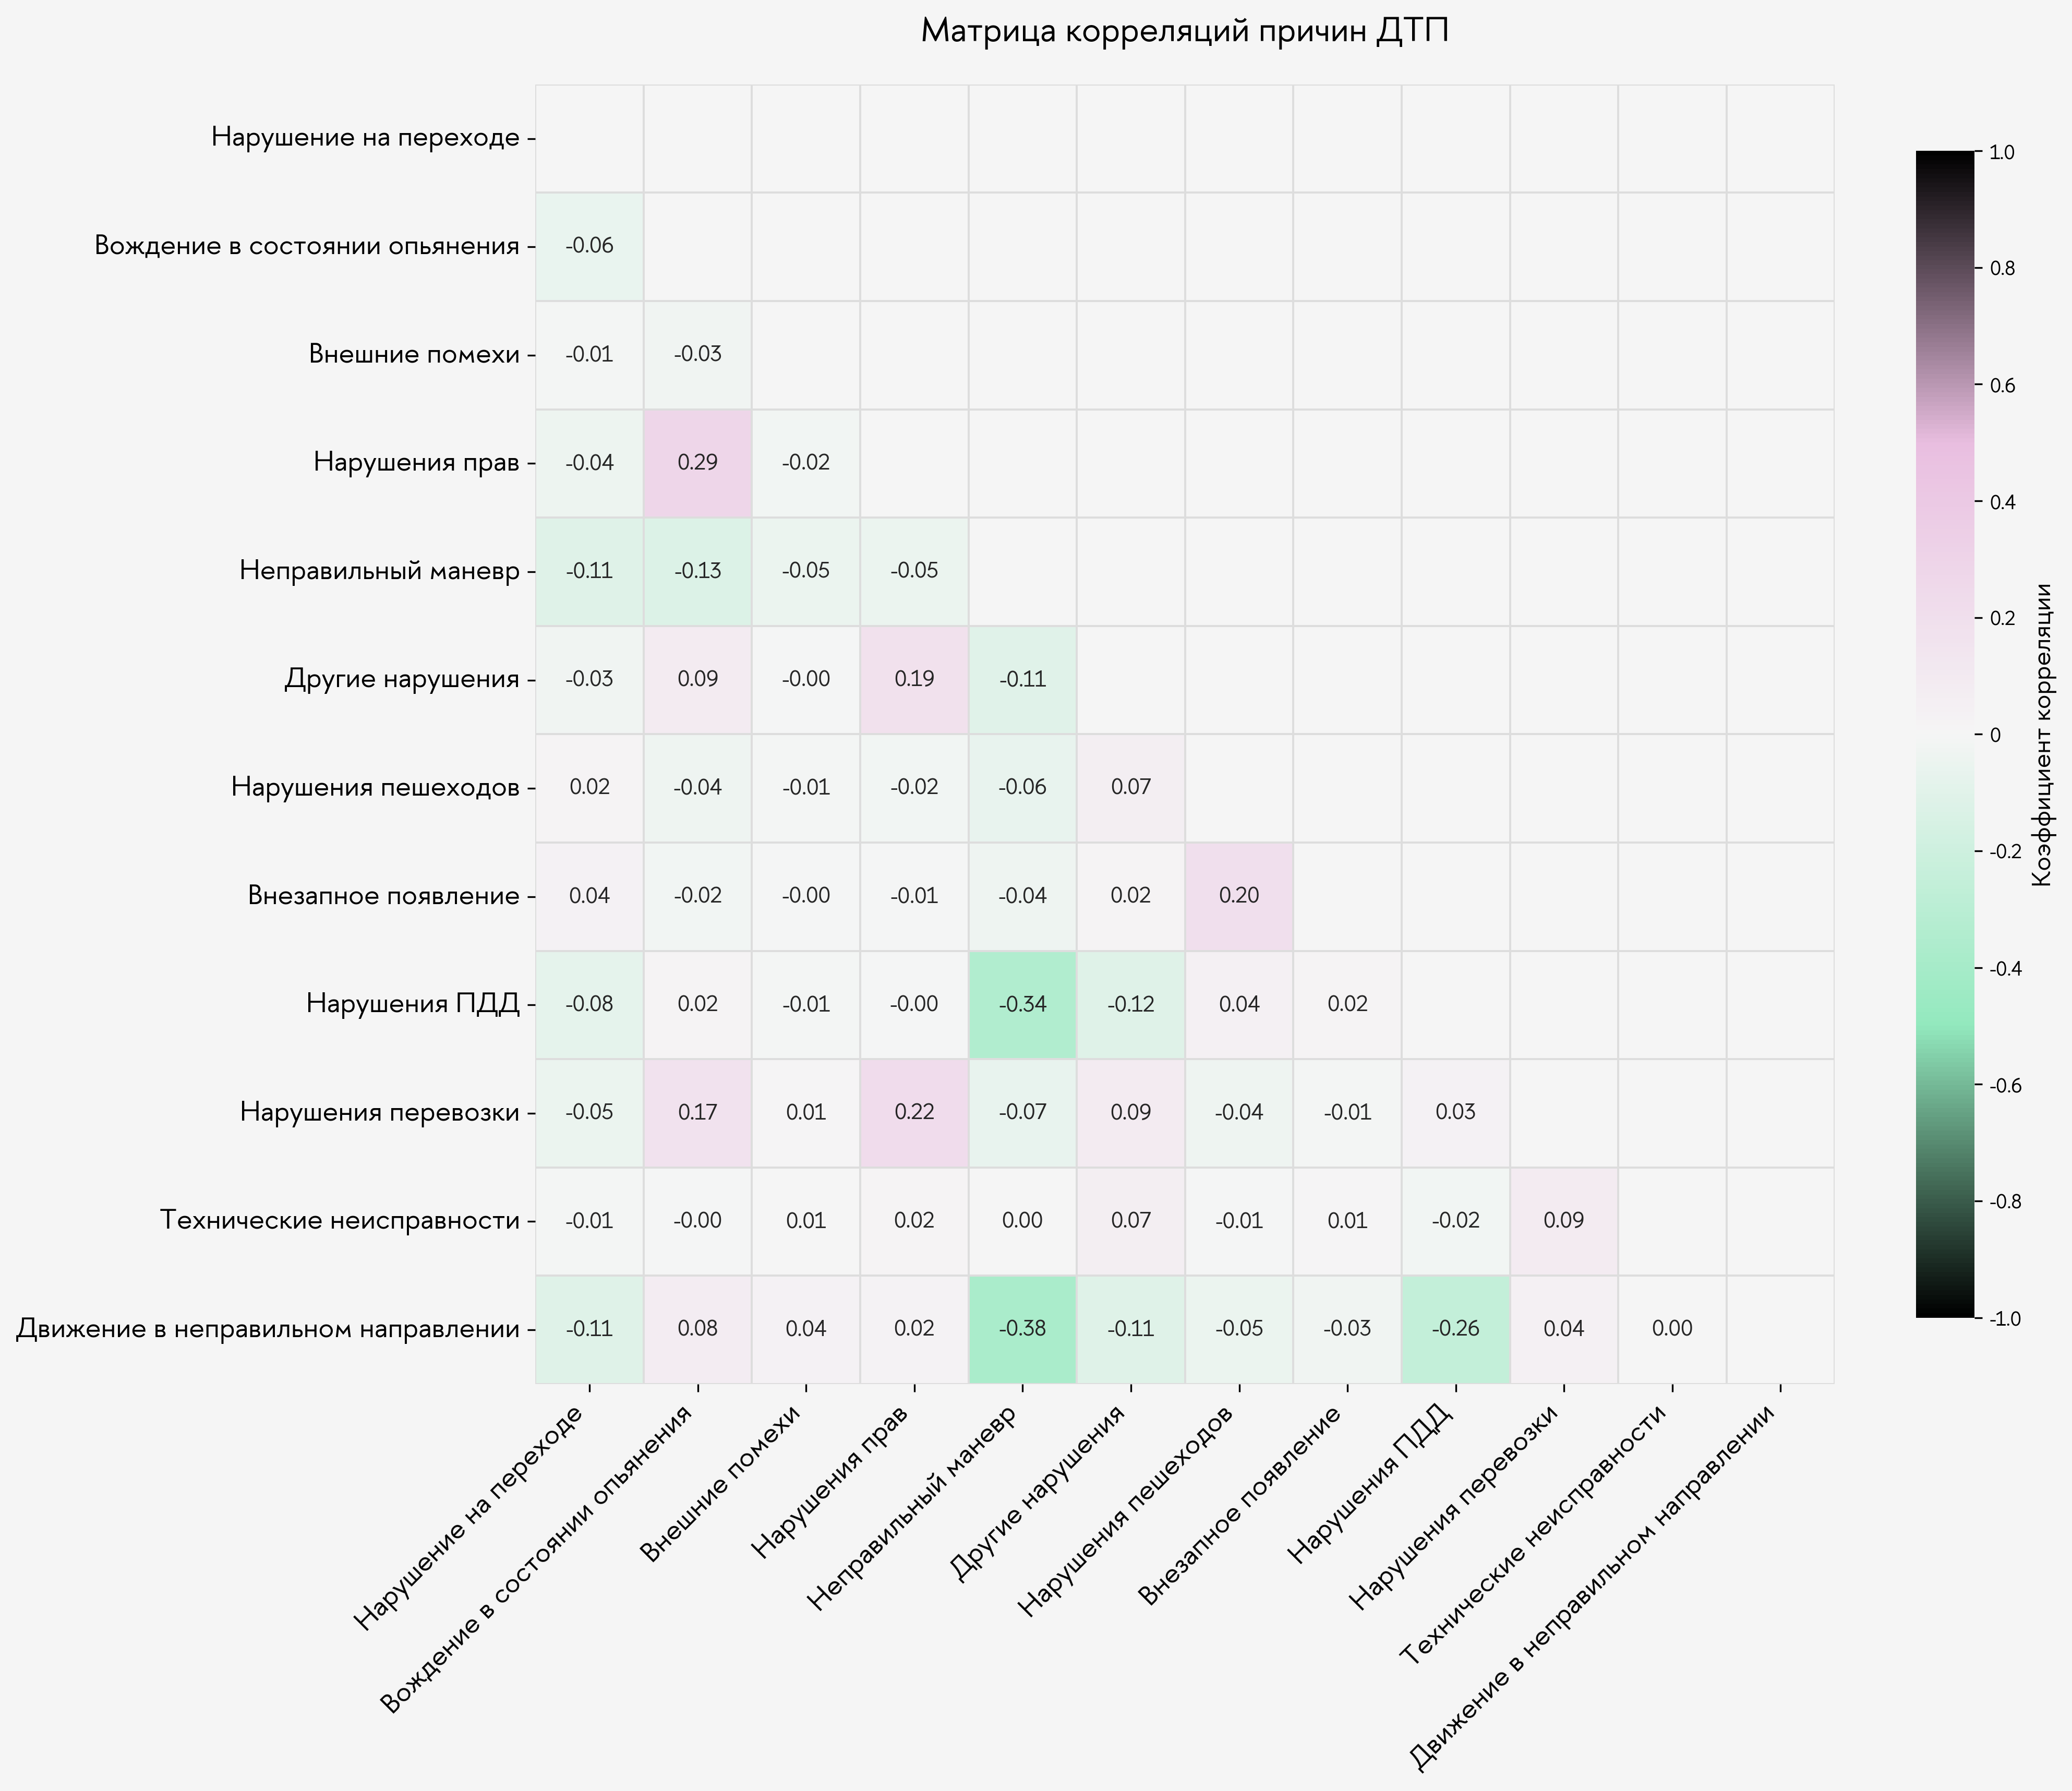


СТАТИСТИКА КОРРЕЛЯЦИЙ:
Всего парных корреляций: 66
Минимальная корреляция: -0.3807
Максимальная корреляция: 0.2878
Средняя корреляция: -0.0097
Медианная корреляция: -0.0071
Отрицательных корреляций (< 0): 39 (59.1%)
Положительных корреляций (> 0): 27 (40.9%)
Нулевых корреляций (≈ 0): 13 (19.7%)

Самые сильные отрицательные корреляции:
  1. -0.3807
  2. -0.3438
  3. -0.2561
  4. -0.1315
  5. -0.1160

Самые сильные положительные корреляции:
  1. 0.2878
  2. 0.2204
  3. 0.2013
  4. 0.1866
  5. 0.1733


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap

# Установка шрифта HSE Sans
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()

if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name
    print(f"Шрифт '{font_name}' установлен")
else:
    print("Шрифт HSE Sans не найден, используется системный")

# Список переменных
reasons = ['crossing_violation', 'impaired_driving', 'interference_violation', 
           'license_violation', 'maneuver_violation', 'other_violation', 
           'pedestrian_violation', 'sudden_appearance_violation', 
           'traffic_control_violation', 'transport_violation', 
           'vehicle_tech_violation', 'wrong_way']

# Русские названия переменных (укороченные)
russian_names = {
    'crossing_violation': 'Нарушение на переходе',
    'impaired_driving': 'Вождение в состоянии опьянения',
    'interference_violation': 'Внешние помехи',
    'license_violation': 'Нарушения прав',
    'maneuver_violation': 'Неправильный маневр',
    'other_violation': 'Другие нарушения',
    'pedestrian_violation': 'Нарушения пешеходов',
    'sudden_appearance_violation': 'Внезапное появление',
    'traffic_control_violation': 'Нарушения ПДД',
    'transport_violation': 'Нарушения перевозки',
    'vehicle_tech_violation': 'Технические неисправности',
    'wrong_way': 'Движение в неправильном направлении'
}

# Создаем матрицу корреляций
corr_matrix = df[reasons].corr()

# ИСПРАВЛЕННАЯ ЦВЕТОВАЯ ПАЛИТРА: от -1 до 1
# Правильное распределение цветов от отрицательных к положительным значениям
colors = [
    '#000000',   # черный - для -1.0 (самые сильные отрицательные корреляции)
    '#93E9BE',   # светлозеленый - для средних отрицательных
    '#F5F5F5',   # фон - для 0 (нулевые корреляции)
    '#E9BEE0',   # светлорозовый - для средних положительных
    '#000000'    # черный - для 1.0 (самые сильные положительные корреляции)
]

# Создаем кастомную цветовую карту
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Создаем фигуру с заданным фоном
fig, ax = plt.subplots(figsize=(14, 12))
fig.patch.set_facecolor('#F5F5F5')  # фон фигуры
ax.set_facecolor('#F5F5F5')  # фон графика

# Создаем heatmap с ИСПРАВЛЕННОЙ ЦВЕТОВОЙ ПАЛИТРОЙ
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Маска для верхнего треугольника
heatmap = sns.heatmap(corr_matrix, 
                      mask=mask,
                      annot=True, 
                      fmt='.2f', 
                      cmap=custom_cmap,
                      center=0,
                      square=True,
                      linewidths=0.5,
                      linecolor='#DDDDDD',
                      cbar_kws={'shrink': 0.8, 'label': 'Коэффициент корреляции'},
                      ax=ax,
                      vmin=-1,  # Правильно: от -1
                      vmax=1    # до 1
                     )

# Устанавливаем русские названия
russian_labels = [russian_names[col] for col in reasons]
heatmap.set_xticklabels(russian_labels, rotation=45, ha='right', fontsize=13)
heatmap.set_yticklabels(russian_labels, rotation=0, fontsize=13)

# Заголовок
plt.title('Матрица корреляций причин ДТП', fontsize=16, fontweight='bold', pad=20)

# Убираем рамку
for spine in ax.spines.values():
    spine.set_color('#DDDDDD')
    spine.set_linewidth(0.5)

# Настраиваем цветовую шкалу - ОБЯЗАТЕЛЬНО показываем отрицательные значения
cbar = heatmap.collections[0].colorbar

# Устанавливаем четкие подписи на цветовой шкале
cbar.set_ticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels(['-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0', '0.2', '0.4', '0.6', '0.8', '1.0'])
cbar.ax.tick_params(labelsize=9)
cbar.ax.set_ylabel('Коэффициент корреляции', fontsize=12)

# ПОДСВЕТКА СИЛЬНЫХ КОРРЕЛЯЦИЙ (по модулю > 0.7)
# Проходим по всем аннотациям и меняем цвет текста для сильных корреляций
texts = [t for t in ax.texts]

# Сначала найдем все значения для верхнего треугольника
corr_values = []
for i in range(len(reasons)):
    for j in range(i+1, len(reasons)):  # Только верхний треугольник (без диагонали)
        corr_values.append(corr_matrix.iloc[i, j])

# Теперь проходим по текстам и меняем их
for idx, text in enumerate(texts):
    if idx < len(corr_values):  # Убедимся, что у нас есть соответствующее значение
        value = corr_values[idx]
        if abs(value) > 0.7:
            # Для очень сильных корреляций делаем текст белым
            text.set_color('white')
            text.set_fontweight('bold')
            text.set_fontsize(11)
        elif abs(value) > 0.5:
            # Для сильных корреляций делаем текст черным и жирным
            text.set_color('#000000')
            text.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Проверим, есть ли отрицательные корреляции в данных
print("\n" + "="*60)
print("СТАТИСТИКА КОРРЕЛЯЦИЙ:")
print("="*60)

# Создаем плоский список всех корреляций (без диагонали и дубликатов)
all_correlations = []
for i in range(len(reasons)):
    for j in range(i+1, len(reasons)):
        all_correlations.append(corr_matrix.iloc[i, j])

all_correlations = np.array(all_correlations)

print(f"Всего парных корреляций: {len(all_correlations)}")
print(f"Минимальная корреляция: {all_correlations.min():.4f}")
print(f"Максимальная корреляция: {all_correlations.max():.4f}")
print(f"Средняя корреляция: {all_correlations.mean():.4f}")
print(f"Медианная корреляция: {np.median(all_correlations):.4f}")
print(f"Отрицательных корреляций (< 0): {(all_correlations < 0).sum()} ({(all_correlations < 0).sum()/len(all_correlations)*100:.1f}%)")
print(f"Положительных корреляций (> 0): {(all_correlations > 0).sum()} ({(all_correlations > 0).sum()/len(all_correlations)*100:.1f}%)")
print(f"Нулевых корреляций (≈ 0): {(np.abs(all_correlations) < 0.01).sum()} ({(np.abs(all_correlations) < 0.01).sum()/len(all_correlations)*100:.1f}%)")

# Самые сильные отрицательные корреляции
print("\nСамые сильные отрицательные корреляции:")
neg_corr = all_correlations[all_correlations < 0]
if len(neg_corr) > 0:
    sorted_neg = np.sort(neg_corr)
    for i in range(min(5, len(sorted_neg))):
        print(f"  {i+1}. {sorted_neg[i]:.4f}")
else:
    print("  Отрицательных корреляций не обнаружено")

# Самые сильные положительные корреляции
print("\nСамые сильные положительные корреляции:")
pos_corr = all_correlations[all_correlations > 0]
if len(pos_corr) > 0:
    sorted_pos = np.sort(pos_corr)[::-1]  # по убыванию
    for i in range(min(5, len(sorted_pos))):
        print(f"  {i+1}. {sorted_pos[i]:.4f}")

Шрифт 'HSE Sans' установлен


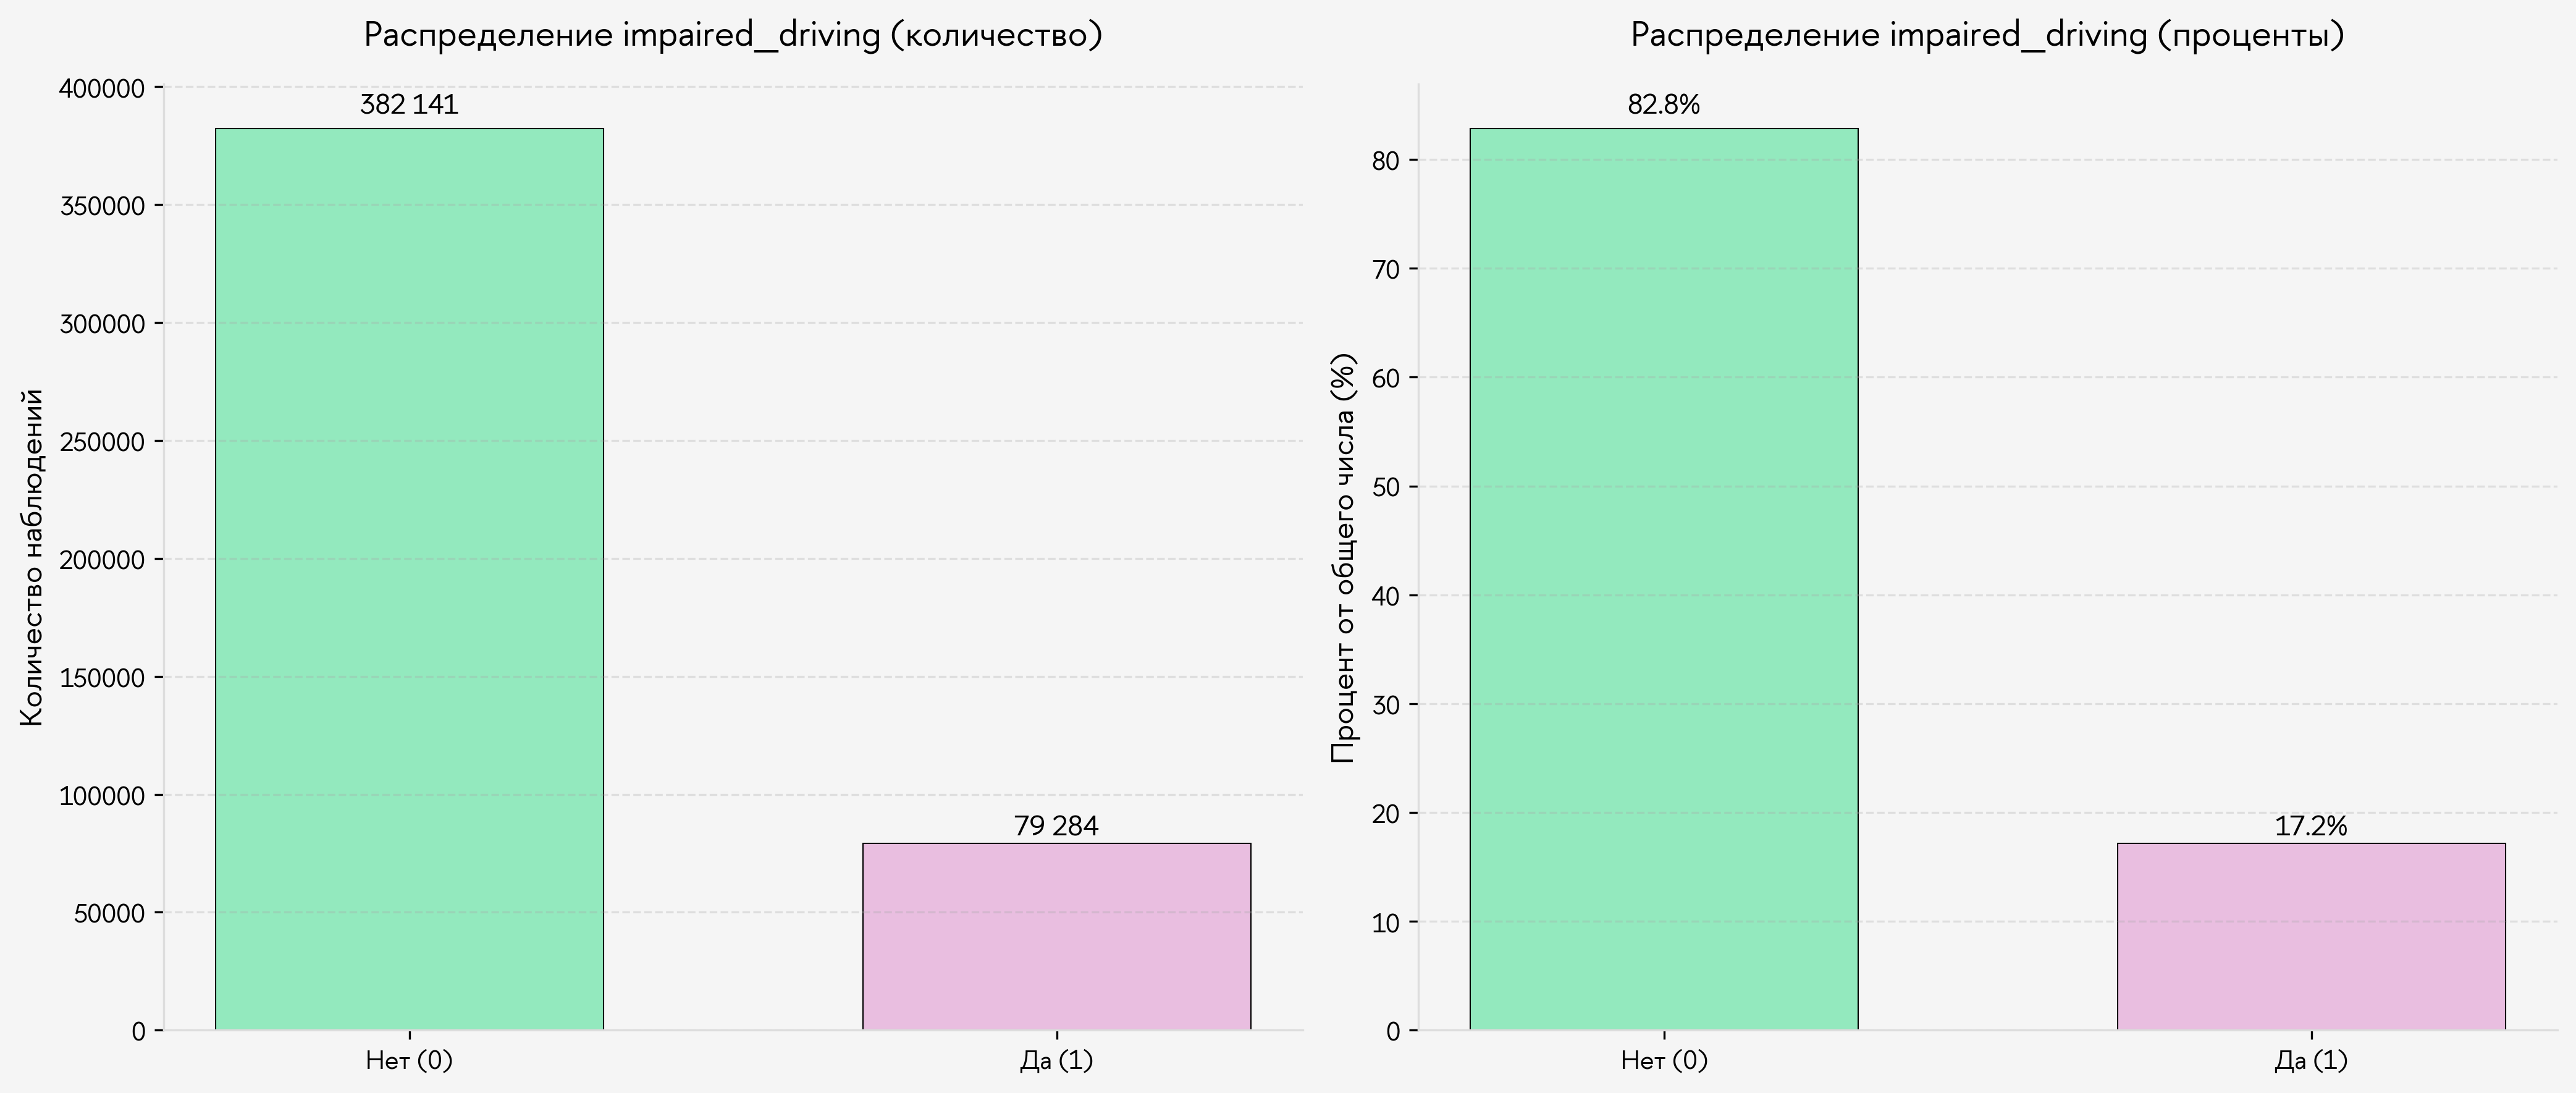

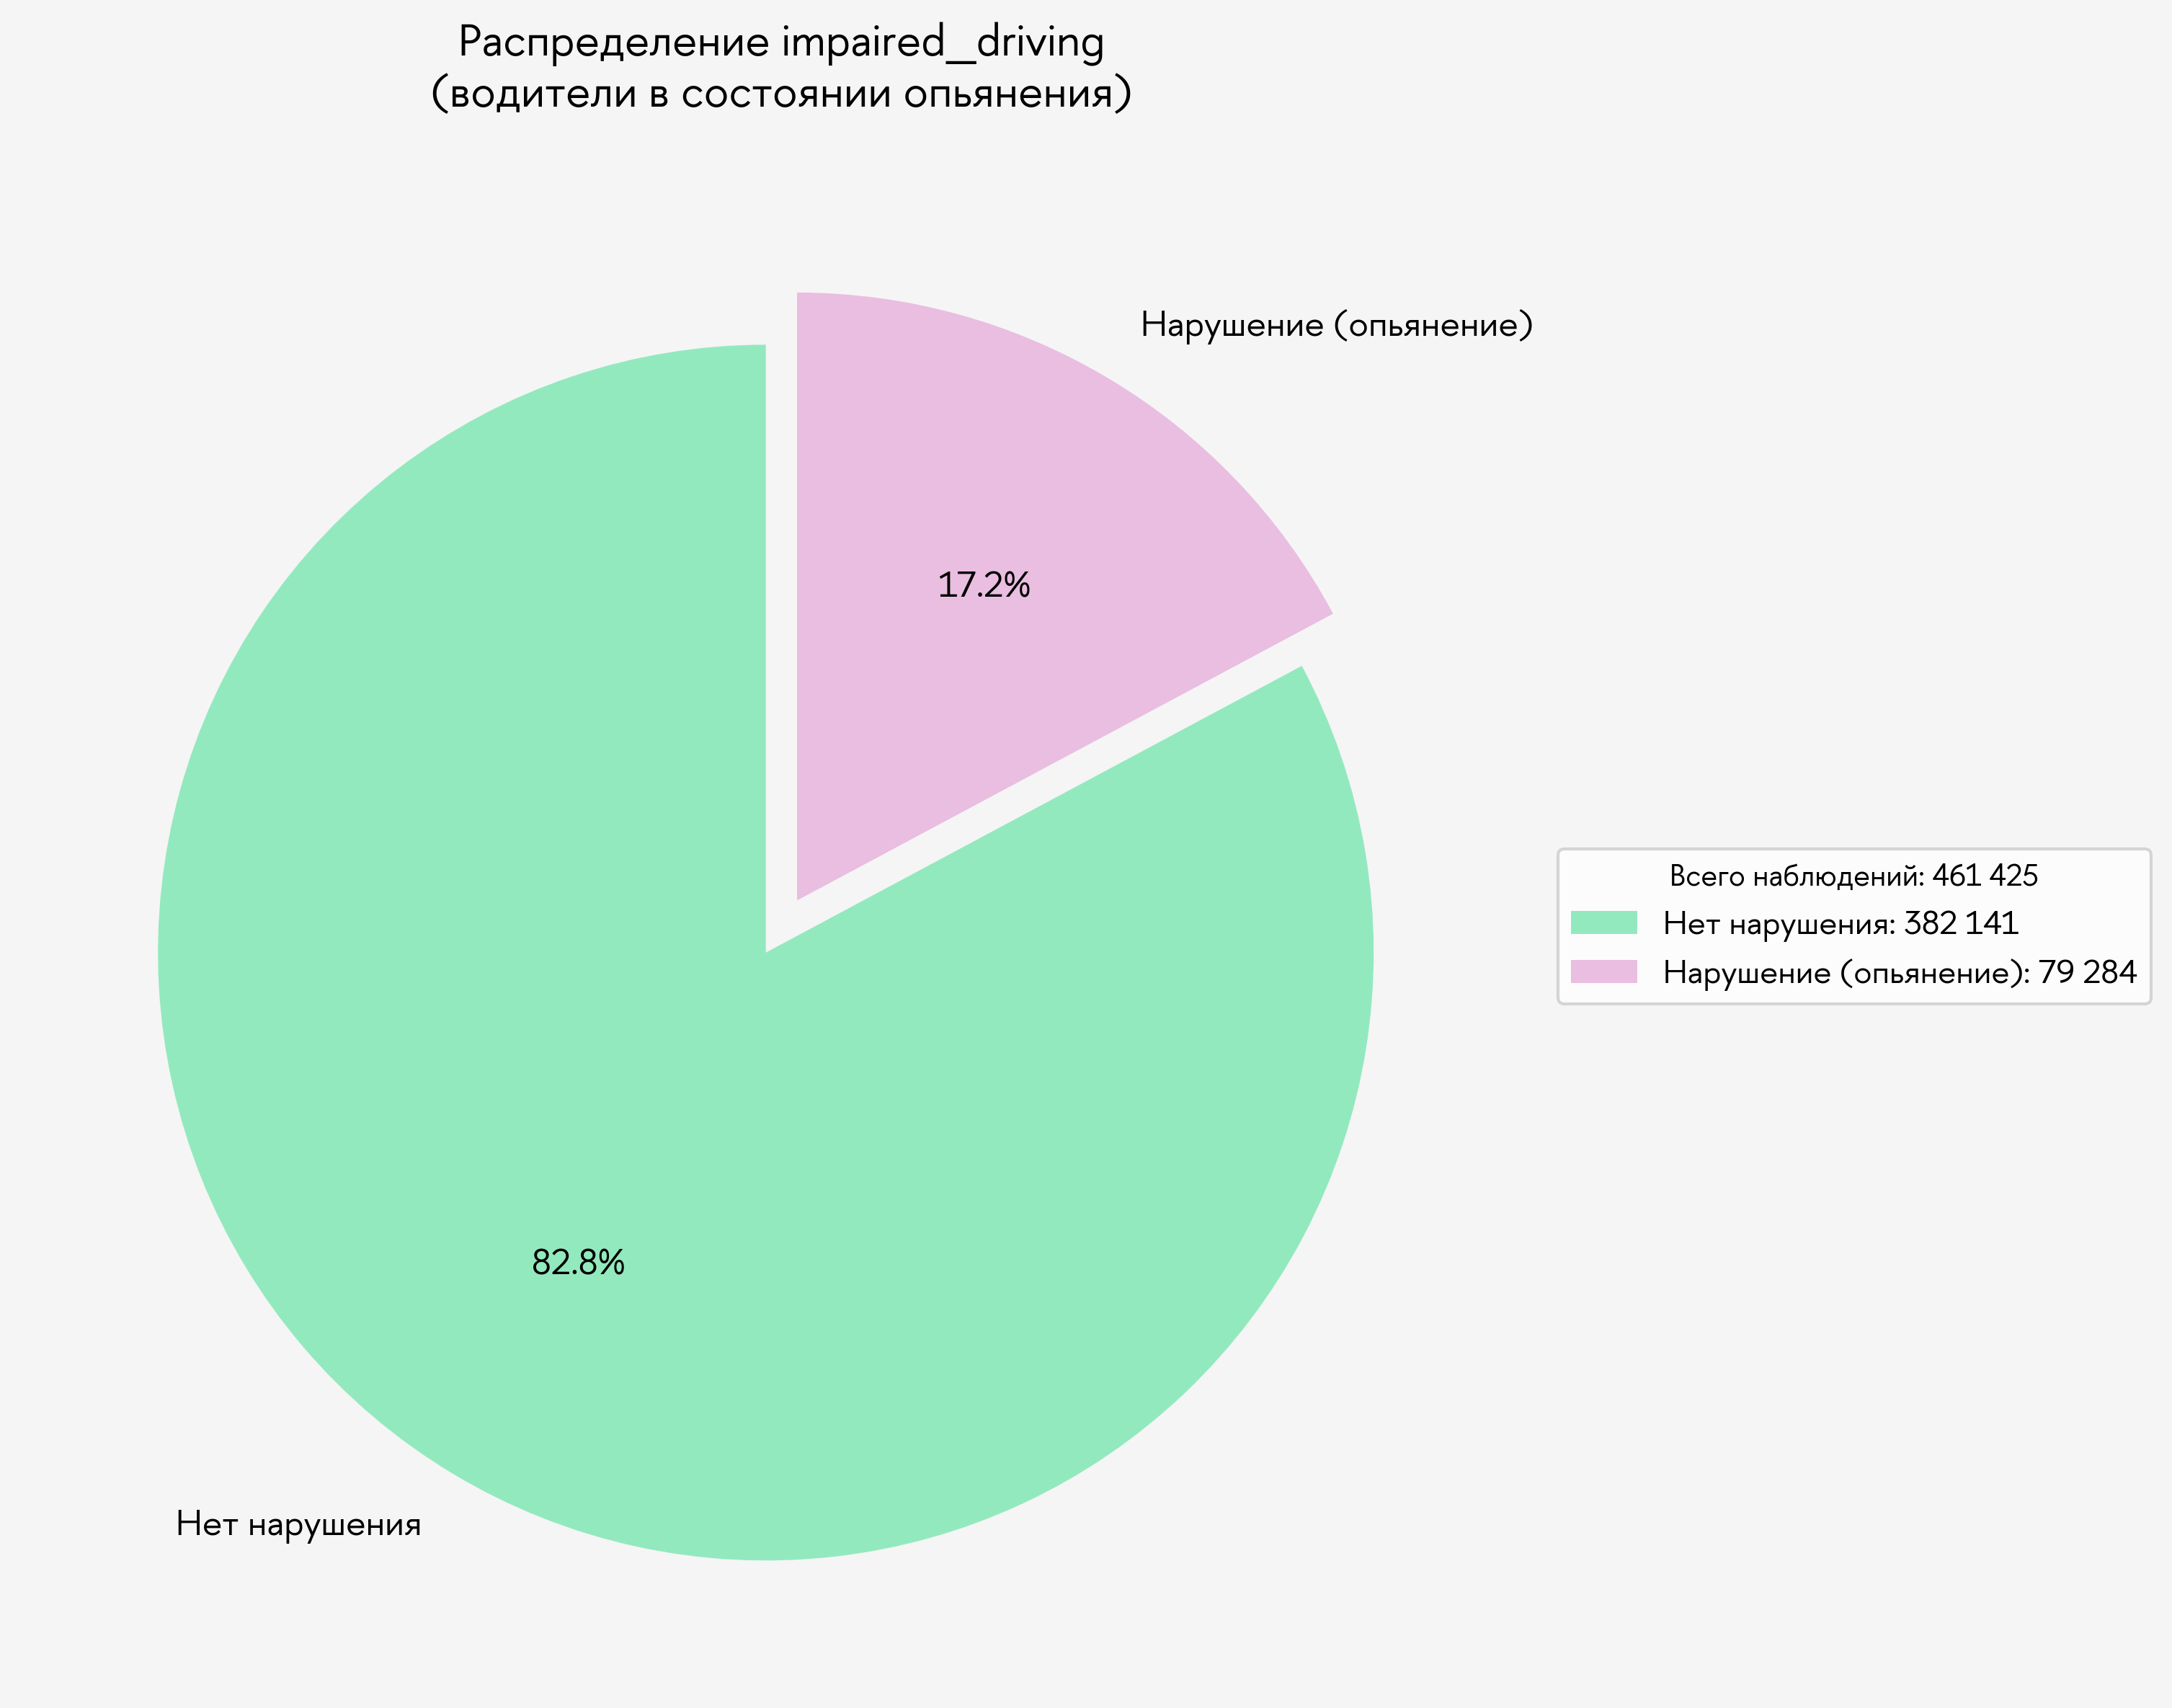

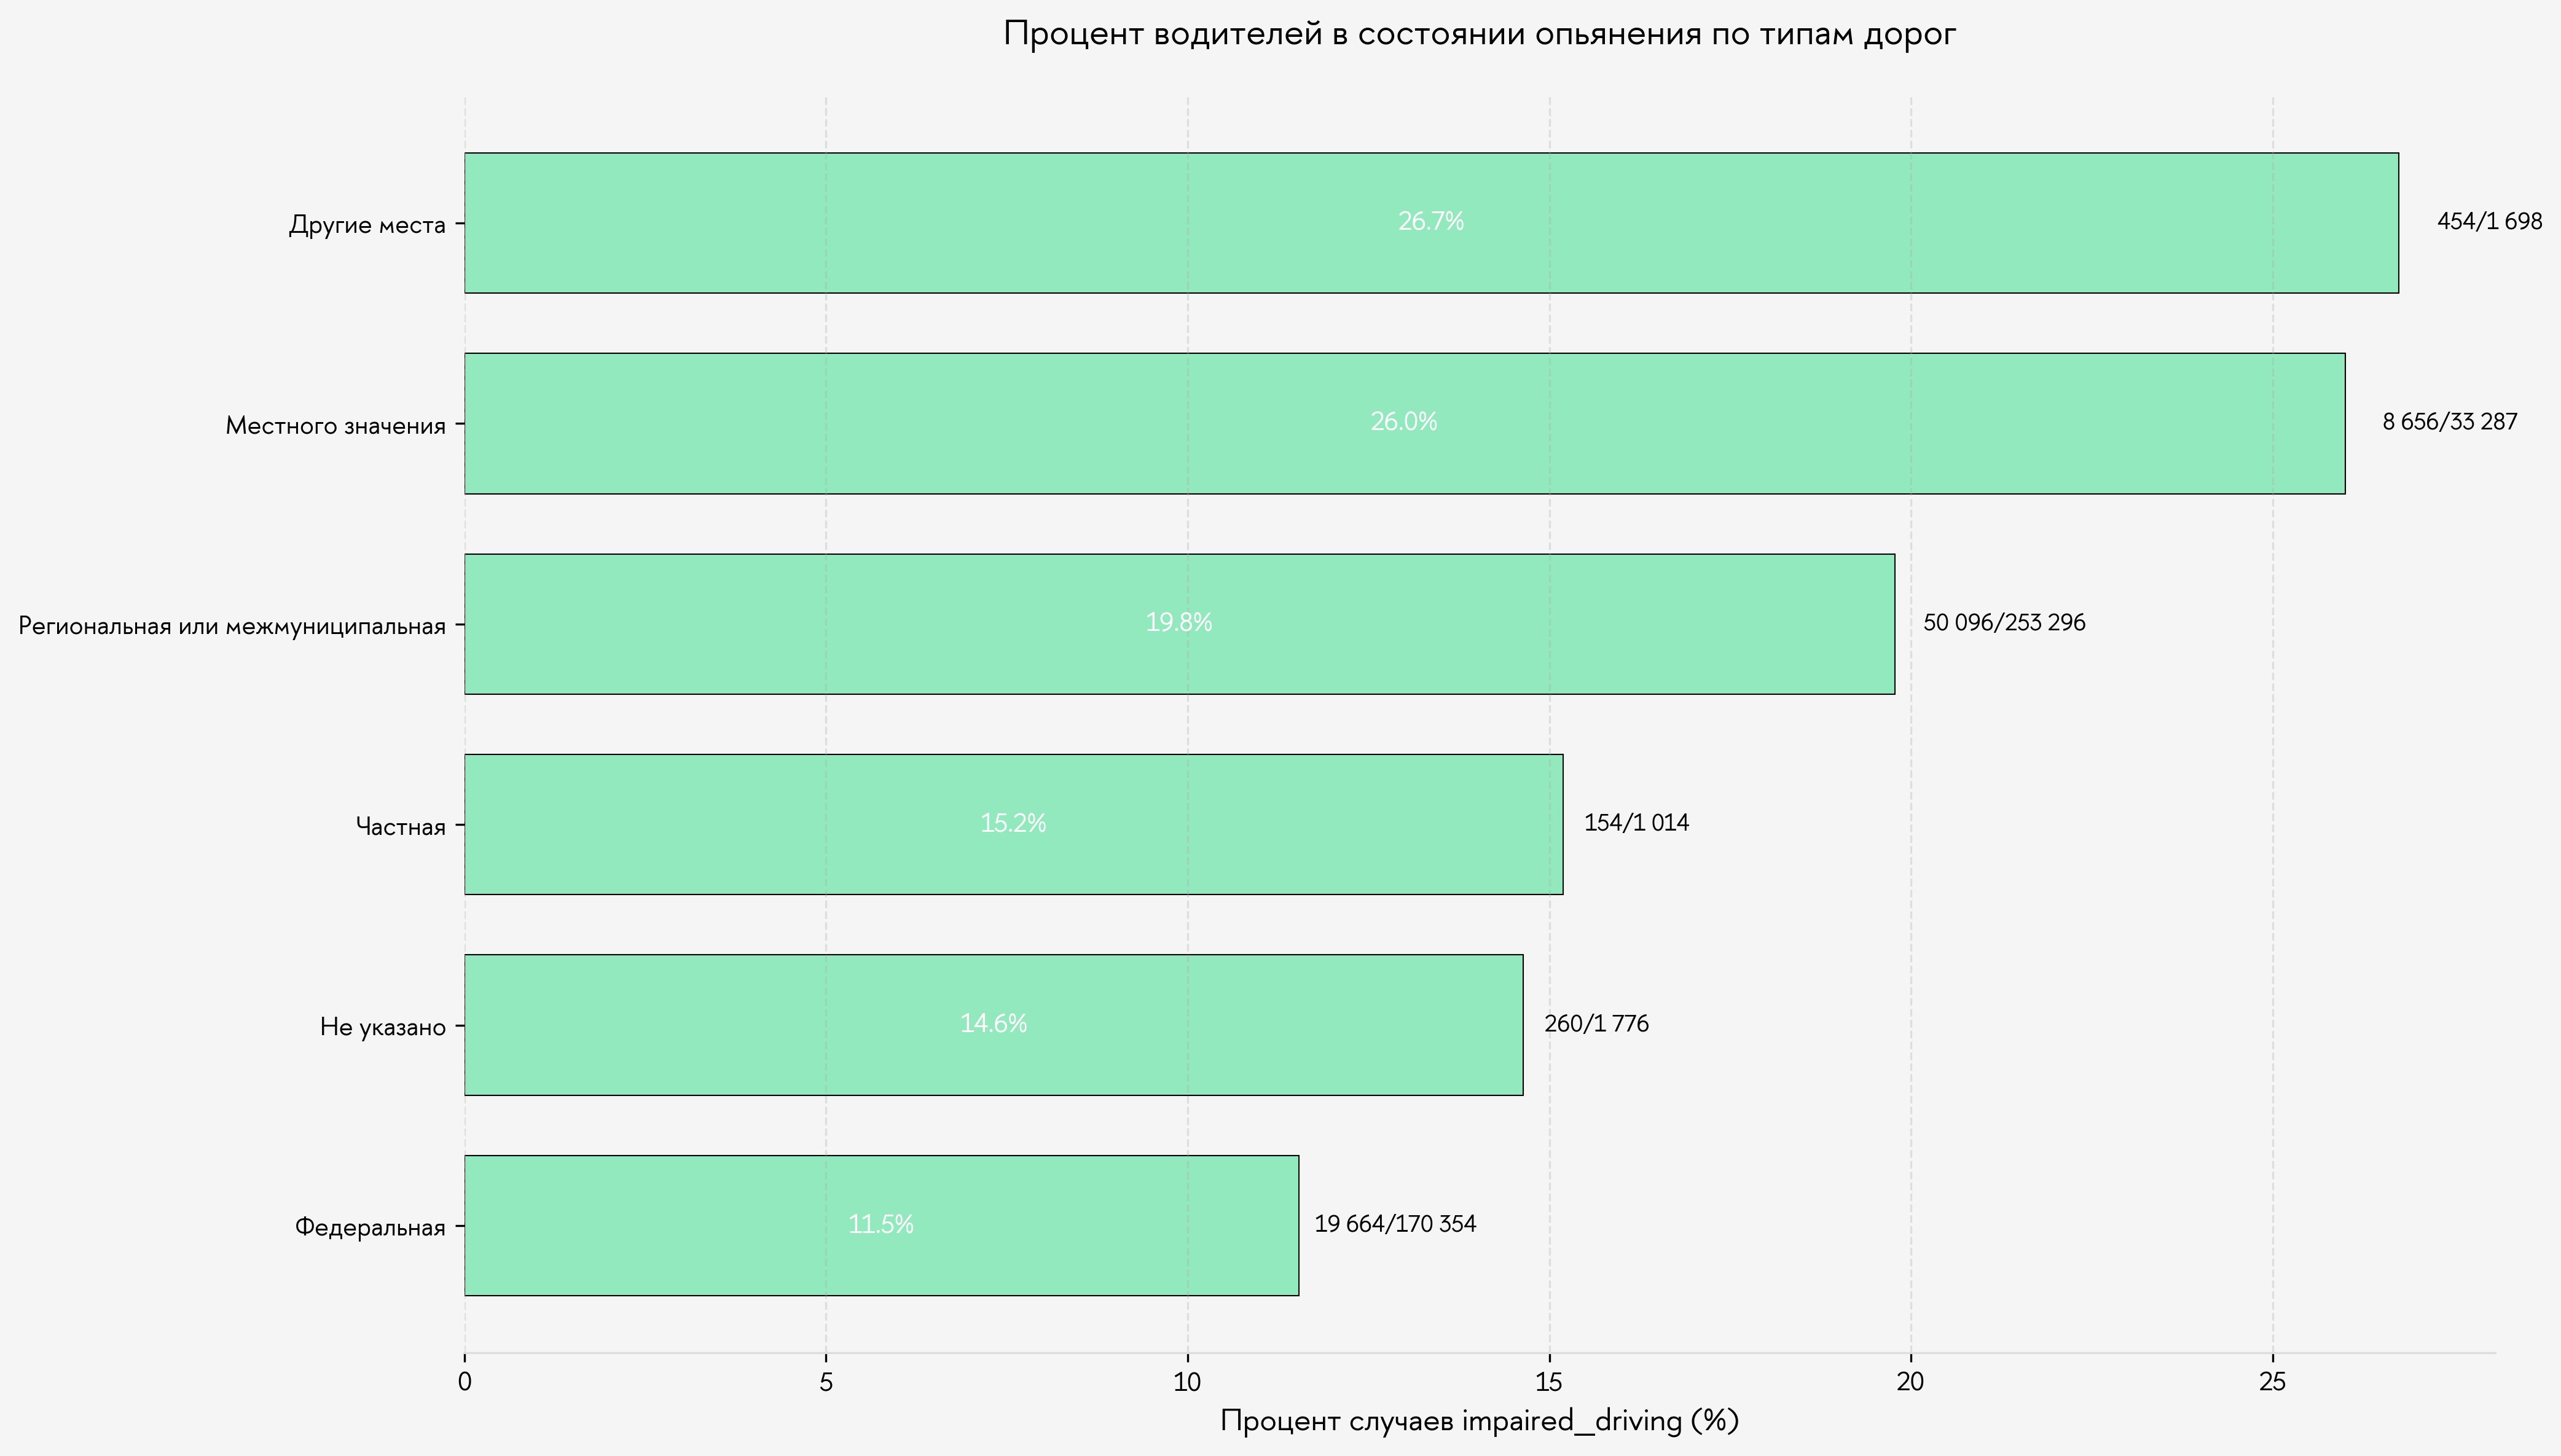

/var/folders/nv/y1xwhy_x1gx4gn0wks7mdjqc0000gn/T/ipykernel_81468/432892972.py:222: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data,


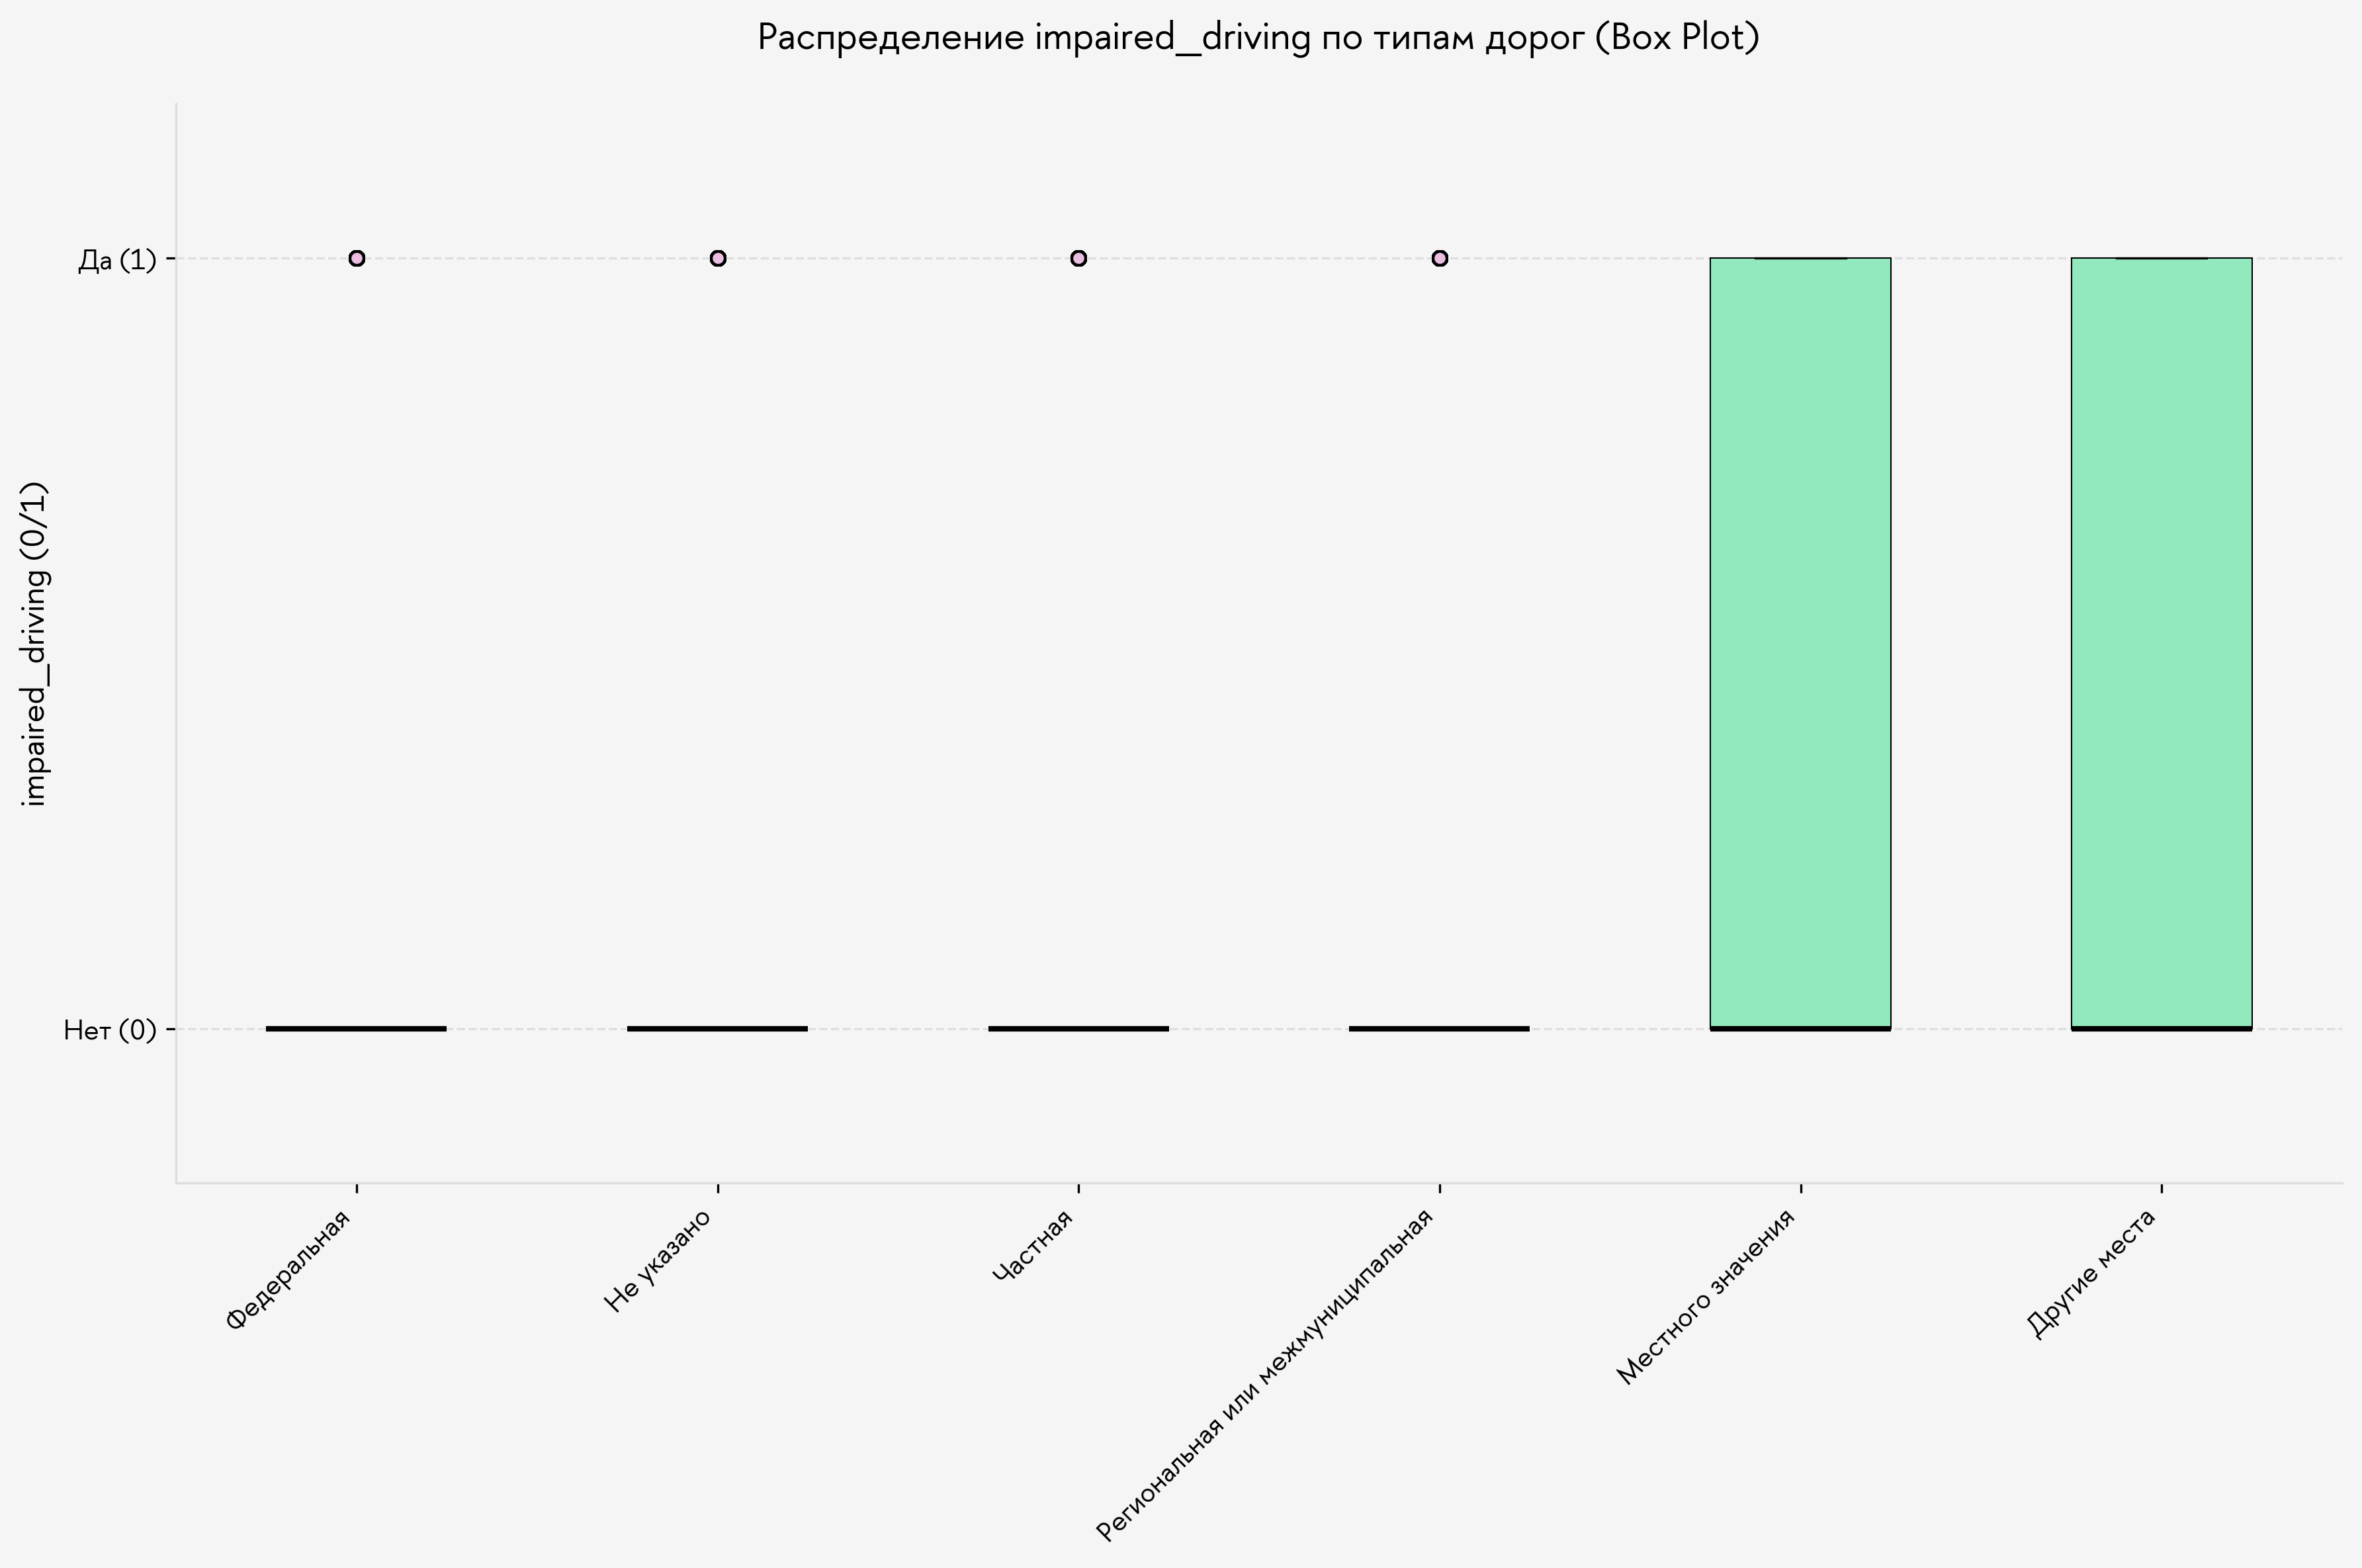


СТАТИСТИКА ПО impaired_driving:
Всего наблюдений: 461 425
Количество нарушений (impaired_driving = 1): 79 284
Количество без нарушений (impaired_driving = 0): 382 141
Процент нарушений: 17.18%
Процент без нарушений: 82.82%


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
from pathlib import Path

# Установка шрифта HSE Sans
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()

if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name
    print(f"Шрифт '{font_name}' установлен")
else:
    print("Шрифт HSE Sans не найден, используется системный")

# 1. БАЗОВОЕ РАСПРЕДЕЛЕНИЕ impaired_driving
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor('#F5F5F5')  # фон фигуры

# Рассчитываем значения
impaired_counts = df['impaired_driving'].value_counts().sort_index()
impaired_percent = (df['impaired_driving'].value_counts(normalize=True) * 100).sort_index()

# График 1: Количество
ax1 = axes[0]
ax1.set_facecolor('#F5F5F5')

bars1 = ax1.bar(['Нет (0)', 'Да (1)'], 
               impaired_counts.values,
               color=['#93E9BE', '#E9BEE0'],  # светлозеленый и светлорозовый
               edgecolor='#000000',
               linewidth=0.5,
               width=0.6)

ax1.set_ylabel('Количество наблюдений', fontsize=12)
ax1.set_title('Распределение impaired_driving (количество)', fontsize=14, fontweight='bold', pad=15)

# Добавляем значения на столбцы
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2,
            height + height * 0.01,
            f'{int(height):,}'.replace(',', ' '),
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='medium')

# График 2: Проценты
ax2 = axes[1]
ax2.set_facecolor('#F5F5F5')

bars2 = ax2.bar(['Нет (0)', 'Да (1)'], 
               impaired_percent.values,
               color=['#93E9BE', '#E9BEE0'],
               edgecolor='#000000',
               linewidth=0.5,
               width=0.6)

ax2.set_ylabel('Процент от общего числа (%)', fontsize=12)
ax2.set_title('Распределение impaired_driving (проценты)', fontsize=14, fontweight='bold', pad=15)

# Добавляем проценты на столбцы
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2,
            height + height * 0.01,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='medium')

# Убираем рамки на обоих графиках
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDDDDD')
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.grid(axis='y', linestyle='--', alpha=0.3, color='#AAAAAA')

plt.tight_layout()
plt.show()

# 2. КРУГОВАЯ ДИАГРАММА
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

# Данные для круговой диаграммы
labels = ['Нет нарушения', 'Нарушение (опьянение)']
sizes = impaired_counts.values
colors_pie = ['#93E9BE', '#E9BEE0']
explode = (0.05, 0.05)  # Немного отделяем секторы

wedges, texts, autotexts = ax.pie(sizes, 
                                  explode=explode, 
                                  labels=labels, 
                                  colors=colors_pie,
                                  autopct='%1.1f%%',
                                  shadow=False,
                                  startangle=90,
                                  textprops={'fontsize': 11})

# Делаем проценты более заметными
for autotext in autotexts:
    autotext.set_color('#000000')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# Делаем метки жирными
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('medium')

ax.set_title('Распределение impaired_driving\n(водители в состоянии опьянения)', 
             fontsize=15, fontweight='bold', pad=20)

# Добавляем легенду с абсолютными значениями
legend_labels = [f'{label}: {size:,}'.replace(',', ' ') for label, size in zip(labels, sizes)]
ax.legend(wedges, legend_labels, 
          title=f"Всего наблюдений: {impaired_counts.sum():,}".replace(',', ' '),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=11)

plt.tight_layout()
plt.show()

# 3. РАСПРЕДЕЛЕНИЕ ПО ТИПАМ ДОРОГ (road_rank_cat)
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

# Группируем данные
road_impaired = df.groupby('road_rank_cat')['impaired_driving'].agg(['sum', 'count']).reset_index()
road_impaired['percent'] = (road_impaired['sum'] / road_impaired['count'] * 100).round(2)

# Сортируем по проценту
road_impaired = road_impaired.sort_values('percent', ascending=True)

# Создаем короткие названия для дорог
short_road_names = []
for name in road_impaired['road_rank_cat']:
    if '(' in name:
        short_name = name.split('(')[0].strip()
    else:
        short_name = name
    short_road_names.append(short_name)

# Горизонтальный bar plot
bars = ax.barh(short_road_names,
               road_impaired['percent'].values,
               color='#93E9BE',  # светлозеленый
               edgecolor='#000000',
               linewidth=0.5,
               height=0.7)

ax.set_xlabel('Процент случаев impaired_driving (%)', fontsize=12)
ax.set_title('Процент водителей в состоянии опьянения по типам дорог', 
             fontsize=14, fontweight='bold', pad=20)

# Добавляем значения и абсолютные числа
for i, bar in enumerate(bars):
    width = bar.get_width()
    count = road_impaired.iloc[i]['count']
    impaired = road_impaired.iloc[i]['sum']
    
    # Процент внутри столбца
    ax.text(width / 2,
            bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%',
            ha='center',
            va='center',
            fontsize=10,
            fontweight='bold',
            color='white')
    
    # Абсолютные числа справа
    ax.text(width + width * 0.02,
            bar.get_y() + bar.get_height()/2,
            f'{impaired:,}/{count:,}'.replace(',', ' '),
            ha='left',
            va='center',
            fontsize=9,
            fontweight='medium')

# Убираем рамку
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.grid(axis='x', linestyle='--', alpha=0.3, color='#AAAAAA')

plt.tight_layout()
plt.show()

# 4. БОКС-ПЛОТ (если есть непрерывные переменные для сравнения)
# Пример с road_rank_cat как категориальной (если конвертировать в числовой формат)
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

# Создаем числовой код для категорий дорог для визуализации
road_codes = {road: i for i, road in enumerate(road_impaired['road_rank_cat'])}
df['road_code'] = df['road_rank_cat'].map(road_codes)

# Box plot
box_data = []
road_labels = []
for road in road_impaired['road_rank_cat']:
    if road in road_codes:
        box_data.append(df[df['road_rank_cat'] == road]['impaired_driving'].values)
        if '(' in road:
            road_labels.append(road.split('(')[0].strip())
        else:
            road_labels.append(road)

bp = ax.boxplot(box_data, 
                labels=road_labels,
                patch_artist=True,
                medianprops={'color': '#000000', 'linewidth': 2},
                boxprops={'facecolor': '#93E9BE', 'edgecolor': '#000000', 'linewidth': 0.5},
                whiskerprops={'color': '#000000', 'linewidth': 0.8},
                capprops={'color': '#000000', 'linewidth': 0.8},
                flierprops={'marker': 'o', 'markerfacecolor': '#E9BEE0', 'markeredgecolor': '#000000', 'markersize': 5})

ax.set_ylabel('impaired_driving (0/1)', fontsize=12)
ax.set_title('Распределение impaired_driving по типам дорог (Box Plot)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(-0.2, 1.2)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Нет (0)', 'Да (1)'])

# Поворачиваем подписи по X
plt.xticks(rotation=45, ha='right')

# Убираем рамку
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.grid(axis='y', linestyle='--', alpha=0.3, color='#AAAAAA')

plt.tight_layout()
plt.show()

# Выводим статистику
print("\n" + "="*70)
print("СТАТИСТИКА ПО impaired_driving:")
print("="*70)
print(f"Всего наблюдений: {len(df):,}".replace(',', ' '))
print(f"Количество нарушений (impaired_driving = 1): {impaired_counts.get(1, 0):,}".replace(',', ' '))
print(f"Количество без нарушений (impaired_driving = 0): {impaired_counts.get(0, 0):,}".replace(',', ' '))
print(f"Процент нарушений: {impaired_percent.get(1, 0):.2f}%")
print(f"Процент без нарушений: {impaired_percent.get(0, 0):.2f}%")

# Удаляем временную колонку
if 'road_code' in df.columns:
    df.drop('road_code', axis=1, inplace=True)

/var/folders/nv/y1xwhy_x1gx4gn0wks7mdjqc0000gn/T/ipykernel_81468/3153840582.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, fontsize=16, fontweight='bold')  # Увеличенные подписи


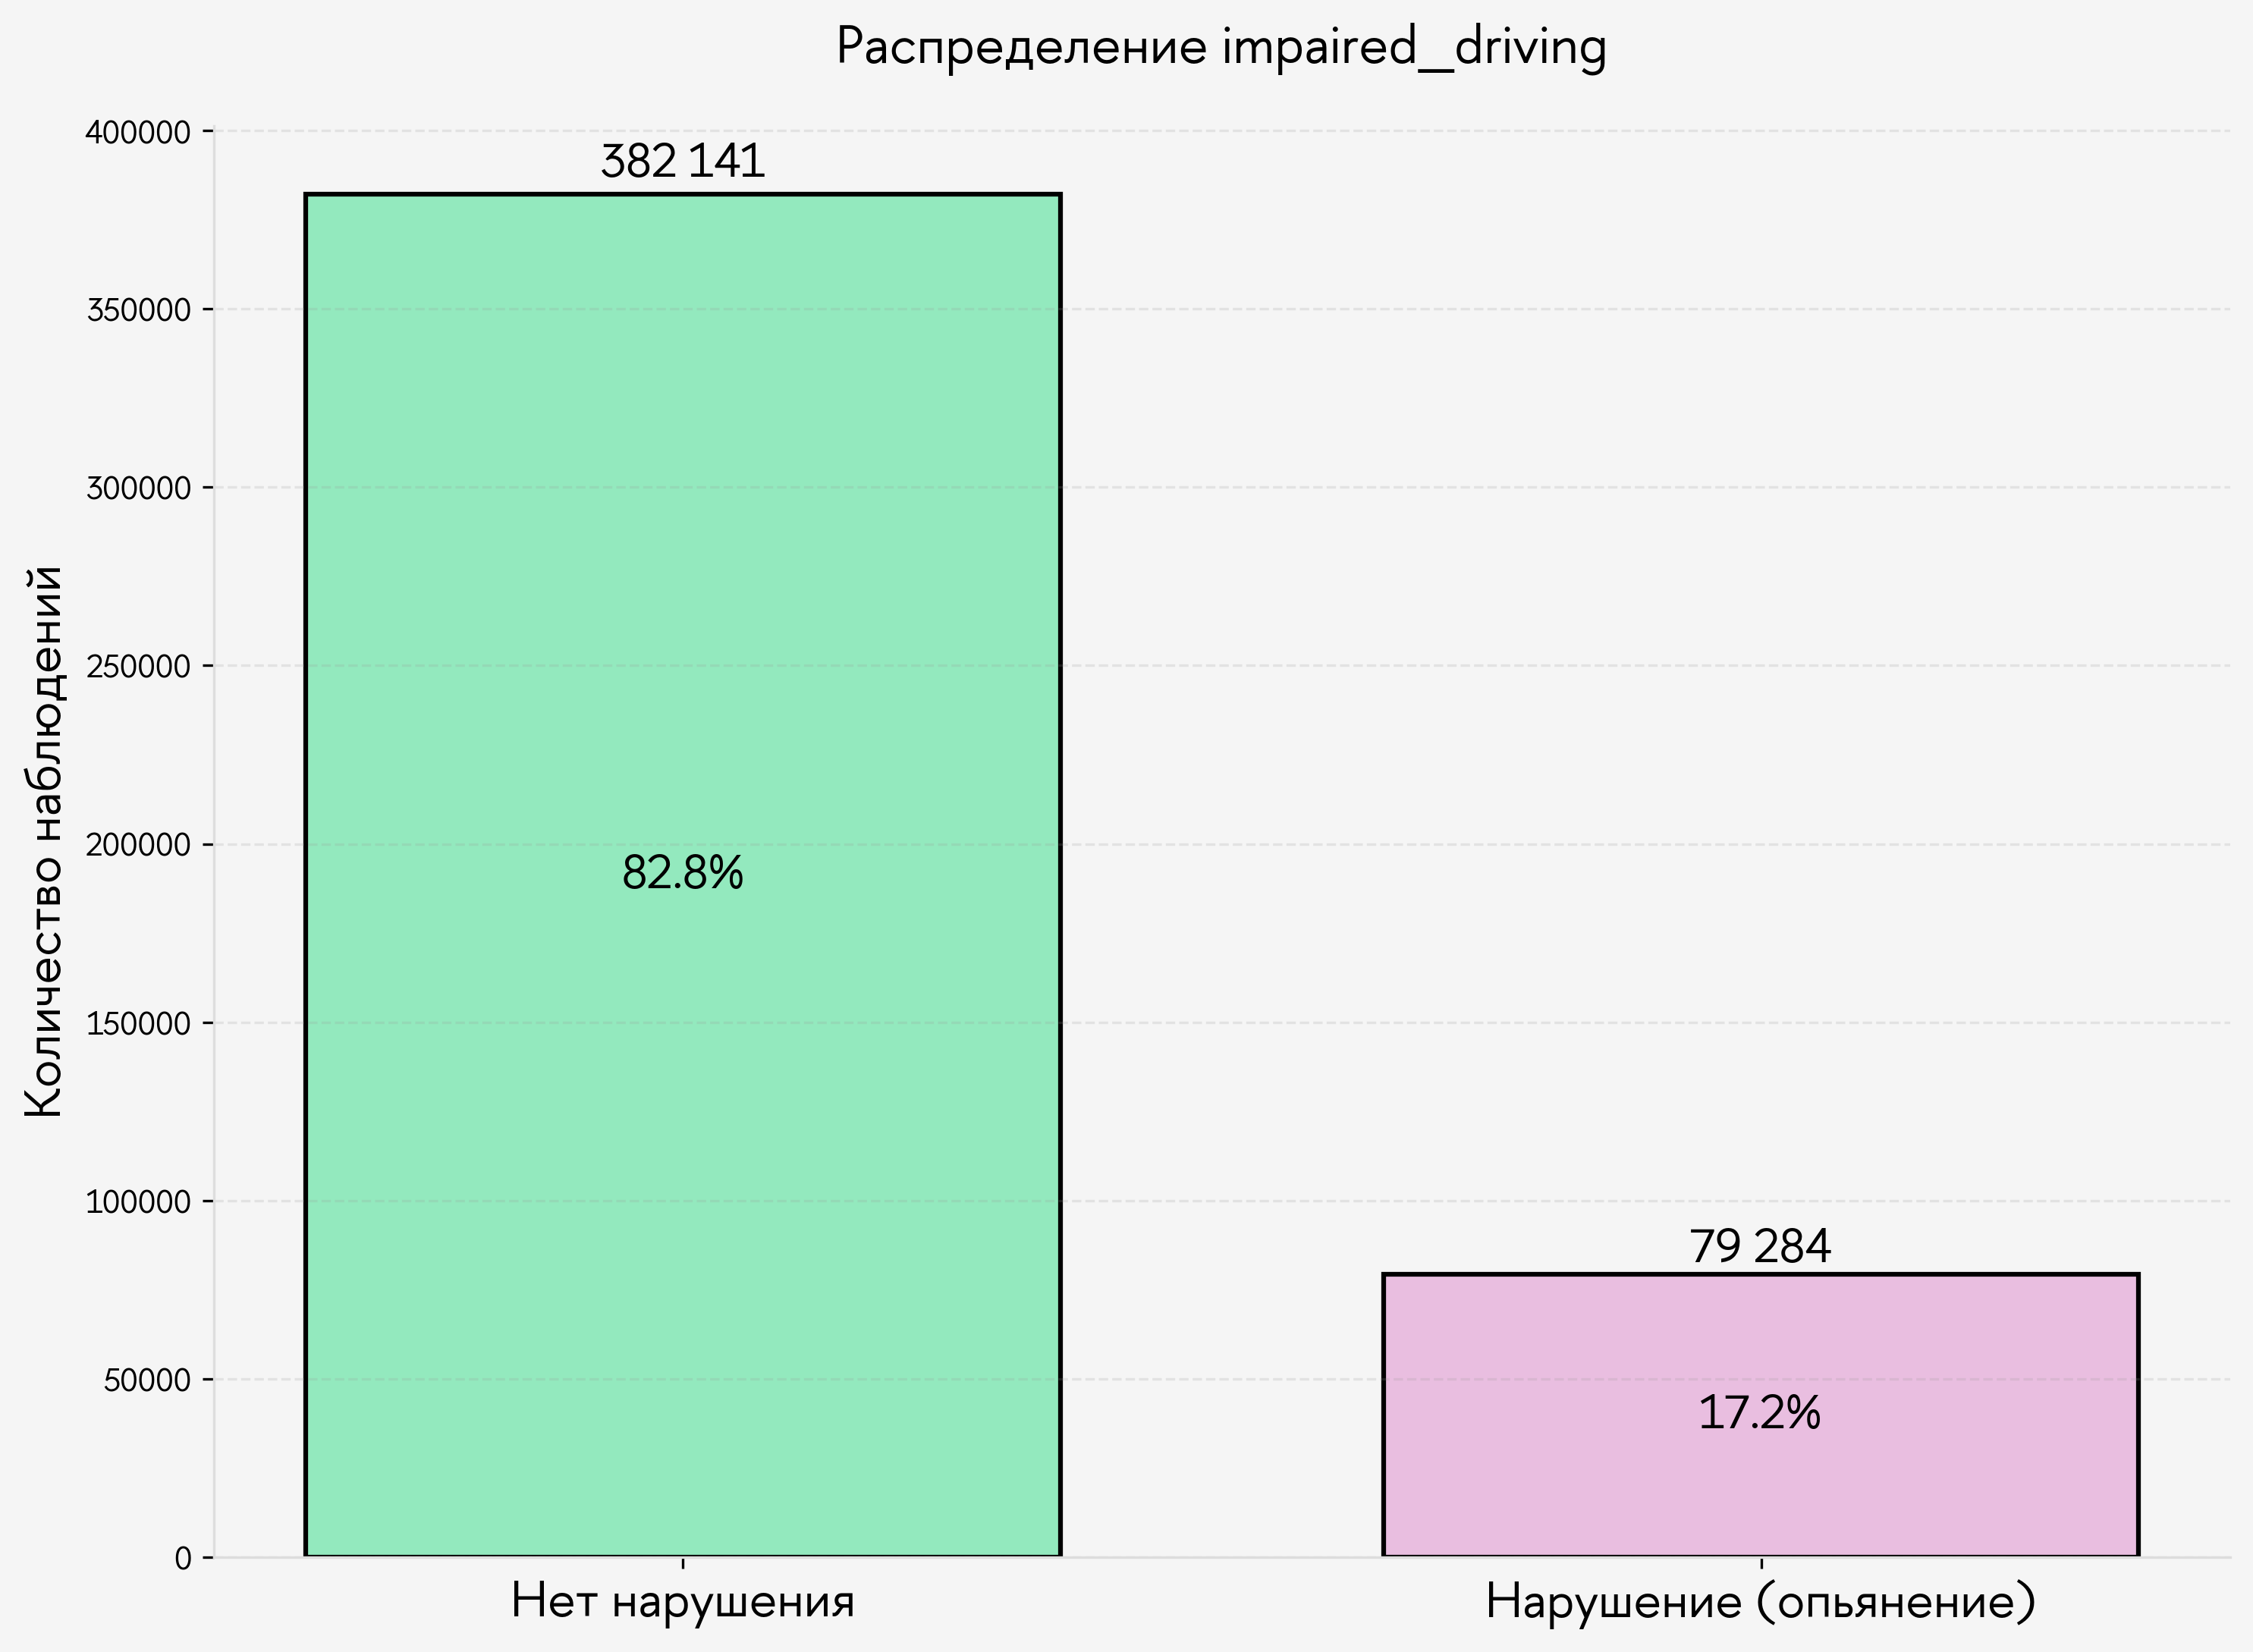

In [11]:
# Вариант с увеличенными подписями по оси X
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

# Данные
labels = ['Нет нарушения', 'Нарушение (опьянение)']
values = impaired_counts.values
percents = impaired_percent.tolist() if hasattr(impaired_percent, 'tolist') else [p for p in impaired_percent]

bars = ax.bar(labels, 
             values,
             color=['#93E9BE', '#E9BEE0'],
             edgecolor='#000000',
             linewidth=1.5,
             width=0.7)

# УВЕЛИЧИВАЕМ ПОДПИСИ НА ОСИ X
ax.set_xticklabels(labels, fontsize=16, fontweight='bold')  # Увеличенные подписи

ax.set_ylabel('Количество наблюдений', fontsize=16)
ax.set_title('Распределение impaired_driving', fontsize=17, fontweight='bold', pad=20)

# Добавляем количество над столбцами
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            height + height * 0.005,
            f'{int(height):,}'.replace(',', ' '),
            ha='center',
            va='bottom',
            fontsize=15,
            fontweight='bold',
            color="#000000")

# ПРОЦЕНТЫ ВНУТРИ
for i, bar in enumerate(bars):
    height = bar.get_height()
    percent = percents[i]
    
    ax.text(bar.get_x() + bar.get_width()/2,
            height / 2,
            f'{percent:.1f}%',  # Форматируем с одним знаком после запятой
            ha='center',
            va='center',
            fontsize=15,
            fontweight='bold',  # Сделал жирным
            color='#000000')

# Убираем рамку
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# Только горизонтальная сетка
ax.grid(axis='y', linestyle='--', alpha=0.2, color='#999999')

# Устанавливаем отступ между подписями и графиком
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Увеличиваем нижний отступ

plt.show()

In [12]:


ax.set_ylabel('Количество наблюдений', fontsize=16)
ax.set_title('Распределение impaired_driving', fontsize=17, fontweight='bold', pad=20)

# Добавляем количество над столбцами (меньше и светлее)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            height + height * 0.005,  # ближе к столбцу
            f'{int(height):,}'.replace(',', ' '),
            ha='center',
            va='bottom',
            fontsize=15,
            fontweight='bold',
            color="#000000")  # серый цвет

# ПРОЦЕНТЫ ВНУТРИ - ОЧЕНЬ КРУПНЫЕ И ЧЁТКИЕ
for i, bar in enumerate(bars):
    height = bar.get_height()
    percent = impaired_percent.iloc[i]
    
    # Очень крупный процент внутри
    ax.text(bar.get_x() + bar.get_width()/2,
            height / 2,
            f'{round(percent, 2)}%',
            ha='center',
            va='center',
            fontsize=15,  # Очень крупный шрифт
            fontweight='medium',
            color='#000000')  # ЧЕРНЫЙ

# Убираем рамку
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# Только горизонтальная сетка
ax.grid(axis='y', linestyle='--', alpha=0.2, color='#999999')

# Информация внизу

plt.tight_layout()
plt.show()

<Figure size 1920x1440 with 0 Axes>

/var/folders/nv/y1xwhy_x1gx4gn0wks7mdjqc0000gn/T/ipykernel_81468/1224229211.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, fontsize=13, fontweight='medium')


Шрифт 'HSE Sans' установлен
severity_counts:
severity
1    205461
2    180344
3     75620
Name: count, dtype: int64
Индексы: [1, 2, 3]
Значения: [np.int64(205461), np.int64(180344), np.int64(75620)]
Всего: 461425
Значение 1 (Легкая тяжесть травм): 205461 наблюдений (44.5%)
Значение 2 (Средняя тяжесть травм): 180344 наблюдений (39.1%)
Значение 3 (Есть погибшие): 75620 наблюдений (16.4%)

Метки: ['Легкая тяжесть травм', 'Средняя тяжесть травм', 'Есть погибшие']
Значения: [np.int64(205461), np.int64(180344), np.int64(75620)]
Проценты: [np.float64(44.52749634285095), np.float64(39.084141518123204), np.float64(16.388362139025844)]


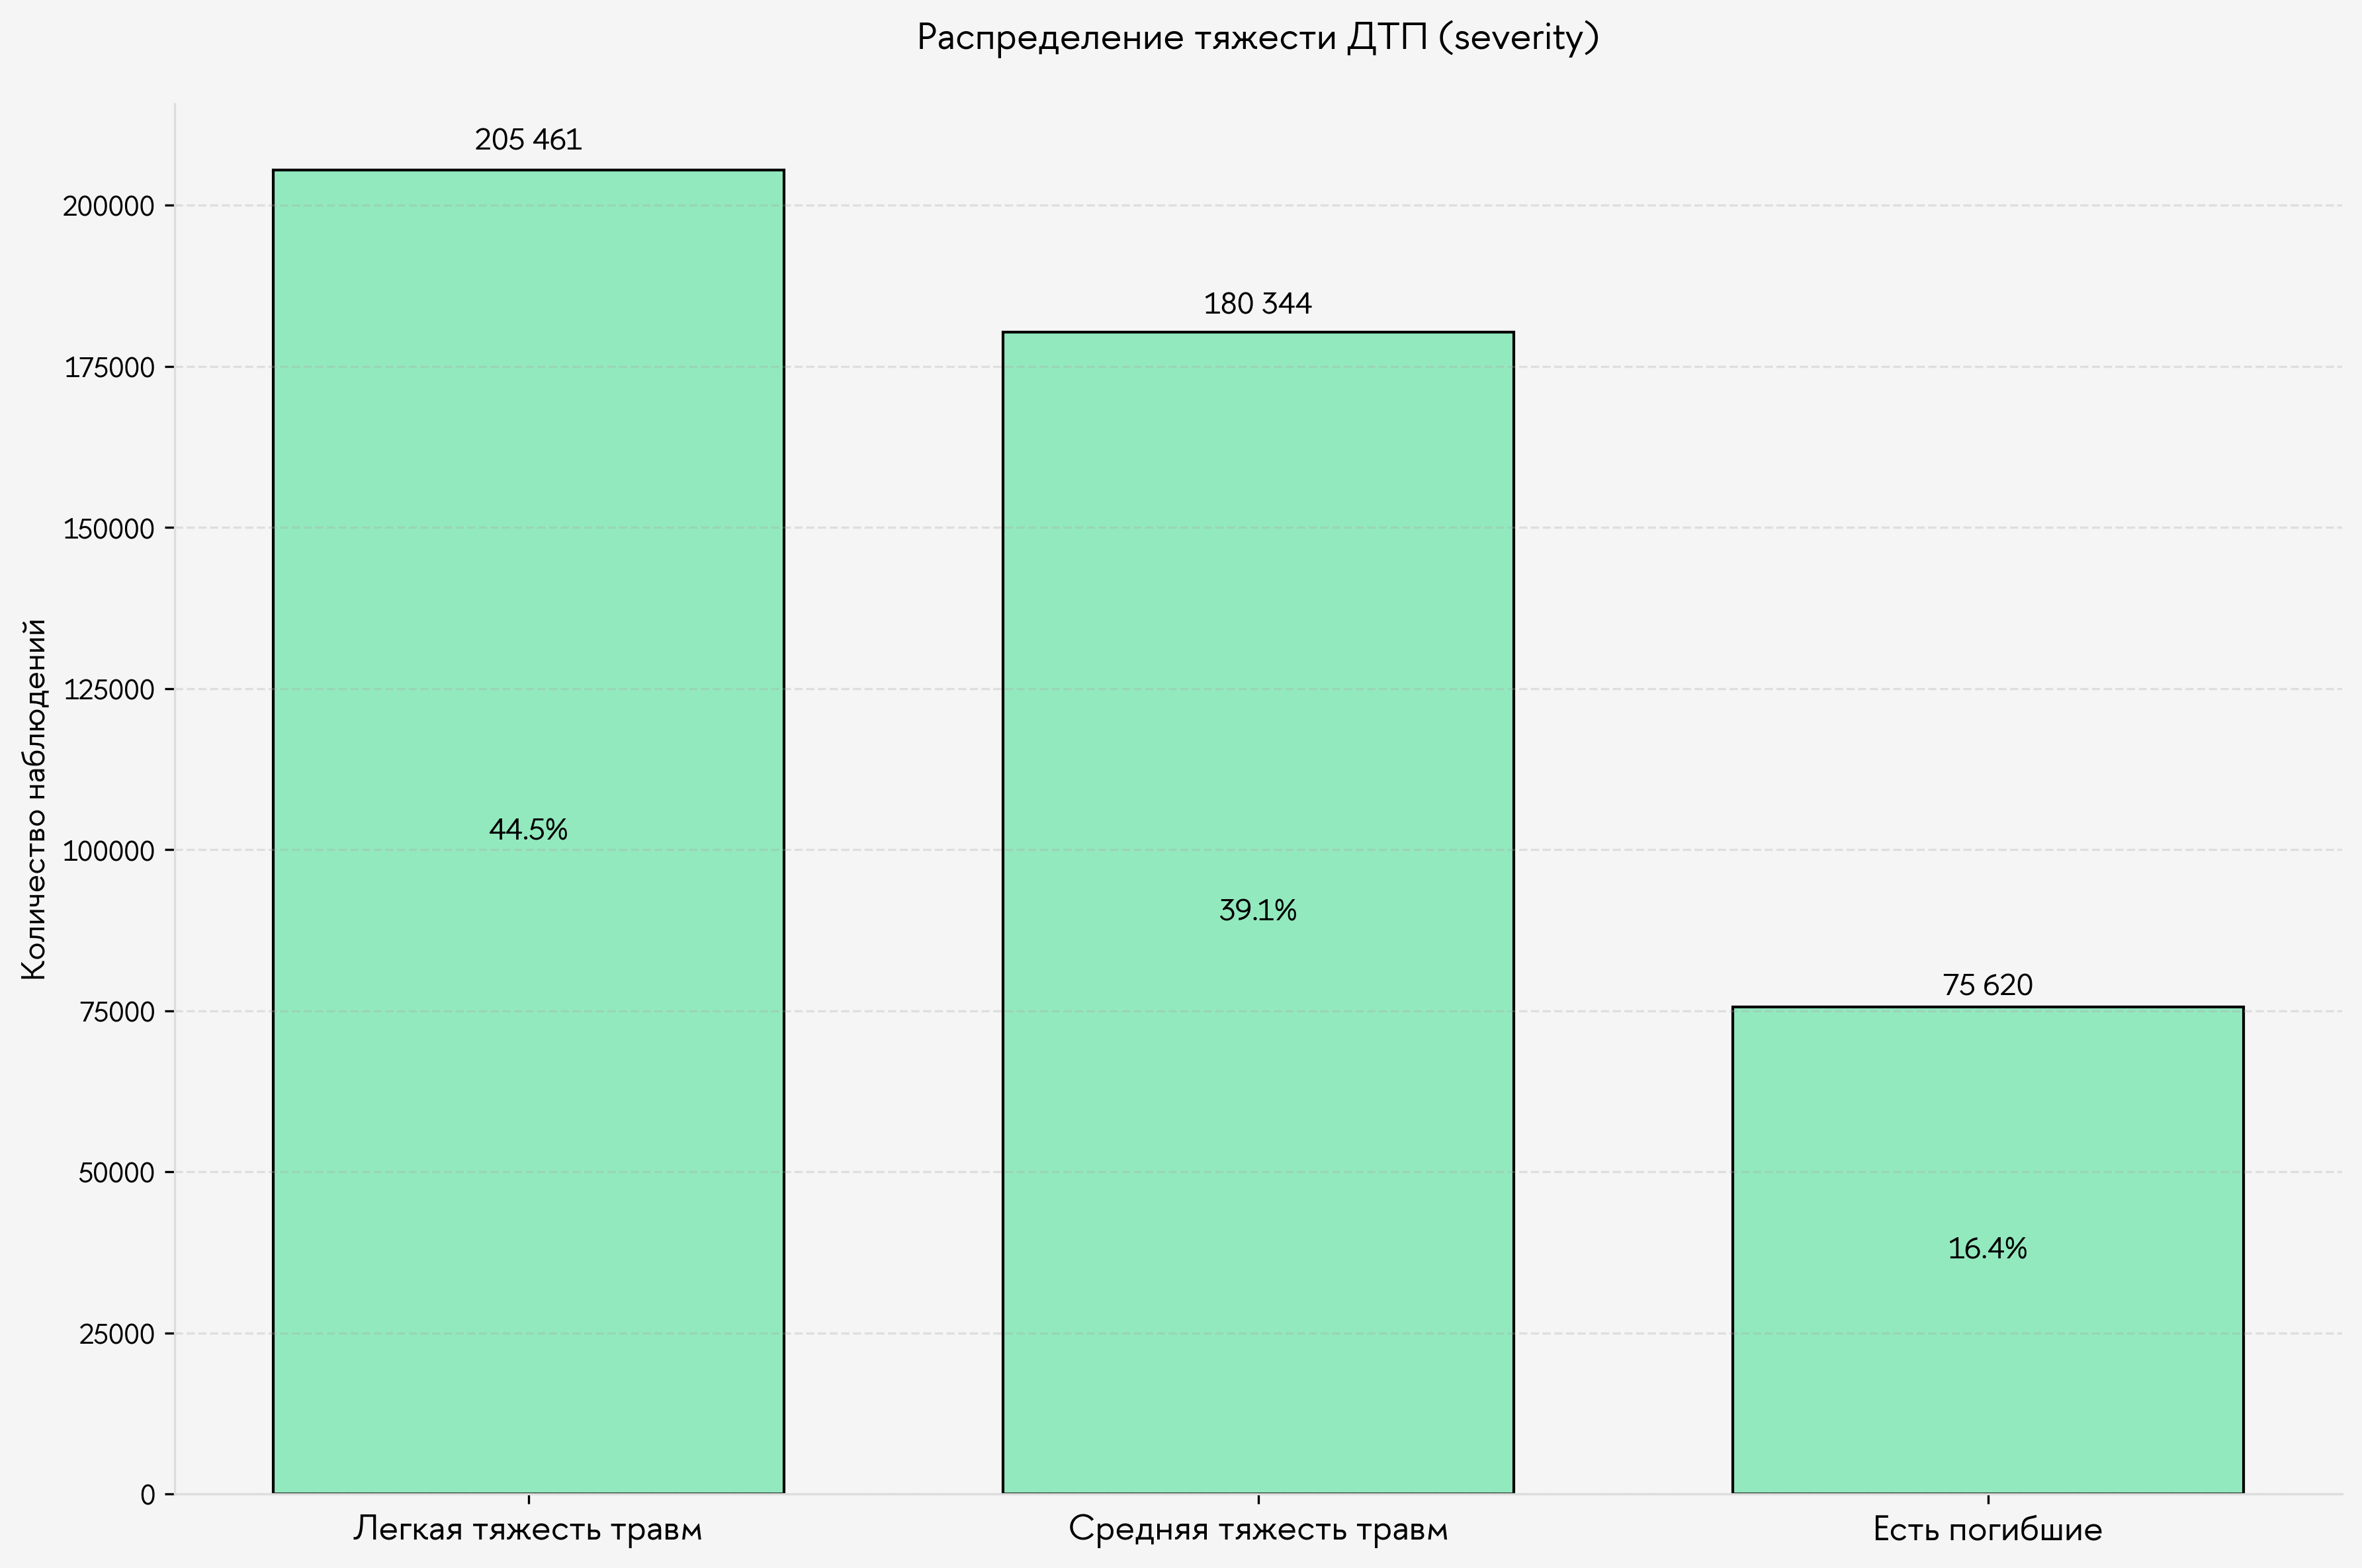


СТАТИСТИКА ПО severity:
Тяжесть ДТП               Код        Количество      Процент   
--------------------------------------------------------------------------------
Легкая тяжесть травм      1          205 461         44.5      %
Средняя тяжесть травм     2          180 344         39.1      %
Есть погибшие             3          75 620          16.4      %
--------------------------------------------------------------------------------
Всего                     -          461 425         100       %


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from pathlib import Path

# Установка шрифта HSE Sans
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()

if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name
    print(f"Шрифт '{font_name}' установлен")
else:
    print("Шрифт HSE Sans не найден, используется системный")

# Проверяем, есть ли колонка severity в данных
if 'severity' not in df.columns:
    print("ОШИБКА: Колонка 'severity' не найдена в DataFrame")
    print(f"Доступные колонки: {list(df.columns)}")
else:
    # Рассчитываем значения для severity
    severity_counts = df['severity'].value_counts().sort_index()
    print("severity_counts:")
    print(severity_counts)
    print(f"Индексы: {list(severity_counts.index)}")
    print(f"Значения: {list(severity_counts.values)}")

    total = severity_counts.sum()
    print(f"Всего: {total}")

    # Создаем словарь для названий категорий severity
    severity_labels = {
        1: 'Легкая тяжесть травм',
        2: 'Средняя тяжесть травм', 
        3: 'Есть погибшие'
    }

    # Рассчитываем проценты
    severity_percent = {}
    for value in severity_counts.index:
        if value in severity_labels:
            severity_percent[value] = (severity_counts[value] / total * 100)
            print(f"Значение {value} ({severity_labels[value]}): {severity_counts[value]} наблюдений ({severity_percent[value]:.1f}%)")
        else:
            severity_percent[value] = (severity_counts[value] / total * 100)
            print(f"Значение {value}: {severity_counts[value]} наблюдений ({severity_percent[value]:.1f}%)")

    # Создаем фигуру
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.patch.set_facecolor('#F5F5F5')  # фон фигуры
    ax.set_facecolor('#F5F5F5')  # фон графика

    # Создаем метки и значения в правильном порядке
    labels = []
    values = []
    percents = []

    # Сортируем по возрастанию severity
    sorted_values = sorted(severity_counts.index)
    
    for value in sorted_values:
        if value in severity_labels:
            labels.append(severity_labels[value])
        else:
            labels.append(f'Уровень {value}')
        
        values.append(severity_counts[value])
        percents.append(severity_percent[value])

    print(f"\nМетки: {labels}")
    print(f"Значения: {values}")
    print(f"Проценты: {percents}")

    # Создаем bar plot - используем один цвет для всех столбцов
    colors = ['#93E9BE'] * len(labels)  # один цвет для всех столбцов

    bars = ax.bar(labels, 
                 values,
                 color=colors,
                 edgecolor='#000000',
                 linewidth=1.0,
                 width=0.7)

    # Настройки графика
    ax.set_ylabel('Количество наблюдений', fontsize=12)
    ax.set_title('Распределение тяжести ДТП (severity)', fontsize=14, fontweight='bold', pad=20)

    # УСТАНАВЛИВАЕМ ПОДПИСИ ПО ОСИ X ШРИФТОМ 11
    ax.set_xticklabels(labels, fontsize=13, fontweight='medium')

    # Добавляем количество над столбцами
    for bar in bars:
        height = bar.get_height()
        # Количество над столбцом
        ax.text(bar.get_x() + bar.get_width()/2,
                height + height * 0.01,
                f'{int(height):,}'.replace(',', ' '),
                ha='center',
                va='bottom',
                fontsize=11,  # тоже 11 шрифт для количества
                fontweight='medium')

    # ДОБАВЛЯЕМ ПРОЦЕНТЫ ВНУТРИ СТОЛБЦОВ ЧЕРНЫМ ЦВЕТОМ
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percent = percents[i]
        
        # Процент ВНУТРИ столбца ЧЕРНЫМ цветом
        ax.text(bar.get_x() + bar.get_width()/2,
                height / 2,  # точно по центру столбца
                f'{percent:.1f}%',
                ha='center',
                va='center',
                fontsize=11,  # немного больше для процентов
                fontweight='bold',  # жирный
                color='#000000')  # ЧЕРНЫЙ цвет

    # Убираем рамку
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDDDDD')
    ax.spines['bottom'].set_color('#DDDDDD')

    # Добавляем сетку
    ax.grid(axis='y', linestyle='--', alpha=0.3, color='#AAAAAA')

    plt.tight_layout()
    plt.show()

    # Выводим данные в табличном виде
    print("\n" + "="*80)
    print("СТАТИСТИКА ПО severity:")
    print("="*80)
    print(f"{'Тяжесть ДТП':<25} {'Код':<10} {'Количество':<15} {'Процент':<10}")
    print("-"*80)

    # Выводим данные по категориям
    for i, label in enumerate(labels):
        code = sorted_values[i]
        print(f"{label:<25} {code:<10} {values[i]:<15,} {percents[i]:<10.1f}%".replace(',', ' '))

    print("-"*80)
    print(f"{'Всего':<25} {'-':<10} {total:<15,} {100:<10.0f}%".replace(',', ' '))
    print("="*80)

In [14]:
df.columns

Index(['unnamed:_0', 'region', 'date', 'coord_l', 'coord_w', 'road_name',
       'road_category', 'n_vehicles', 'n_participants', 'n_deaths',
       'n_injured', 'vehicle_failure', 'non_private_vehicle', 'white_vehicle',
       'black_vehicle', 'colored_vehicle', 'drunk_driver', 'female_driver',
       'escaped', 'no_seatbelt_injury', 'n_drunk', 'n_children', 'n_cyclists',
       'vehicle_age_min', 'vehicle_age_max', 'vehicle_age_avg', 'n_class_a',
       'n_class_b', 'n_class_c', 'n_class_d', 'n_class_e', 'n_class_s',
       'n_front_drive', 'n_rear_drive', 'n_4wd', 'n_guilty', 'guilty_share',
       'n_fatal_violations', 'guilty_exp_avg', 'exp_avg', 'road_rank_cat',
       'road_defects_cat', 'traffic_changes_bin', 'traffic_changes_cat',
       'road_surface_cat', 'type_cat', 'out_of_town', 'street_rank_cat',
       'weather_interpretable', 'weather_cat', 'adj_objects_interpretable',
       'adj_objects_cat', 'cause_factors_cat', 'crossing_violation',
       'impaired_driving', 'inte

In [15]:
# Простая карта с тремя слоями
import folium

# Получаем 3 самых популярных типа дорог
top_3_roads = df['road_rank_cat'].value_counts().nlargest(3).index.tolist()

# Создаем карту
m = folium.Map(
    location=[df['coord_w'].mean(), df['coord_l'].mean()],
    zoom_start=11,
    tiles='OpenStreetMap'
)

# Цвета
colors = ['#93E9BE', '#E9BEE0', '#000000']

# Добавляем каждую дорогу как отдельный слой
for i, road_type in enumerate(top_3_roads):
    road_data = df[df['road_rank_cat'] == road_type]
    
    # Берем выборку если много данных
    if len(road_data) > 100000:
        road_data = road_data.sample(n=500, random_state=42)
    
    # Создаем FeatureGroup для этого типа
    fg = folium.FeatureGroup(name=f"{road_type.split('(')[0].strip()} ({len(road_data)})")
    
    for idx, row in road_data.iterrows():
        folium.CircleMarker(
            location=[row['coord_w'], row['coord_l']],
            radius=3,
            color=colors[i],
            fill=True,
            fill_color=colors[i],
            fill_opacity=0.6
        ).add_to(fg)
    
    fg.add_to(m)

# Добавляем контроль слоев
folium.LayerControl().add_to(m)

# Сохраняем
m.save('simple_road_map.html')
print("✅ Простая карта сохранена как: simple_road_map.html")

✅ Простая карта сохранена как: simple_road_map.html


In [16]:
df['severity2'] = (df['severity'] == 2).astype(int)
df['severity3'] = (df['severity'] == 3).astype(int)

Шрифт 'HSE Sans' установлен
Вычисление корреляций для бинарных переменных...
Использован метод: binary_pearson
Размер матрицы: (14, 14)


/Users/aleksejgavrikov/dtp_analisys/venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HSE Sans.
  fig.canvas.draw()


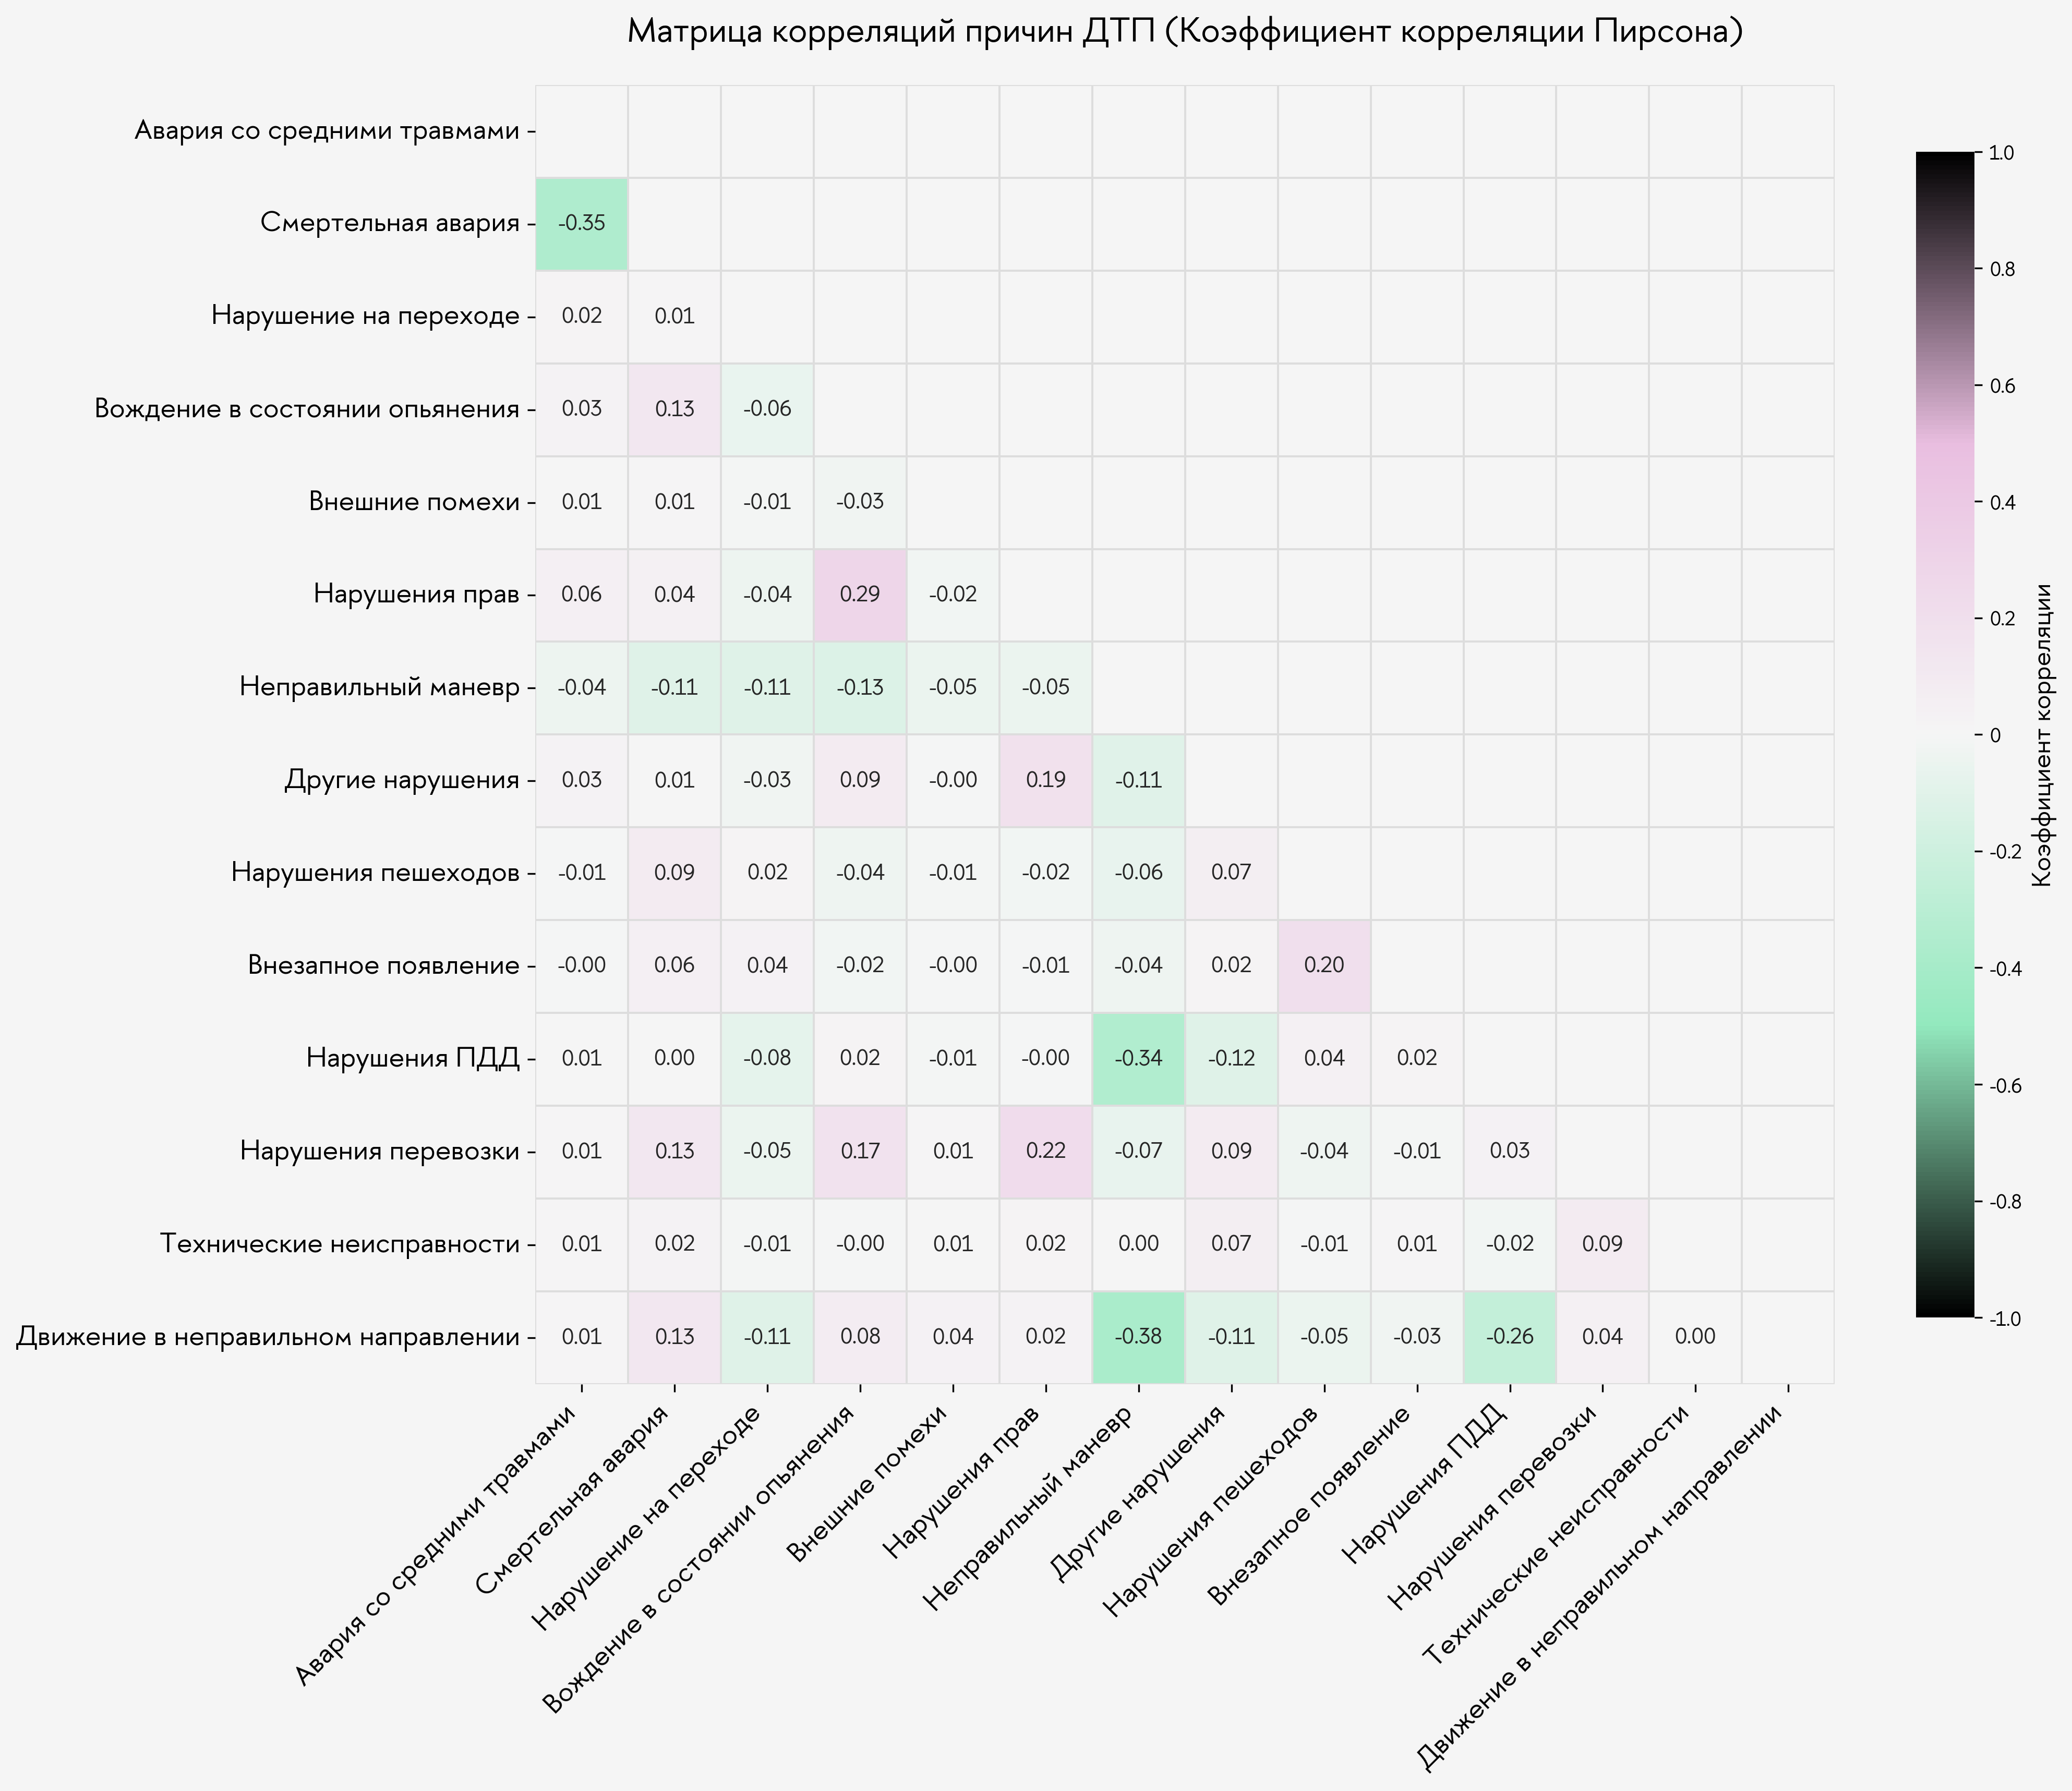


СТАТИСТИКА КОРРЕЛЯЦИЙ (Коэффициент корреляции Пирсона):
Всего парных корреляций: 91
Минимальная корреляция: -0.3807
Максимальная корреляция: 0.2878
Средняя корреляция: -0.0037
Медианная корреляция: 0.0046
Отрицательных корреляций (< 0): 44 (48.4%)
Положительных корреляций (> 0): 47 (51.6%)
Нулевых корреляций (|корр| < 0.01): 20 (22.0%)
Слабых корреляций (|корр| < 0.1): 72 (79.1%)
Средних корреляций (0.1 ≤ |корр| < 0.5): 19 (20.9%)
Сильных корреляций (|корр| ≥ 0.5): 0 (0.0%)

Самые сильные отрицательные корреляции:
  1. Неправильный маневр - Движение в неправильном направлении: -0.3807
  2. Авария со средними травмами - Смертельная авария: -0.3546
  3. Неправильный маневр - Нарушения ПДД: -0.3438
  4. Нарушения ПДД - Движение в неправильном направлении: -0.2561
  5. Вождение в состоянии опьянения - Неправильный маневр: -0.1315

Самые сильные положительные корреляции:
  1. Вождение в состоянии опьянения - Нарушения прав: 0.2878
  2. Нарушения прав - Нарушения перевозки: 0.2204
  3. Нару

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import chi2_contingency

# Установка шрифта HSE Sans
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()

if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name
    print(f"Шрифт '{font_name}' установлен")
else:
    print("Шрифт HSE Sans не найден, используется системный")

# Список переменных
reasons = ['severity2', 'severity3', 'crossing_violation', 'impaired_driving', 'interference_violation', 
           'license_violation', 'maneuver_violation', 'other_violation', 
           'pedestrian_violation', 'sudden_appearance_violation', 
           'traffic_control_violation', 'transport_violation', 
           'vehicle_tech_violation', 'wrong_way']

# Русские названия переменных (укороченные)
russian_names = {
    'severity3': 'Смертельная авария',
    'severity2': 'Авария со средними травмами',
    'crossing_violation': 'Нарушение на переходе',
    'impaired_driving': 'Вождение в состоянии опьянения',
    'interference_violation': 'Внешние помехи',
    'license_violation': 'Нарушения прав',
    'maneuver_violation': 'Неправильный маневр',
    'other_violation': 'Другие нарушения',
    'pedestrian_violation': 'Нарушения пешеходов',
    'sudden_appearance_violation': 'Внезапное появление',
    'traffic_control_violation': 'Нарушения ПДД',
    'transport_violation': 'Нарушения перевозки',
    'vehicle_tech_violation': 'Технические неисправности',
    'wrong_way': 'Движение в неправильном направлении'
}

# Функция для расчета фи-коэффициента (Phi coefficient) для бинарных переменных
def phi_coefficient(x, y):
    """
    Вычисляет фи-коэффициент для двух бинарных переменных
    Phi = (AD - BC) / sqrt((A+B)(C+D)(A+C)(B+D))
    где:
        A = оба 1
        B = x=1, y=0  
        C = x=0, y=1
        D = оба 0
    """
    # Создаем таблицу сопряженности 2x2
    contingency = pd.crosstab(x, y)
    
    # Убедимся, что таблица 2x2 (могут отсутствовать некоторые комбинации)
    n00 = contingency.get(0, {}).get(0, 0)
    n01 = contingency.get(0, {}).get(1, 0)
    n10 = contingency.get(1, {}).get(0, 0)
    n11 = contingency.get(1, {}).get(1, 0)
    
    # Вычисляем фи-коэффициент
    numerator = n11 * n00 - n10 * n01
    denominator = np.sqrt((n11 + n10) * (n01 + n00) * (n11 + n01) * (n10 + n00))
    
    if denominator == 0:
        return 0
    else:
        return numerator / denominator

# Функция для расчета коэффициента корреляции Пирсона для бинарных данных
def binary_pearson_corr(x, y):
    """
    Для бинарных переменных коэффициент Пирсона эквивалентен фи-коэффициенту
    """
    return np.corrcoef(x, y)[0, 1]

# Функция для расчета тетрахорической корреляции (если предполагается латентная нормальность)
def tetrachoric_correlation(x, y):
    """
    Тетрахорическая корреляция (предполагает латентную нормальность)
    Более подходит, если бинарные переменные происходят от непрерывных
    """
    from scipy.stats import norm
    
    contingency = pd.crosstab(x, y)
    n00 = contingency.get(0, {}).get(0, 0)
    n01 = contingency.get(0, {}).get(1, 0)
    n10 = contingency.get(1, {}).get(0, 0)
    n11 = contingency.get(1, {}).get(1, 0)
    
    total = n00 + n01 + n10 + n11
    
    if total == 0:
        return 0
    
    # Пропорции
    p00 = n00 / total
    p01 = n01 / total
    p10 = n10 / total
    p11 = n11 / total
    
    # Квантили нормального распределения
    z1 = norm.ppf(p00 + p01)
    z2 = norm.ppf(p00 + p10)
    
    # Итеративное решение уравнения
    # Используем приближение Дивги
    r = np.cos(np.pi / (1 + np.sqrt((p11 * p00) / (p10 * p01))))
    
    return r

# Создаем матрицу корреляций для бинарных переменных
print("Вычисление корреляций для бинарных переменных...")

# Выбираем метод:
# 1. phi_coefficient - классический для бинарных
# 2. binary_pearson_corr - простой и понятный (рекомендуется)
# 3. tetrachoric_correlation - если предполагается латентная нормальность

method = "binary_pearson"  # можно поменять на "phi" или "tetrachoric"

corr_matrix = pd.DataFrame(index=reasons, columns=reasons)

for i, var1 in enumerate(reasons):
    for j, var2 in enumerate(reasons):
        if i == j:
            corr_matrix.loc[var1, var2] = 1.0
        elif i < j:
            if method == "phi":
                corr = phi_coefficient(df[var1], df[var2])
            elif method == "tetrachoric":
                corr = tetrachoric_correlation(df[var1], df[var2])
            else:  # binary_pearson (по умолчанию)
                corr = binary_pearson_corr(df[var1], df[var2])
            
            corr_matrix.loc[var1, var2] = corr
            corr_matrix.loc[var2, var1] = corr
        else:
            continue

# Преобразуем в float
corr_matrix = corr_matrix.astype(float)

print(f"Использован метод: {method}")
print(f"Размер матрицы: {corr_matrix.shape}")

# ИСПРАВЛЕННАЯ ЦВЕТОВАЯ ПАЛИТРА: от -1 до 1
colors = [
    '#000000',   # черный - для -1.0
    '#93E9BE',   # светлозеленый - для средних отрицательных
    '#F5F5F5',   # фон - для 0
    '#E9BEE0',   # светлорозовый - для средних положительных
    '#000000'    # черный - для 1.0
]

# Создаем кастомную цветовую карту
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Создаем фигуру с заданным фоном
fig, ax = plt.subplots(figsize=(14, 12))
fig.patch.set_facecolor('#F5F5F5')  # фон фигуры
ax.set_facecolor('#F5F5F5')  # фон графика

# Создаем heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Маска для верхнего треугольника
heatmap = sns.heatmap(corr_matrix, 
                      mask=mask,
                      annot=True, 
                      fmt='.2f', 
                      cmap=custom_cmap,
                      center=0,
                      square=True,
                      linewidths=0.5,
                      linecolor='#DDDDDD',
                      cbar_kws={'shrink': 0.8, 'label': 'Коэффициент корреляции'},
                      ax=ax,
                      vmin=-1,
                      vmax=1)

# Устанавливаем русские названия
russian_labels = [russian_names[col] for col in reasons]
heatmap.set_xticklabels(russian_labels, rotation=45, ha='right', fontsize=13)
heatmap.set_yticklabels(russian_labels, rotation=0, fontsize=13)

# Заголовок
method_name = {
    "phi": "Фи-коэффициент",
    "binary_pearson": "Коэффициент корреляции Пирсона",
    "tetrachoric": "Тетрахорическая корреляция"
}
plt.title(f'Матрица корреляций причин ДТП ({method_name[method]})', 
          fontsize=16, fontweight='bold', pad=20)

# Убираем рамку
for spine in ax.spines.values():
    spine.set_color('#DDDDDD')
    spine.set_linewidth(0.5)

# Настраиваем цветовую шкалу
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels(['-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0', '0.2', '0.4', '0.6', '0.8', '1.0'])
cbar.ax.tick_params(labelsize=9)
cbar.ax.set_ylabel('Коэффициент корреляции', fontsize=12)

# ПОДСВЕТКА СИЛЬНЫХ КОРРЕЛЯЦИЙ (по модулю > 0.7)
texts = [t for t in ax.texts]

# Собираем значения корреляций из верхнего треугольника
corr_values = []
for i in range(len(reasons)):
    for j in range(i+1, len(reasons)):
        corr_values.append(corr_matrix.iloc[i, j])

# Меняем цвет текста для сильных корреляций
for idx, text in enumerate(texts):
    if idx < len(corr_values):
        value = corr_values[idx]
        if abs(value) > 0.7:
            text.set_color('white')
            text.set_fontweight('bold')
            text.set_fontsize(11)
        elif abs(value) > 0.5:
            text.set_color('#000000')
            text.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Проверим, есть ли отрицательные корреляции в данных
print("\n" + "="*60)
print(f"СТАТИСТИКА КОРРЕЛЯЦИЙ ({method_name[method]}):")
print("="*60)

# Создаем плоский список всех корреляций (без диагонали и дубликатов)
all_correlations = []
for i in range(len(reasons)):
    for j in range(i+1, len(reasons)):
        all_correlations.append(corr_matrix.iloc[i, j])

all_correlations = np.array(all_correlations)

print(f"Всего парных корреляций: {len(all_correlations)}")
print(f"Минимальная корреляция: {all_correlations.min():.4f}")
print(f"Максимальная корреляция: {all_correlations.max():.4f}")
print(f"Средняя корреляция: {all_correlations.mean():.4f}")
print(f"Медианная корреляция: {np.median(all_correlations):.4f}")
print(f"Отрицательных корреляций (< 0): {(all_correlations < 0).sum()} ({(all_correlations < 0).sum()/len(all_correlations)*100:.1f}%)")
print(f"Положительных корреляций (> 0): {(all_correlations > 0).sum()} ({(all_correlations > 0).sum()/len(all_correlations)*100:.1f}%)")
print(f"Нулевых корреляций (|корр| < 0.01): {(np.abs(all_correlations) < 0.01).sum()} ({(np.abs(all_correlations) < 0.01).sum()/len(all_correlations)*100:.1f}%)")
print(f"Слабых корреляций (|корр| < 0.1): {(np.abs(all_correlations) < 0.1).sum()} ({(np.abs(all_correlations) < 0.1).sum()/len(all_correlations)*100:.1f}%)")
print(f"Средних корреляций (0.1 ≤ |корр| < 0.5): {((np.abs(all_correlations) >= 0.1) & (np.abs(all_correlations) < 0.5)).sum()} ({((np.abs(all_correlations) >= 0.1) & (np.abs(all_correlations) < 0.5)).sum()/len(all_correlations)*100:.1f}%)")
print(f"Сильных корреляций (|корр| ≥ 0.5): {(np.abs(all_correlations) >= 0.5).sum()} ({(np.abs(all_correlations) >= 0.5).sum()/len(all_correlations)*100:.1f}%)")

# Самые сильные отрицательные корреляции
print("\nСамые сильные отрицательные корреляции:")
neg_corr = all_correlations[all_correlations < 0]
if len(neg_corr) > 0:
    sorted_neg = np.sort(neg_corr)
    for i in range(min(5, len(sorted_neg))):
        # Находим, каким переменным соответствует эта корреляция
        for var_i in range(len(reasons)):
            for var_j in range(var_i+1, len(reasons)):
                if np.abs(corr_matrix.iloc[var_i, var_j] - sorted_neg[i]) < 0.001:
                    print(f"  {i+1}. {russian_names[reasons[var_i]]} - {russian_names[reasons[var_j]]}: {sorted_neg[i]:.4f}")
                    break
            else:
                continue
            break
else:
    print("  Отрицательных корреляций не обнаружено")

# Самые сильные положительные корреляции
print("\nСамые сильные положительные корреляции:")
pos_corr = all_correlations[all_correlations > 0]
if len(pos_corr) > 0:
    sorted_pos = np.sort(pos_corr)[::-1]  # по убыванию
    for i in range(min(5, len(sorted_pos))):
        # Находим, каким переменным соответствует эта корреляция
        for var_i in range(len(reasons)):
            for var_j in range(var_i+1, len(reasons)):
                if np.abs(corr_matrix.iloc[var_i, var_j] - sorted_pos[i]) < 0.001:
                    print(f"  {i+1}. {russian_names[reasons[var_i]]} - {russian_names[reasons[var_j]]}: {sorted_pos[i]:.4f}")
                    break
            else:
                continue
            break

# Дополнительно: анализ частот переменных
print("\n" + "="*60)
print("ЧАСТОТЫ БИНАРНЫХ ПЕРЕМЕННЫХ:")
print("="*60)
print(f"{'Причина':<30} {'Частота (1)':<12} {'Процент':<10} {'Всего':<10}")
print("-"*60)

for var in reasons:
    freq = df[var].sum()
    total_count = len(df[var])
    percentage = (freq / total_count * 100) if total_count > 0 else 0
    print(f"{russian_names[var]:<30} {freq:<12,} {percentage:<10.1f}% {total_count:<10,}".replace(',', ' '))

print("="*60)

Шрифт 'HSE Sans' установлен
Используем колонку: date


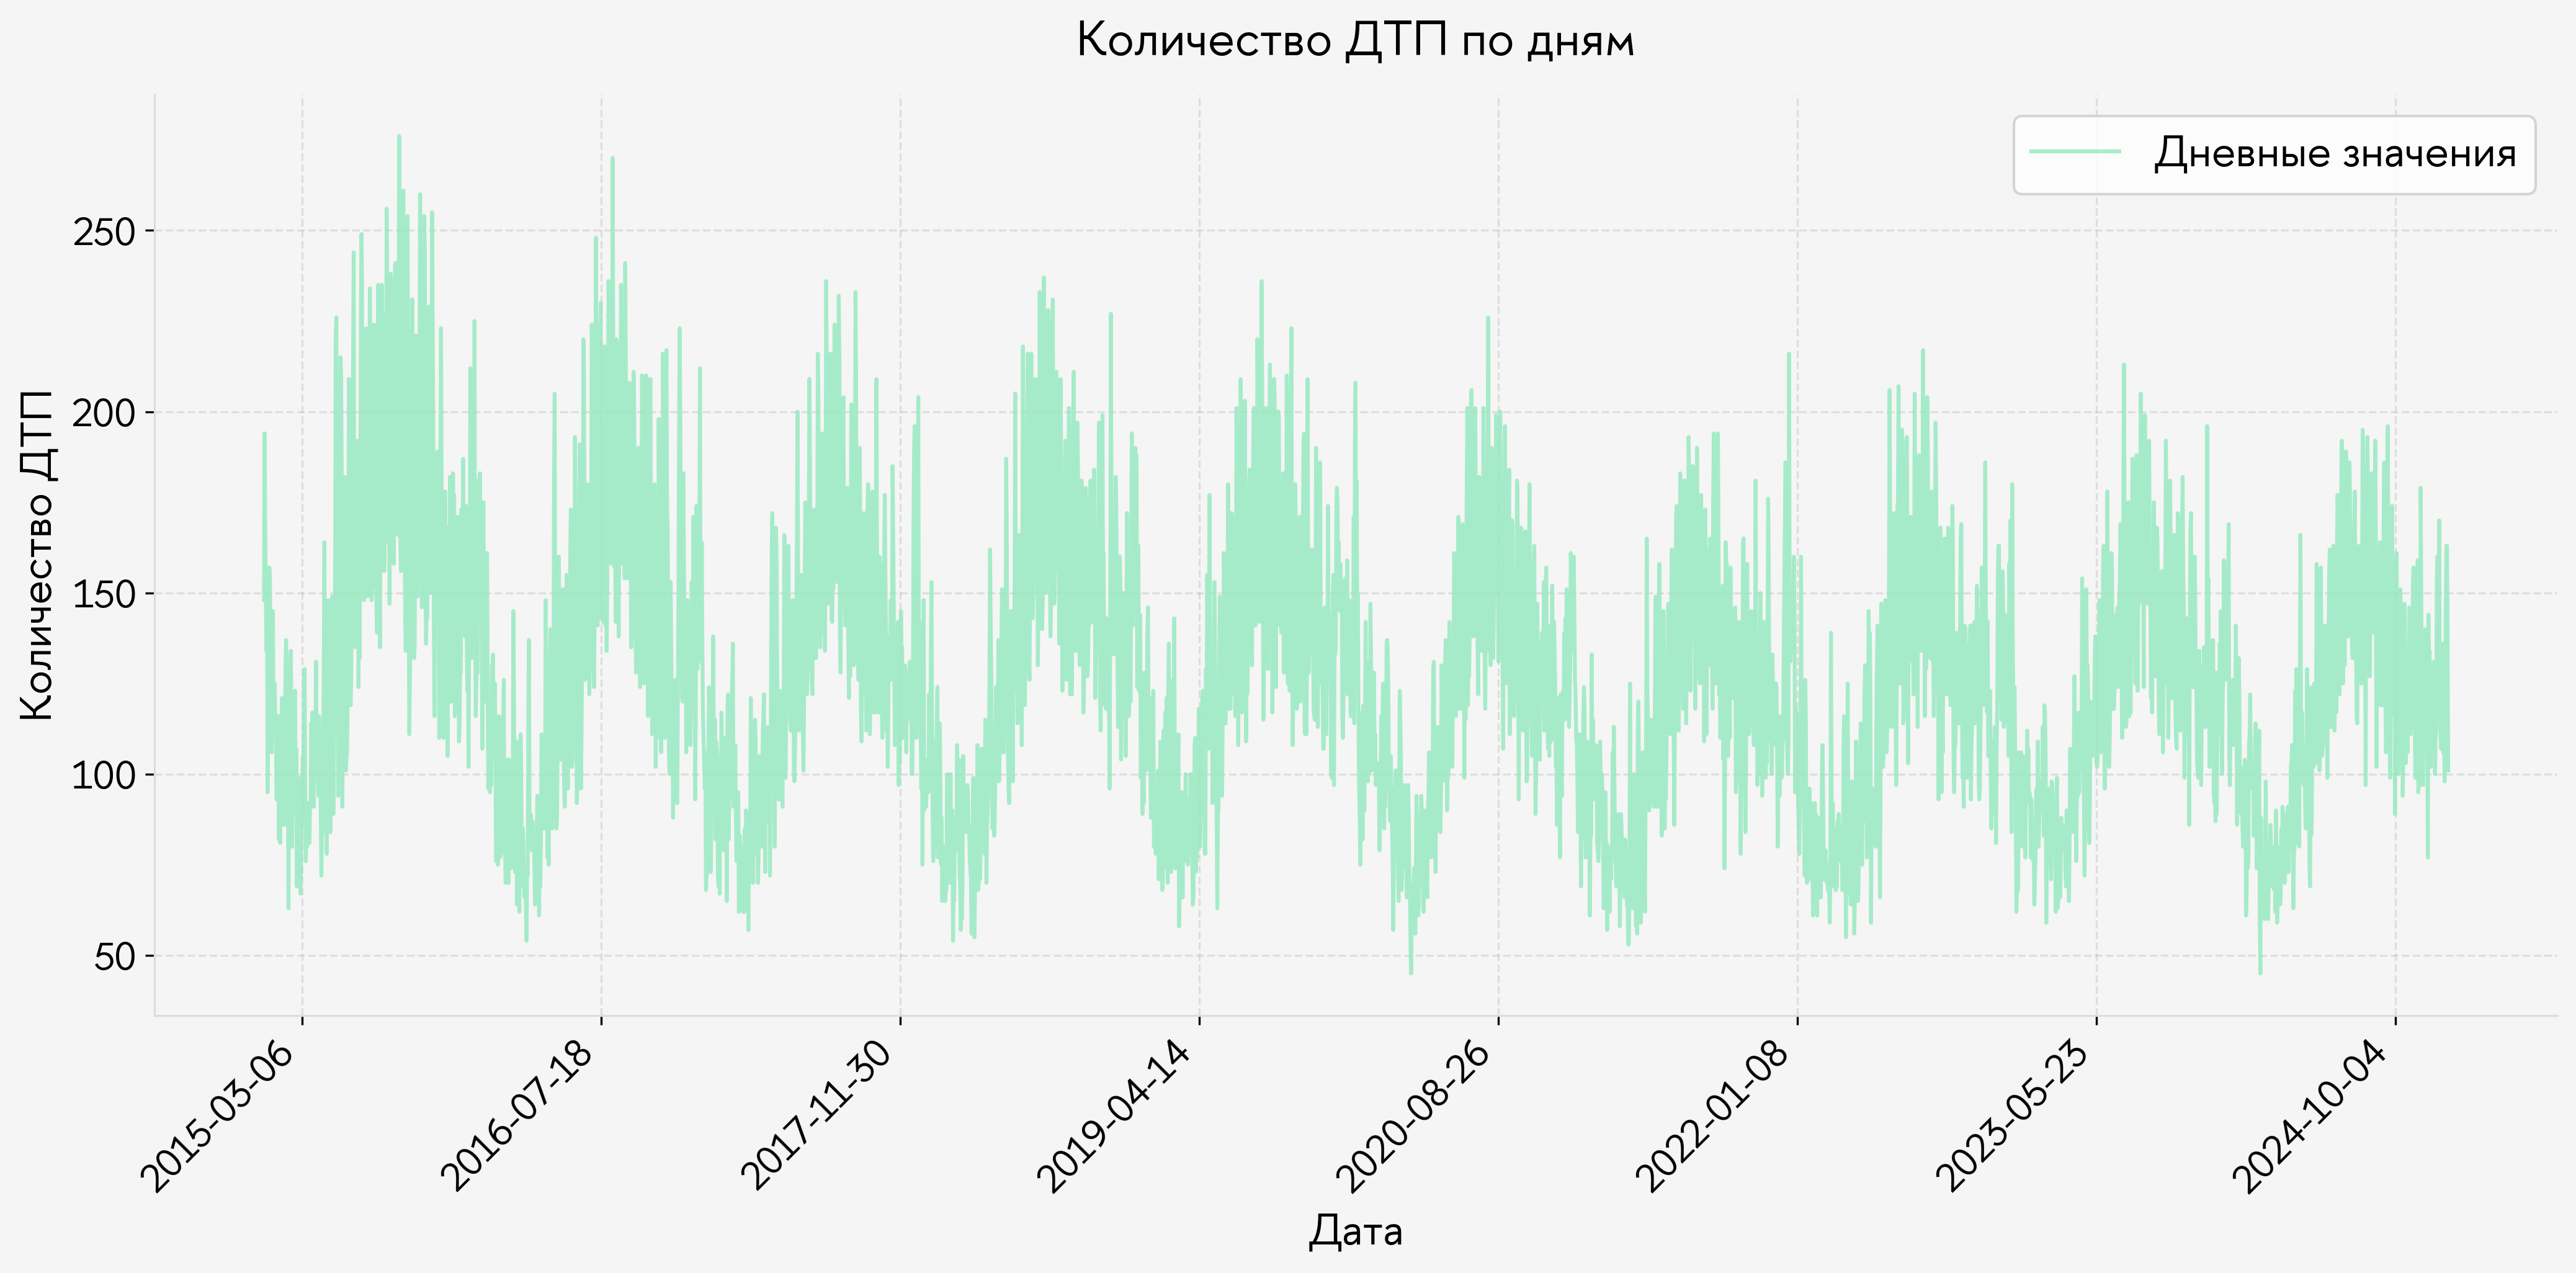


Статистика:
Всего дней: 3653
Всего ДТП: 461 425
Среднее в день: 126.3
Максимум в день: 276
Минимум в день: 45
Период: 2015-01-01 - 2024-12-31


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from pathlib import Path
import numpy as np

# Установка шрифта HSE Sans
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()

if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.size'] = 12
    print(f"Шрифт '{font_name}' установлен")
else:
    print("Шрифт HSE Sans не найден, используется системный")
    plt.rcParams['font.size'] = 16

# Найдем колонку с датой
date_columns = ['date', 'DATE', 'Date', 'дата', 'Дата', 'timestamp', 'Timestamp', 'время', 'Время']
date_col = None
for col in date_columns:
    if col in df.columns:
        date_col = col
        break

if not date_col:
    print("Колонка с датой не найдена")
    print(f"Доступные колонки: {list(df.columns)}")
else:
    print(f"Используем колонку: {date_col}")
    
    # Преобразуем дату
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Сортируем по дате
    df_sorted = df.sort_values(date_col)
    
    # Группируем по дням
    daily_counts = df_sorted.groupby(df_sorted[date_col].dt.date).size().reset_index(name='count')
    daily_counts[date_col] = pd.to_datetime(daily_counts[date_col])
    
    # Простой plot по дням
    fig, ax = plt.subplots(figsize=(14, 7))
    fig.patch.set_facecolor('#F5F5F5')
    ax.set_facecolor('#F5F5F5')
    
    # Простая линия по дням
    ax.plot(daily_counts[date_col], daily_counts['count'], 
            color='#93E9BE', 
            linewidth=1.5,
            alpha=0.8,
            label='Дневные значения')
    
    # Скользящее среднее за 30 дней
    
    
    # Добавляем скользящее среднее за 30 дней
    
    # Настройки графика
    ax.set_xlabel('Дата', fontsize=17)
    ax.set_ylabel('Количество ДТП', fontsize=17)
    ax.set_title('Количество ДТП по дням', fontsize=19, fontweight='bold', pad=15)
    
    # Форматирование дат
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.yticks(fontsize=15)
    plt.xticks(rotation=45, ha='right', fontsize=15)
    
    # Убираем рамку
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDDDDD')
    ax.spines['bottom'].set_color('#DDDDDD')
    
    # Легенда
    ax.legend(loc='upper right', fontsize=17)
    
    # Сетка
    ax.grid(True, linestyle='--', alpha=0.3, color='#AAAAAA')
    
    plt.tight_layout()
    plt.show()
    
    # Статистика
    print(f"\nСтатистика:")
    print(f"Всего дней: {len(daily_counts)}")
    print(f"Всего ДТП: {daily_counts['count'].sum():,}".replace(',', ' '))
    print(f"Среднее в день: {daily_counts['count'].mean():.1f}")
    print(f"Максимум в день: {daily_counts['count'].max()}")
    print(f"Минимум в день: {daily_counts['count'].min()}")
    print(f"Период: {daily_counts[date_col].min().date()} - {daily_counts[date_col].max().date()}")

In [19]:
df.shape

(461425, 97)

/Users/aleksejgavrikov/dtp_analisys/venv/lib/python3.11/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HSE Sans.
  fig.tight_layout()
/Users/aleksejgavrikov/dtp_analisys/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HSE Sans.
  fig.canvas.print_figure(bytes_io, **kw)


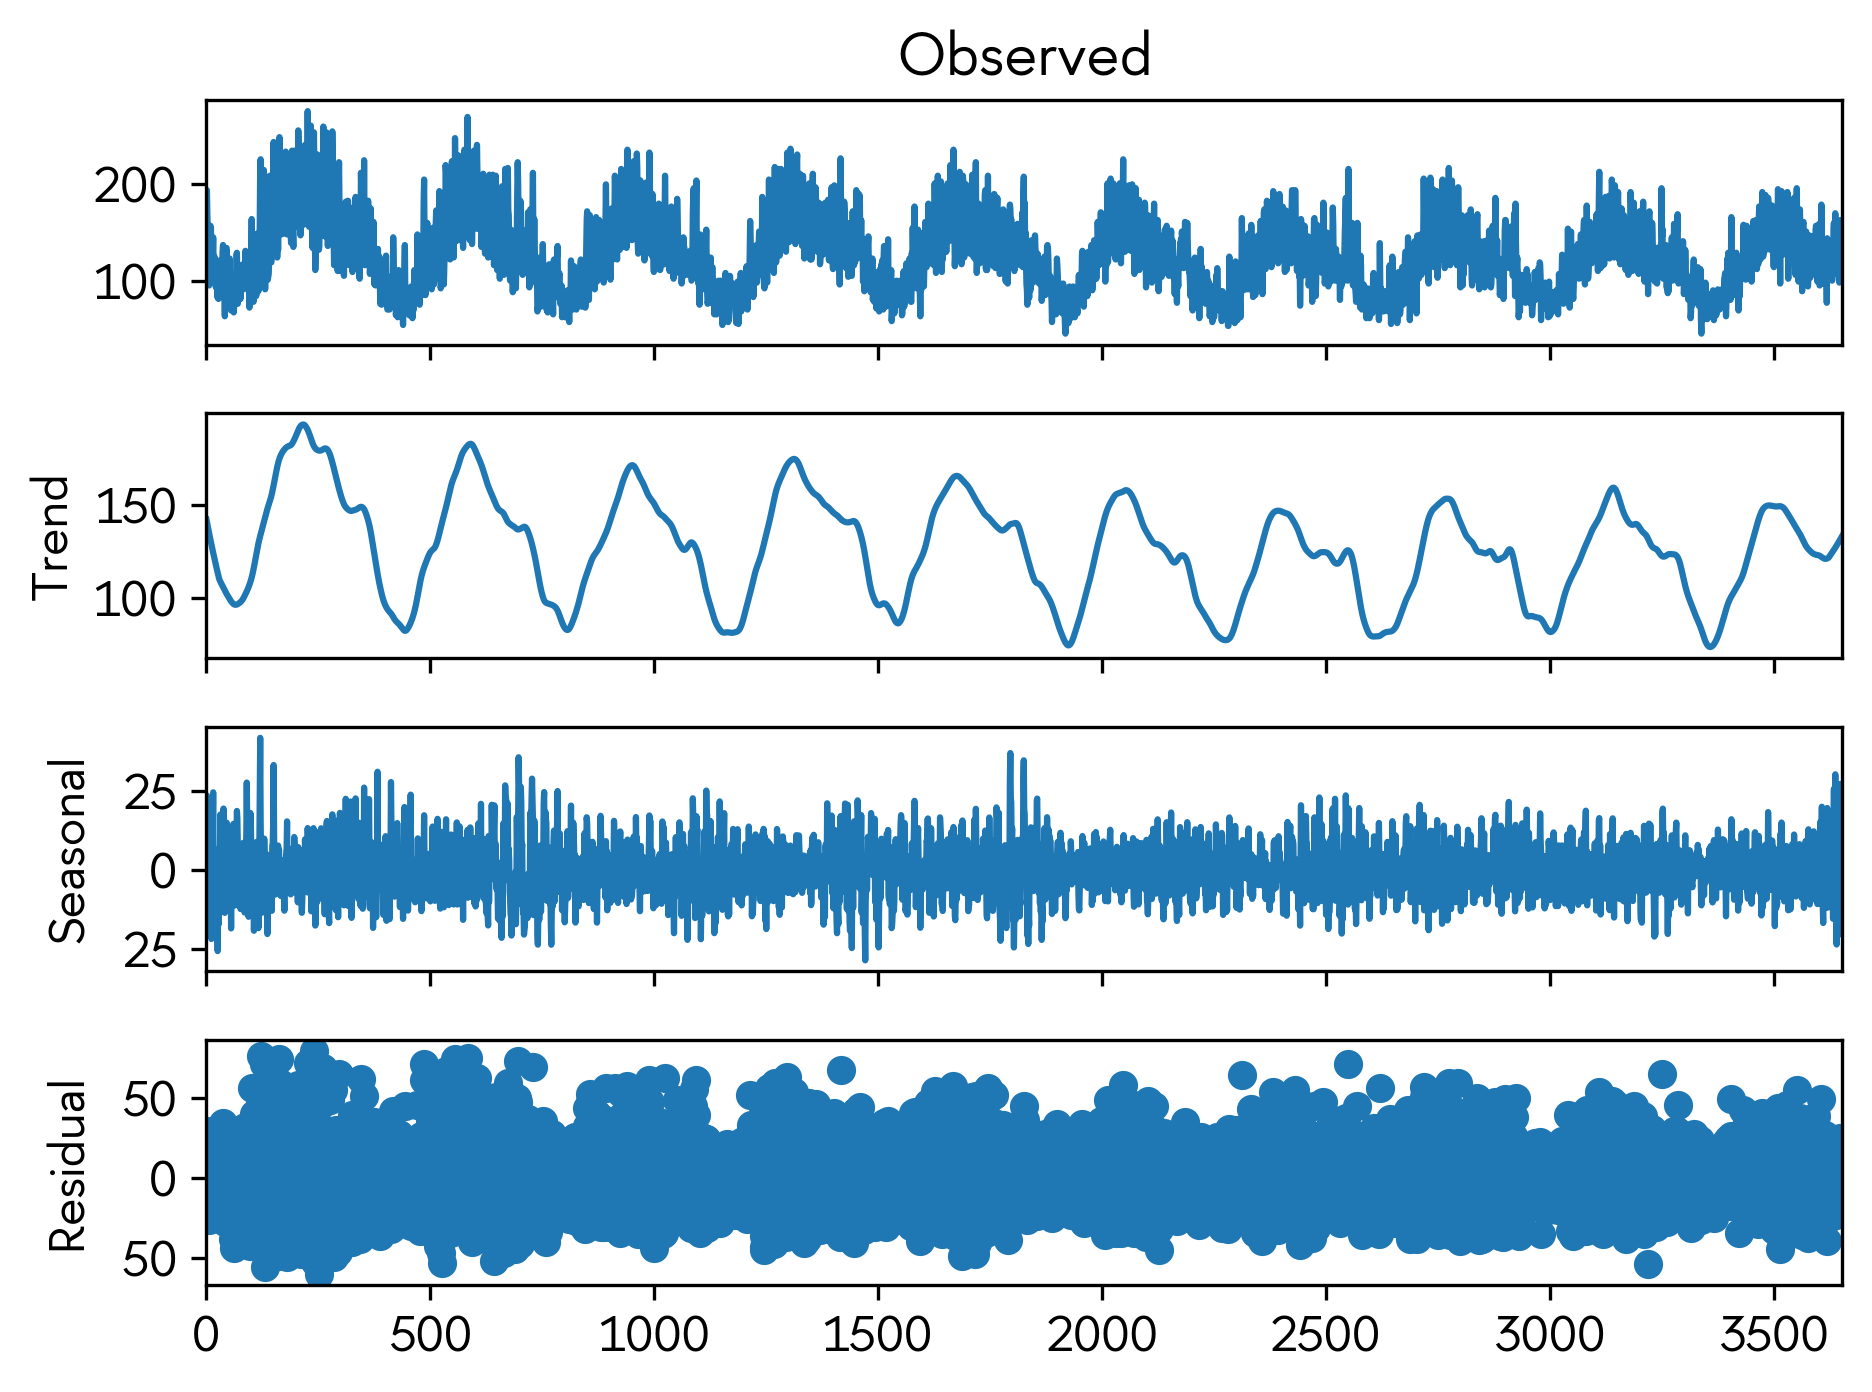

/Users/aleksejgavrikov/dtp_analisys/venv/lib/python3.11/site-packages/IPython/core/events.py:96: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HSE Sans.
  func(*args, **kwargs)


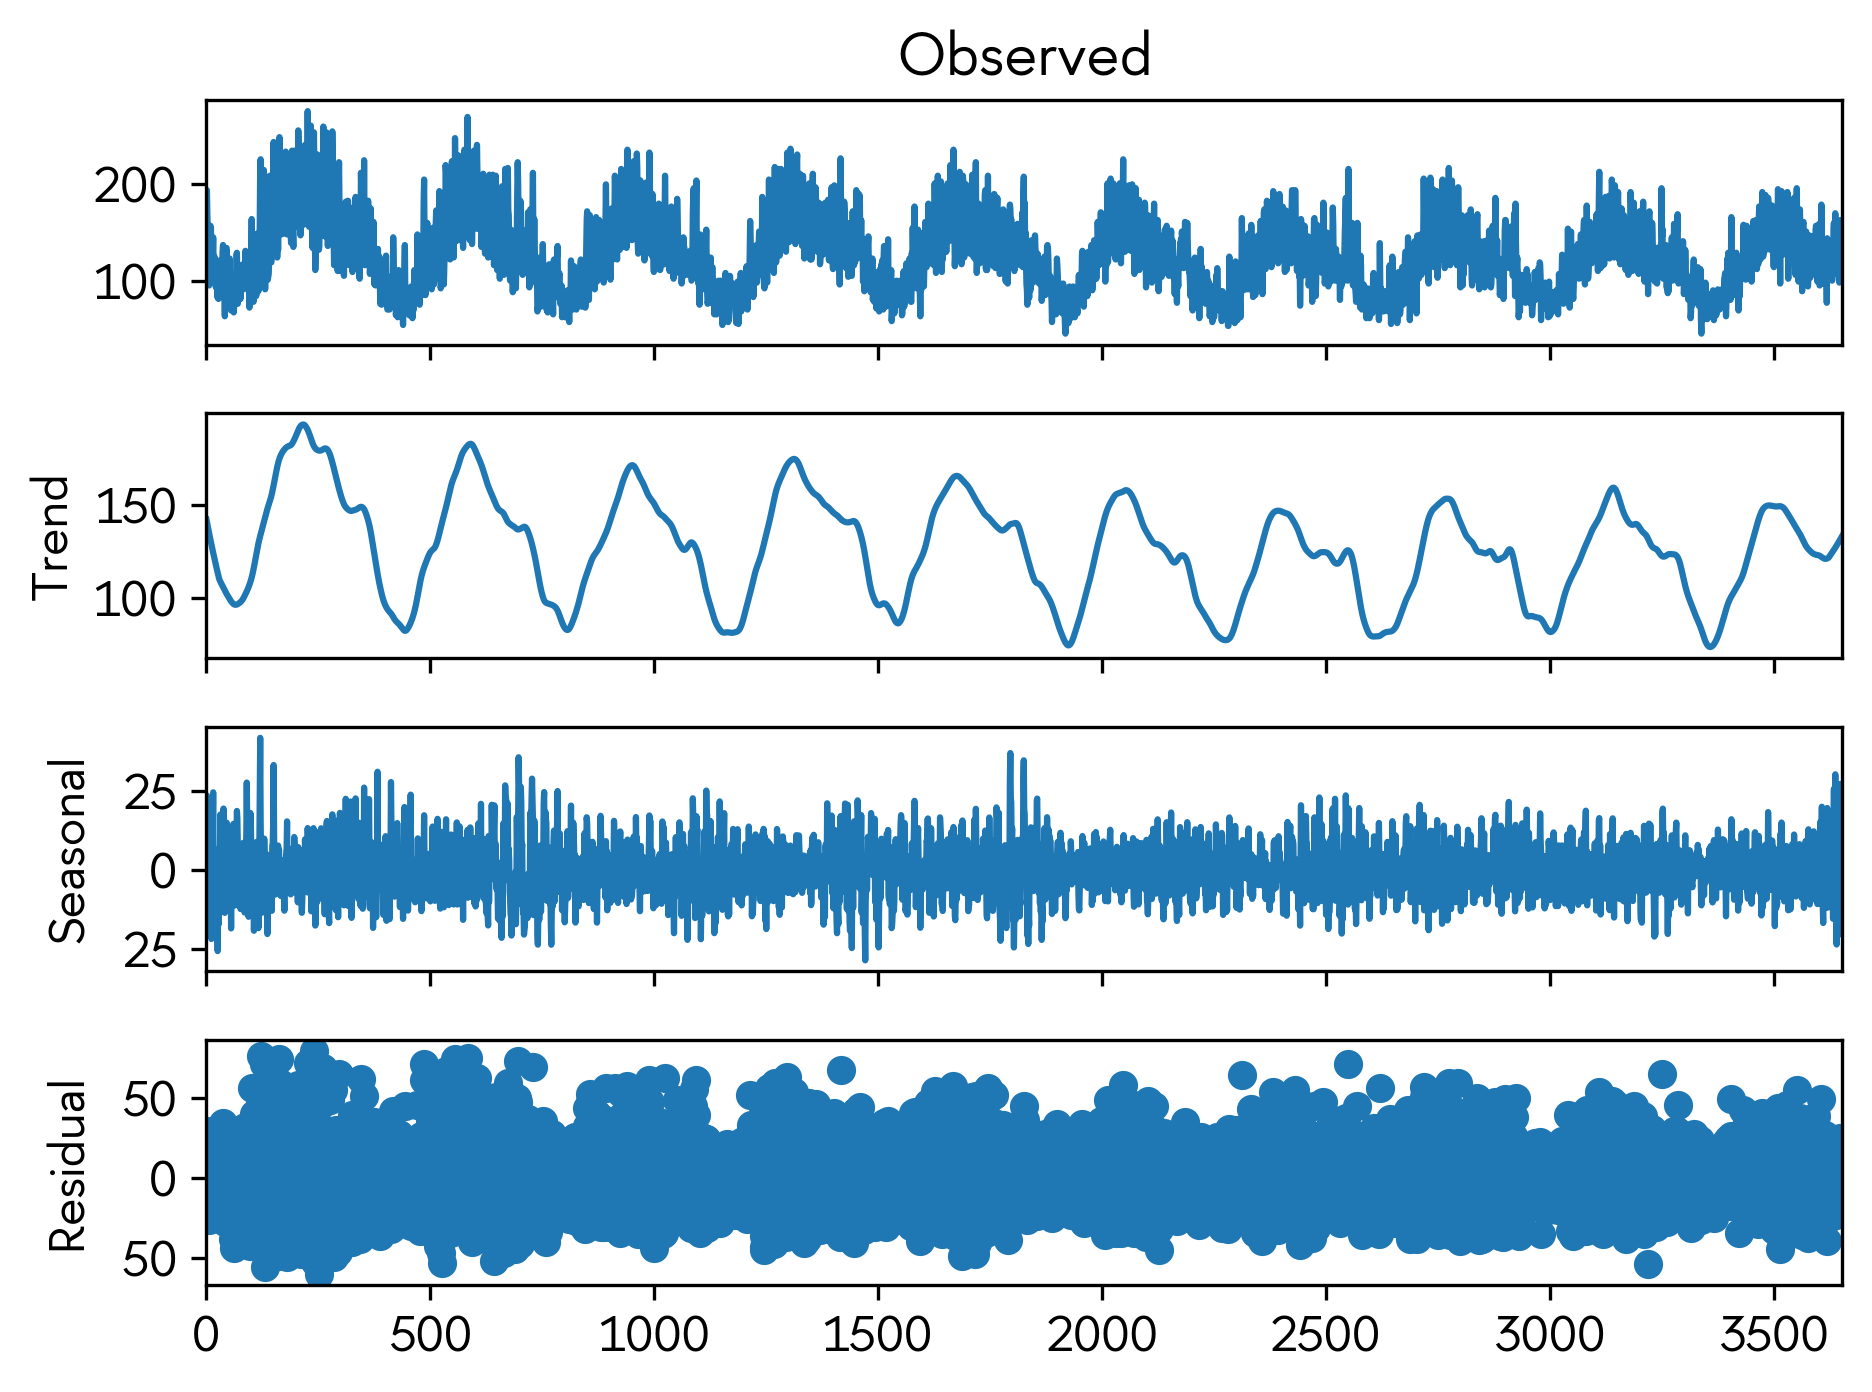

In [20]:
day = df.value_counts('date').sort_index()
from statsmodels.tsa.seasonal import STL


stl = STL(day.values, period=30)
res = stl.fit()
res.plot()

In [21]:
#df = df[df['impaired_driving'] == 1]

In [22]:
import folium

# Получаем 3 самых популярных типа дорог
top_3_roads = df['road_rank_cat'].value_counts().nlargest(3).index.tolist()

# Создаем карту с базовым слоем "CartoDB positron"
m = folium.Map(
    location=[df['coord_w'].mean(), df['coord_l'].mean()],  # Обратите внимание на порядок: lat, lon
    zoom_start=11,
    tiles='CartoDB positron',  # Светлая основа для быстрой загрузки
    control_scale=True
)

# Добавляем слой спутниковых снимков Google
google_satellite = folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
    attr='Google Satellite',
    name='Google Спутник',
    overlay=False
).add_to(m)

# Цвета для слоев
colors = ['#93E9BE', '#E9BEE0', '#000000']

# Добавляем каждую дорогу как отдельный слой FeatureGroup
for i, road_type in enumerate(top_3_roads):
    road_data = df[df['road_rank_cat'] == road_type]
    
    # Уменьшение выборки для производительности
    if len(road_data) > 1000:
        road_data = road_data.sample(n=1000, random_state=42)
    
    # Создаем короткое имя
    short_name = road_type.split('(')[0].strip() if '(' in road_type else road_type
    
    # Создаем FeatureGroup
    fg = folium.FeatureGroup(name=f"{short_name} ({len(road_data)})", show=(i==0))  # Первый слой виден
    
    # Добавляем маркеры
    for idx, row in road_data.iterrows():
        folium.CircleMarker(
            location=[row['coord_w'], row['coord_l']],  # Порядок: lat, lon
            radius=3,
            color=colors[i],
            fill=True,
            fill_color=colors[i],
            fill_opacity=0.7,
            popup=f"<b>Тип:</b> {short_name}<br><b>Координаты:</b> {row['coord_l']:.4f}, {row['coord_w']:.4f}"
        ).add_to(fg)
    
    fg.add_to(m)

# Добавляем контроль слоев
folium.LayerControl(collapsed=False).add_to(m)

# Сохраняем
m.save('simple_road_map_satellite.html')
print("✅ Карта со спутниковым слоем сохранена как: simple_road_map_satellite.html")

✅ Карта со спутниковым слоем сохранена как: simple_road_map_satellite.html


Шрифт 'HSE Sans' установлен


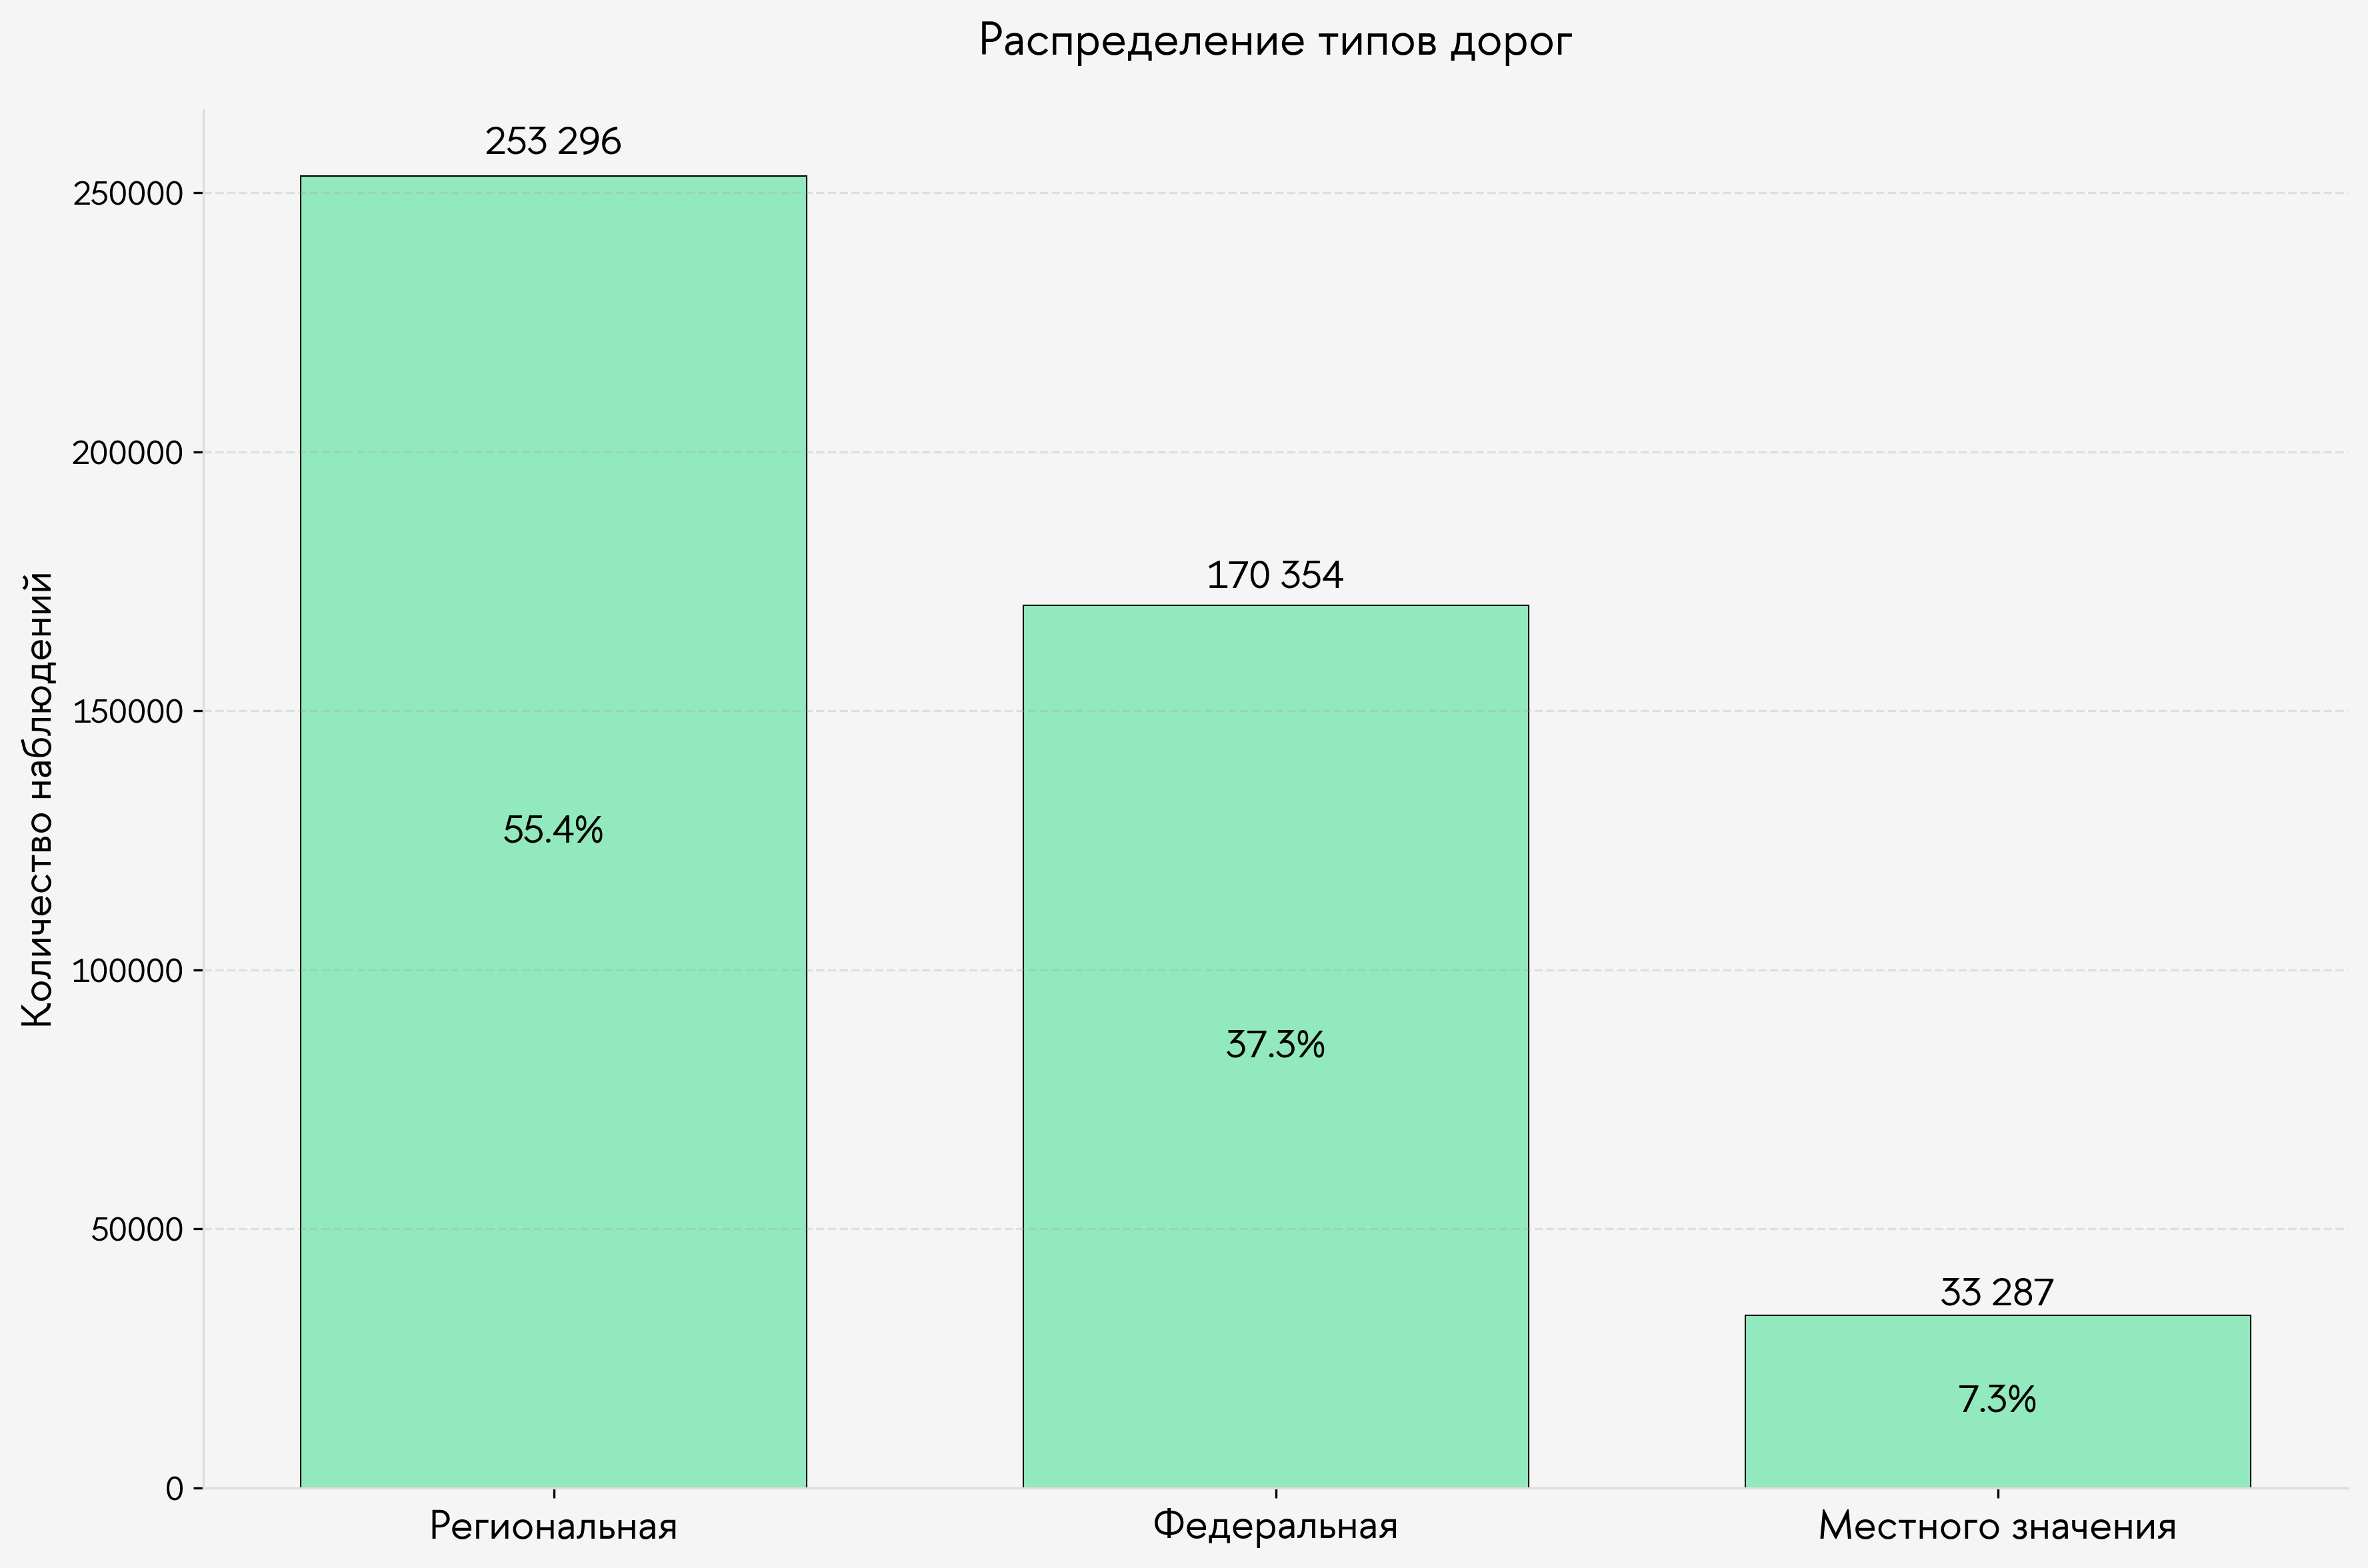

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from pathlib import Path

# Установка шрифта HSE Sans
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()

if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name
    print(f"Шрифт '{font_name}' установлен")
else:
    print("Шрифт HSE Sans не найден, используется системный")

# Получение данных
value_counts = df['road_rank_cat'].value_counts().nlargest(3)

# Рассчитываем проценты
total = value_counts.sum()
percentages = (value_counts.values / total * 100).round(1)

# СОЗДАЕМ КОРОТКИЕ НАЗВАНИЯ (только до скобки '(')
short_names = []
for name in value_counts.index:
    if '(' in name:
        short_name = name.split('(')[0].strip()
        if short_name == 'Региональная или межмуниципальная':
            short_name = 'Региональная'
    else:
        short_name = name
    short_names.append(short_name)

# СОЗДАЕМ ВЕРТИКАЛЬНЫЙ BAR PLOT (столбцы вверх)
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#F5F5F5')  # фон фигуры
ax.set_facecolor('#F5F5F5')  # фон графика

# Создание bar plot - ВСЕ столбцы ОДНИМ цветом (#93E9BE - светлозеленый)
bars = ax.bar(
    short_names,  # используем короткие названия напрямую
    value_counts.values,  # высоты столбцов
    color='#93E9BE',  # Все столбцы одним цветом
    width=0.7,
    edgecolor='#000000',  # черная обводка для контраста
    linewidth=0.5
)

# Настройки внешнего вида
ax.set_ylabel('Количество наблюдений', fontsize=15)
ax.set_title('Распределение типов дорог', fontsize=17, fontweight='bold', pad=20)

# Поворачиваем подписи для лучшей читаемости
plt.xticks(rotation=0, fontsize=15)

# Убираем рамку
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# Добавляем вертикальную сетку
ax.grid(axis='y', linestyle='--', alpha=0.3, color='#AAAAAA')

# ДОБАВЛЯЕМ ПРОЦЕНТЫ ВНУТРИ СТОЛБЦОВ (в центре)
for i, bar in enumerate(bars):
    height = bar.get_height()
    percent = percentages[i]
    
    # Процент ВНУТРИ столбца в центре
    if i <= 2:
        ax.text(bar.get_x() + bar.get_width()/2,
            height / 2,  # РОВНО ПО ЦЕНТРУ столбца
            f'{percent}%',
            ha='center',
            va='center',
            fontsize=14,
            fontweight='bold',
            color='black')  # белый цвет для контраста на зеленом фоне
    
    # Количество НАД столбцом
    ax.text(bar.get_x() + bar.get_width()/2,
            height + height * 0.01,  # немного выше столбца
            f'{int(height):,}'.replace(',', ' '),
            ha='center',
            va='bottom',
            fontsize=14,
            fontweight='medium')

# Устанавливаем отступ
plt.tight_layout()

# Показываем график
plt.show()

In [24]:
df['road_rank_cat'].value_counts().nlargest(3).sum()

np.int64(456937)

In [25]:
df.shape

(461425, 97)

In [26]:
round((1 - 456937/461425) * 100, 4)

0.9726

In [27]:
df.columns

Index(['unnamed:_0', 'region', 'date', 'coord_l', 'coord_w', 'road_name',
       'road_category', 'n_vehicles', 'n_participants', 'n_deaths',
       'n_injured', 'vehicle_failure', 'non_private_vehicle', 'white_vehicle',
       'black_vehicle', 'colored_vehicle', 'drunk_driver', 'female_driver',
       'escaped', 'no_seatbelt_injury', 'n_drunk', 'n_children', 'n_cyclists',
       'vehicle_age_min', 'vehicle_age_max', 'vehicle_age_avg', 'n_class_a',
       'n_class_b', 'n_class_c', 'n_class_d', 'n_class_e', 'n_class_s',
       'n_front_drive', 'n_rear_drive', 'n_4wd', 'n_guilty', 'guilty_share',
       'n_fatal_violations', 'guilty_exp_avg', 'exp_avg', 'road_rank_cat',
       'road_defects_cat', 'traffic_changes_bin', 'traffic_changes_cat',
       'road_surface_cat', 'type_cat', 'out_of_town', 'street_rank_cat',
       'weather_interpretable', 'weather_cat', 'adj_objects_interpretable',
       'adj_objects_cat', 'cause_factors_cat', 'crossing_violation',
       'impaired_driving', 'inte

Шрифт 'HSE Sans' установлен, размер 16
Используем колонку с датой: 'date'
Анализ по 120 месяцам:
Средняя доля пьяных: 24.55%
Минимальная доля: 2.63%
Максимальная доля: 97.49%


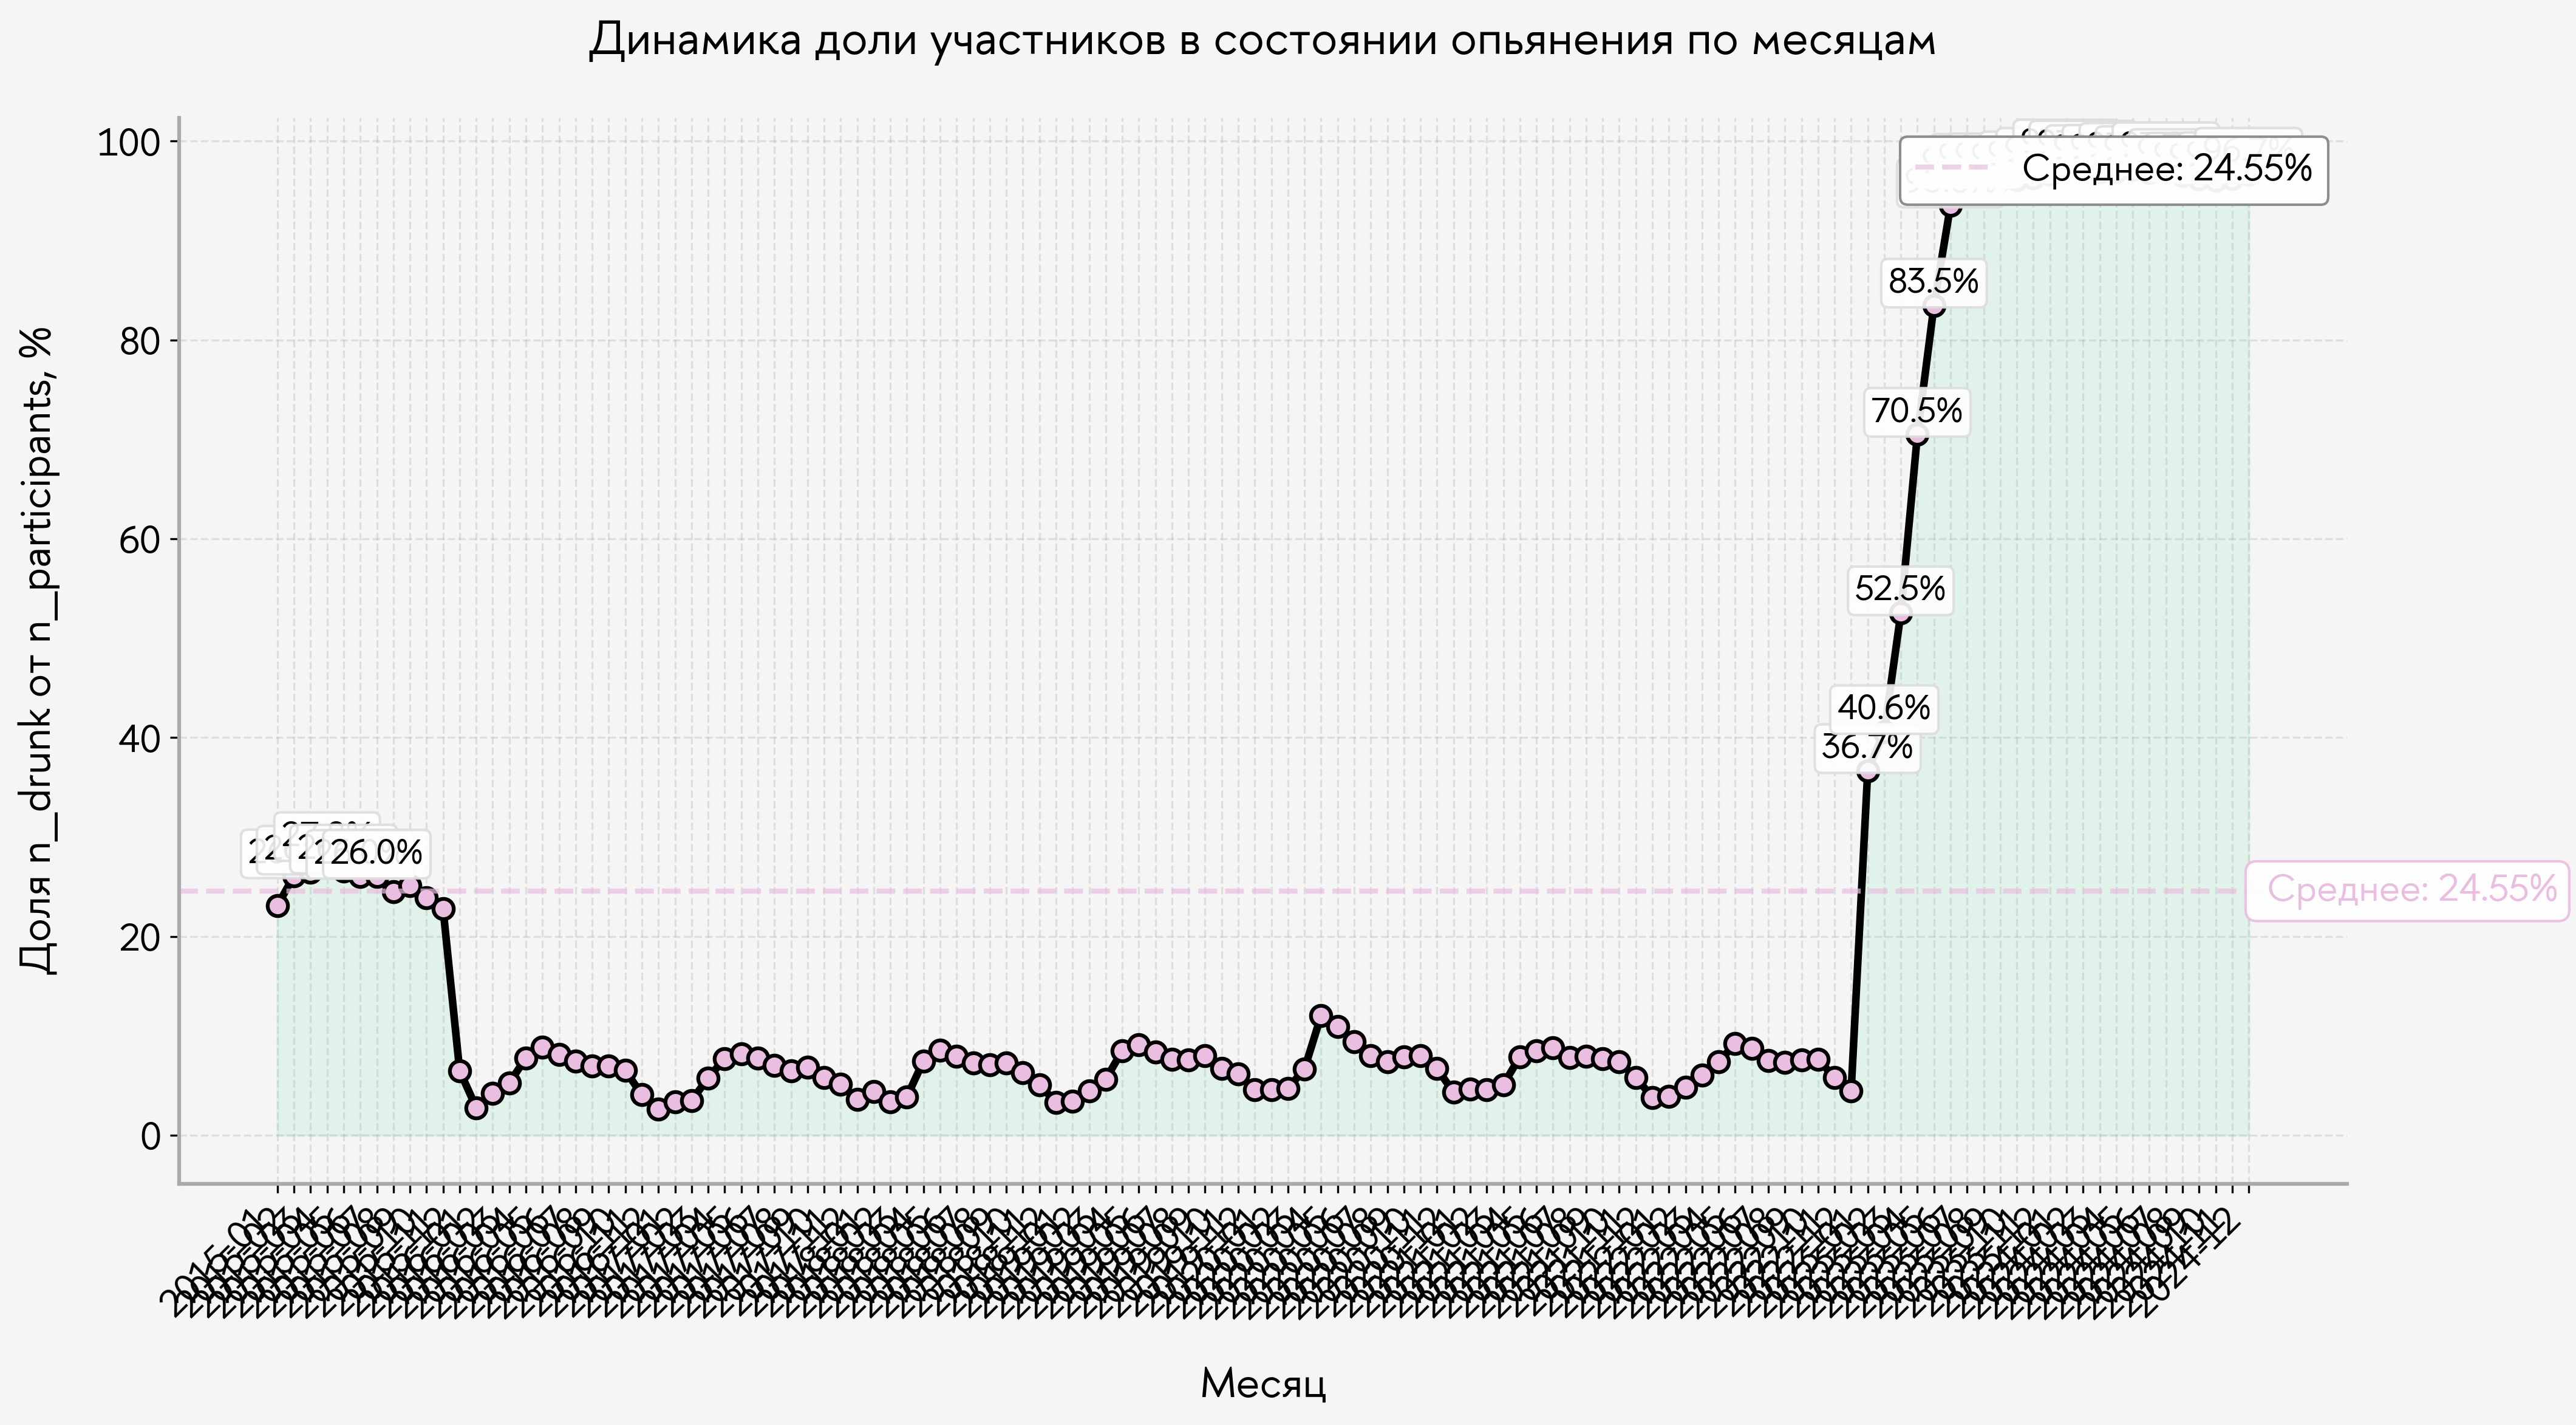


ДАННЫЕ ПО МЕСЯЦАМ:
Месяц           n_drunk      n_participants  Доля, %   
--------------------------------------------------------------------------------
2015-01         2 528        10 936          23.12     
2015-02         2 039        7 820           26.07     
2015-03         2 064        7 805           26.44     
2015-04         2 261        8 131           27.81     
2015-05         3 085        11 617          26.56     
2015-06         3 432        13 188          26.02     
2015-07         3 844        14 762          26.04     
2015-08         3 851        15 716          24.50     
2015-09         3 370        13 427          25.10     
2015-10         3 129        13 110          23.87     
2015-11         2 596        11 395          22.78     
2015-12         817          12 600          6.48      
2016-01         275          9 935           2.77      
2016-02         305          7 298           4.18      
2016-03         354          6 718           5.27      
201

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from pathlib import Path

# Установка шрифта HSE Sans
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()

if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.size'] = 16  # Устанавливаем базовый размер шрифта 16
    print(f"Шрифт '{font_name}' установлен, размер 16")
else:
    print("Шрифт HSE Sans не найден, используется системный")
    plt.rcParams['font.size'] = 16

# Проверяем наличие нужных колонок
required_cols = ['n_drunk', 'n_participants']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"ОШИБКА: Отсутствуют колонки: {missing_cols}")
    print(f"Доступные колонки: {list(df.columns)}")
else:
    # Находим колонку с датой
    date_columns = ['date', 'DATE', 'Date', 'дата', 'Дата', 'timestamp', 'Timestamp', 'время', 'Время']
    date_col = None
    for col in date_columns:
        if col in df.columns:
            date_col = col
            break
    
    if not date_col:
        print("ОШИБКА: Колонка с датой не найдена")
    else:
        print(f"Используем колонку с датой: '{date_col}'")
        
        # Преобразуем дату
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        
        # Добавляем месяц и год
        df['year_month'] = df[date_col].dt.to_period('M')
        
        # Группируем по месяцам
        monthly_stats = df.groupby('year_month').agg({
            'n_drunk': 'sum',
            'n_participants': 'sum'
        }).reset_index()
        
        # Рассчитываем долю
        monthly_stats['drunk_ratio'] = (monthly_stats['n_drunk'] / monthly_stats['n_participants']) * 100
        
        # Преобразуем период в строку для отображения
        monthly_stats['year_month_str'] = monthly_stats['year_month'].astype(str)
        
        print(f"Анализ по {len(monthly_stats)} месяцам:")
        print(f"Средняя доля пьяных: {monthly_stats['drunk_ratio'].mean():.2f}%")
        print(f"Минимальная доля: {monthly_stats['drunk_ratio'].min():.2f}%")
        print(f"Максимальная доля: {monthly_stats['drunk_ratio'].max():.2f}%")
        
        # СОЗДАЕМ ГРАФИК
        fig, ax = plt.subplots(figsize=(16, 9))
        fig.patch.set_facecolor('#F5F5F5')
        ax.set_facecolor('#F5F5F5')
        
        # Линейный график
        line = ax.plot(monthly_stats['year_month_str'], monthly_stats['drunk_ratio'],
                      color='#000000',  # Черная линия для контраста
                      linewidth=3,
                      marker='o',
                      markersize=8,
                      markerfacecolor='#E9BEE0',  # Розовые точки
                      markeredgecolor='#000000',
                      markeredgewidth=1.5)
        
        # Заполнение под линией
        ax.fill_between(range(len(monthly_stats)), monthly_stats['drunk_ratio'],
                       alpha=0.2, color='#93E9BE')  # Зеленое заполнение
        
        # НАСТРОЙКИ С БОЛЬШИМ ШРИФТОМ
        ax.set_xlabel('Месяц', fontsize=17, fontweight='bold', labelpad=15)
        ax.set_ylabel('Доля n_drunk от n_participants, %', fontsize=17, fontweight='bold', labelpad=15)
        ax.set_title('Динамика доли участников в состоянии опьянения по месяцам',
                    fontsize=19, fontweight='bold', pad=25)
        
        # Поворачиваем подписи месяцев для читаемости
        plt.xticks(rotation=45, ha='right', fontsize=15)
        plt.yticks(fontsize=15)
        
        # Убираем рамку
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        ax.spines['left'].set_color('#AAAAAA')
        ax.spines['bottom'].set_color('#AAAAAA')
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        
        # Сетка
        ax.grid(True, linestyle='--', alpha=0.3, color='#AAAAAA')
        
        # Добавляем линию среднего
        mean_ratio = monthly_stats['drunk_ratio'].mean()
        ax.axhline(y=mean_ratio, color='#E9BEE0', linestyle='--',
                  linewidth=2, alpha=0.7,
                  label=f'Среднее: {mean_ratio:.2f}%')
        
        # Добавляем подпись для линии среднего
        ax.text(len(monthly_stats)-0.5, mean_ratio,
                f' Среднее: {mean_ratio:.2f}%',
                fontsize=15, color='#E9BEE0', fontweight='bold',
                va='center', ha='left', backgroundcolor='white',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                         alpha=0.9, edgecolor='#E9BEE0'))
        
        # Добавляем значения на точки (для самых высоких значений)
        threshold = monthly_stats['drunk_ratio'].quantile(0.75)  # Верхние 25%
        for i, (date_str, ratio) in enumerate(zip(monthly_stats['year_month_str'], monthly_stats['drunk_ratio'])):
            if ratio > threshold:
                ax.text(i, ratio + 0.5,  # Немного выше точки
                       f'{ratio:.1f}%',
                       ha='center',
                       va='bottom',
                       fontsize=14,
                       fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white',
                                alpha=0.9, edgecolor='#DDDDDD'))
        
        # Легенда
        ax.legend(loc='upper right', fontsize=15, frameon=True,
                 framealpha=0.95, edgecolor='#888888', facecolor='white')
        
        # Автоматическая настройка layout для больших подписей
        plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
        
        plt.show()
        
        # Выводим таблицу с данными
        print("\n" + "="*80)
        print("ДАННЫЕ ПО МЕСЯЦАМ:")
        print("="*80)
        print(f"{'Месяц':<15} {'n_drunk':<12} {'n_participants':<15} {'Доля, %':<10}")
        print("-"*80)
        
        for _, row in monthly_stats.iterrows():
            print(f"{row['year_month_str']:<15} {row['n_drunk']:<12,} {row['n_participants']:<15,} {row['drunk_ratio']:<10.2f}".replace(',', ' '))
        
        print("="*80)

Шрифт 'HSE Sans' установлен, размер 16


/var/folders/nv/y1xwhy_x1gx4gn0wks7mdjqc0000gn/T/ipykernel_81468/2561797471.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  quarterly_stats['date_dt'] = pd.to_datetime(quarterly_stats['quarter_str'])


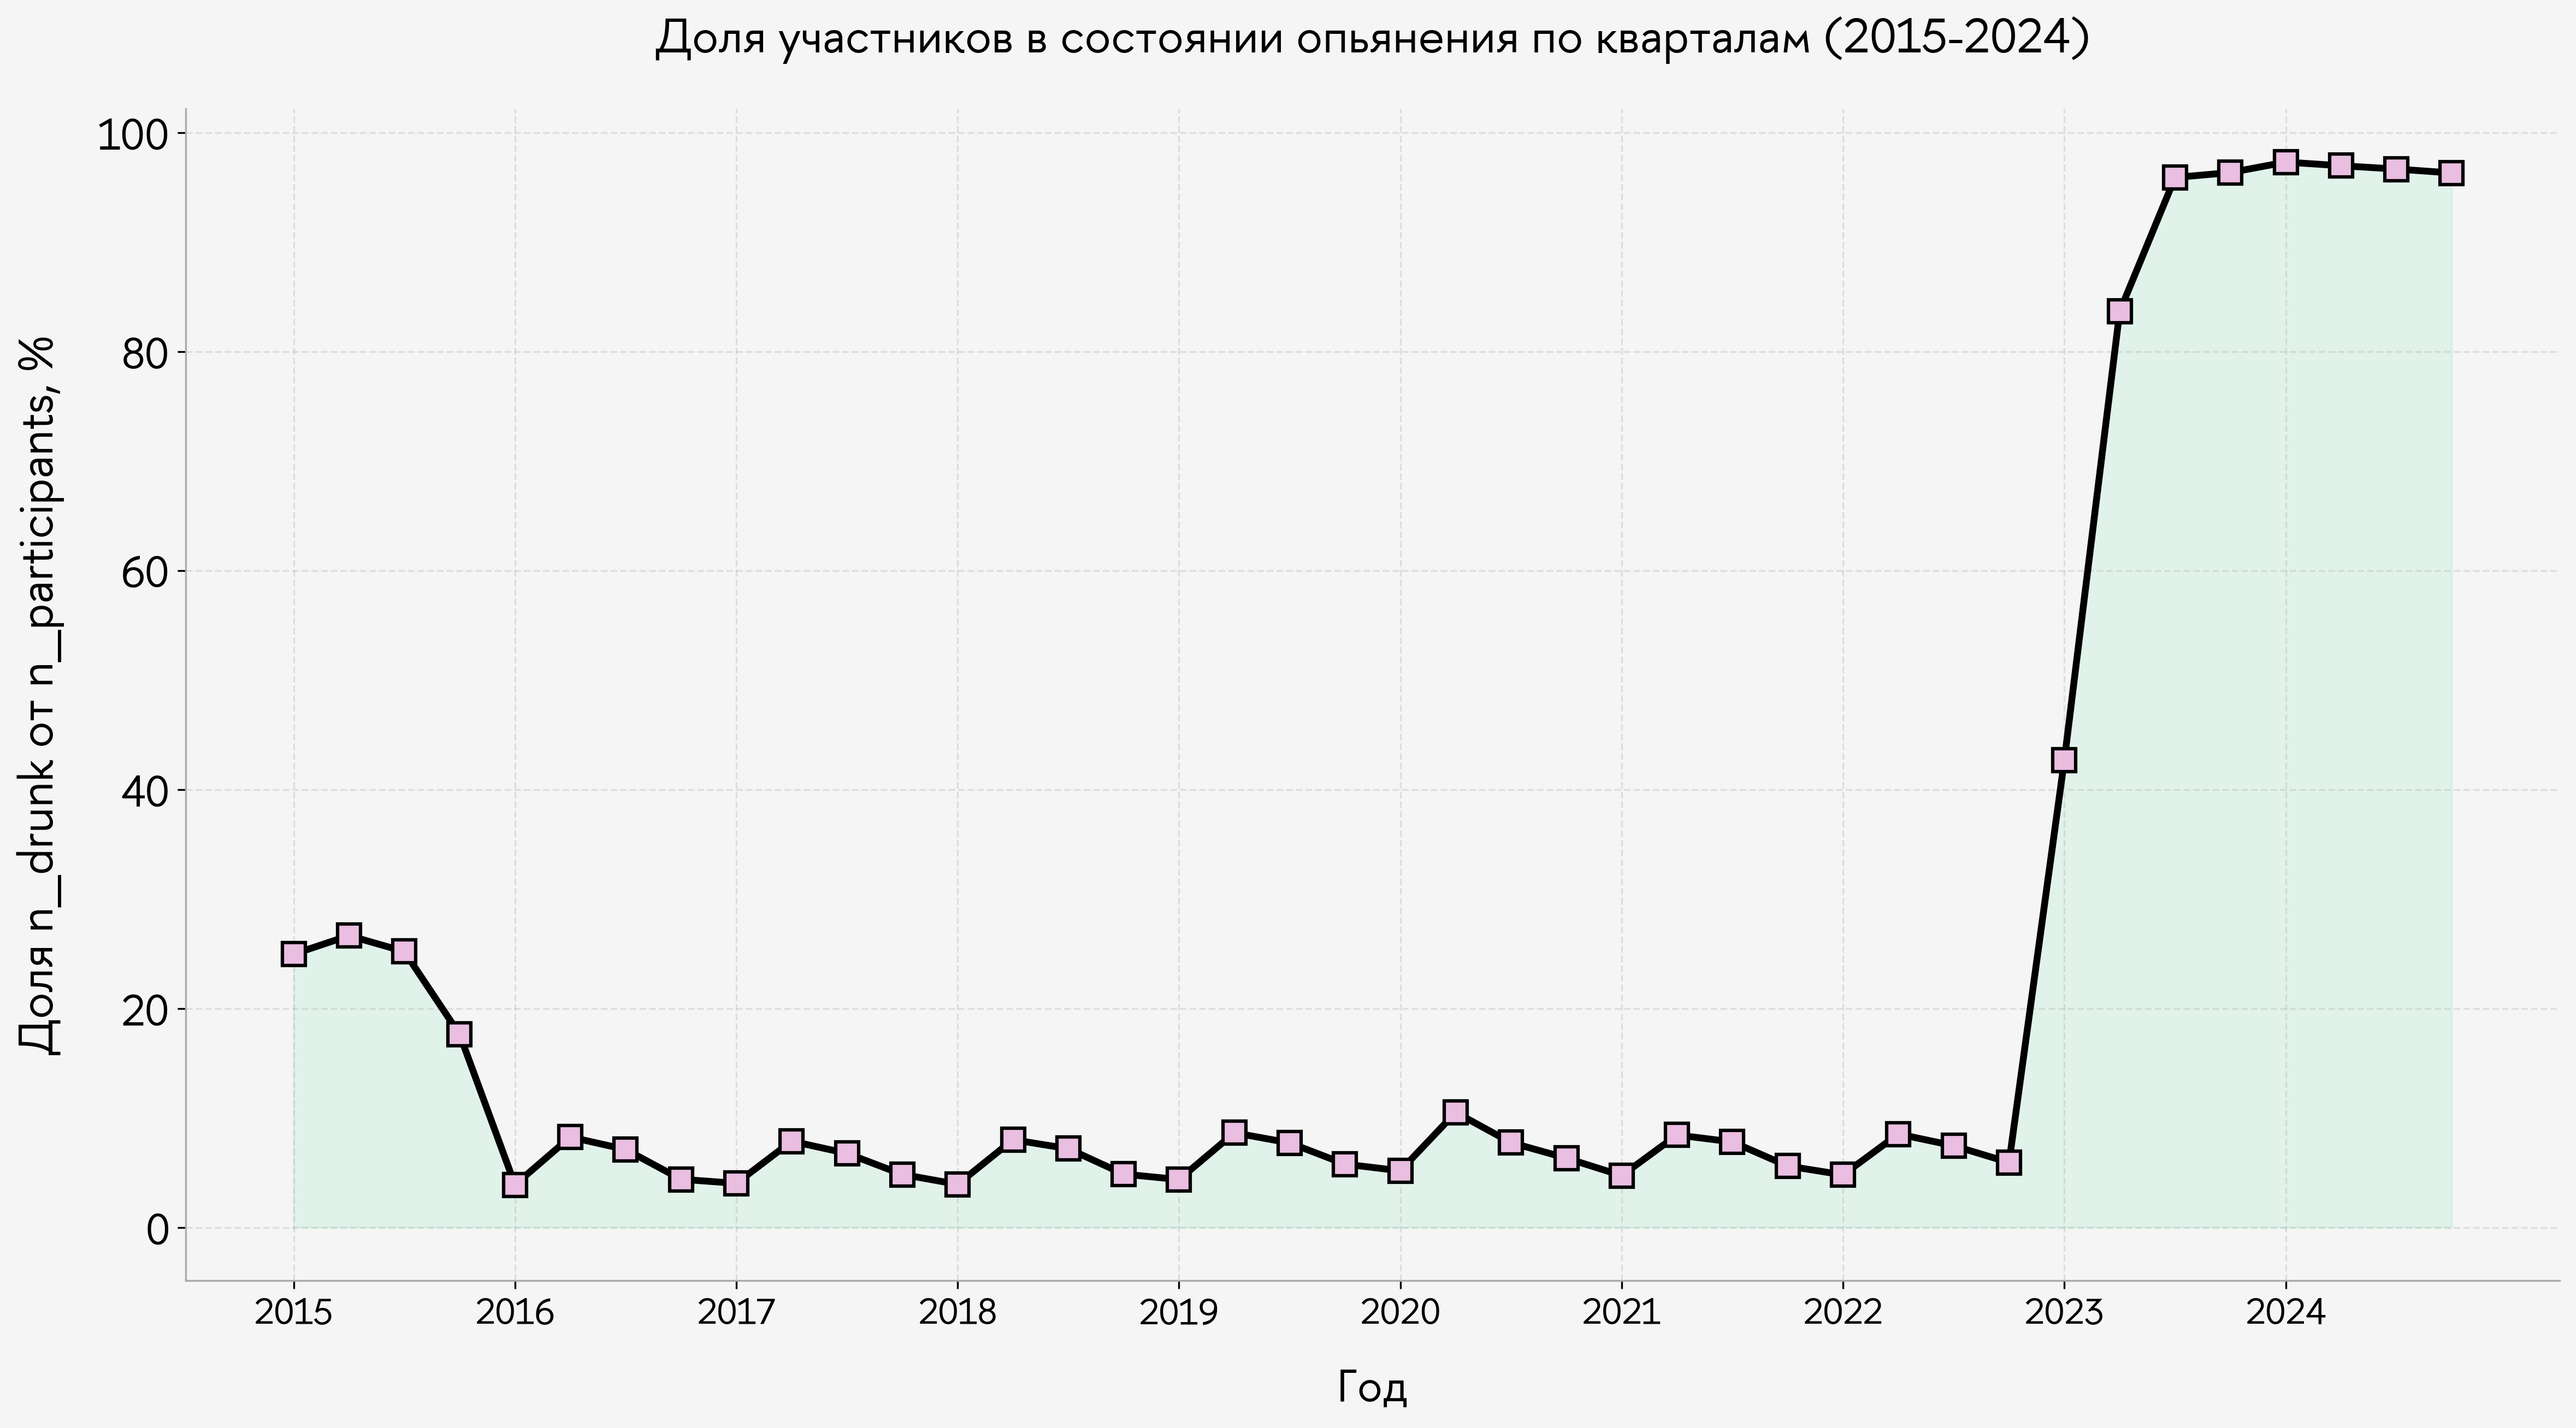

In [29]:
# ВАРИАНТ С ГРУППИРОВКОЙ ПО КВАРТАЛАМ (меньше точек)
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()

if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.size'] = 16  # Устанавливаем базовый размер шрифта 16
    print(f"Шрифт '{font_name}' установлен, размер 16")
else:
    print("Шрифт HSE Sans не найден, используется системный")
    plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

# Группируем по кварталам
df['quarter'] = df[date_col].dt.to_period('Q')
quarterly_stats = df.groupby('quarter').agg({
    'n_drunk': 'sum',
    'n_participants': 'sum'
}).reset_index()

quarterly_stats['drunk_ratio'] = (quarterly_stats['n_drunk'] / quarterly_stats['n_participants']) * 100
quarterly_stats['quarter_str'] = quarterly_stats['quarter'].astype(str)

# Сортируем
quarterly_stats['date_dt'] = pd.to_datetime(quarterly_stats['quarter_str'])
quarterly_stats = quarterly_stats.sort_values('date_dt')

# Линейный график по кварталам
quarterly_stats = quarterly_stats.sort_values('quarter_str')
ax.plot(range(len(quarterly_stats)), quarterly_stats['drunk_ratio'],
        color='#000000',
        linewidth=3,
        marker='s',  # Квадратные маркеры
        markersize=10,
        markerfacecolor='#E9BEE0',
        markeredgecolor='#000000',
        markeredgewidth=1.5)

# Заполнение
ax.fill_between(range(len(quarterly_stats)), quarterly_stats['drunk_ratio'],
               alpha=0.2, color='#93E9BE')

# Подписи по оси X - только каждый 4-й квартал (раз в год)
n_quarters = len(quarterly_stats)
step = 4  # Показываем каждый год

tick_positions = list(range(0, n_quarters, step))
tick_labels = []

for pos in tick_positions:
    if pos < n_quarters:
        quarter_str = quarterly_stats.iloc[pos]['quarter_str']
        # Извлекаем год из "2020Q1"
        year = quarter_str[:4]
        tick_labels.append(year)

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=0, ha='center', fontsize=16)

# Настройки
ax.set_xlabel('Год', fontsize=20, fontweight='bold', labelpad=15)
ax.set_ylabel('Доля n_drunk от n_participants, %', fontsize=21, fontweight='bold', labelpad=15)
ax.set_title(f'Доля участников в состоянии опьянения по кварталам ({quarterly_stats["date_dt"].min().year}-{quarterly_stats["date_dt"].max().year})',
            fontsize=21, fontweight='bold', pad=25)

plt.yticks(fontsize=19)

# Убираем рамку и добавляем сетку
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_color('#AAAAAA')
ax.spines['bottom'].set_color('#AAAAAA')
ax.grid(True, linestyle='--', alpha=0.3, color='#AAAAAA')

plt.tight_layout()
plt.show()

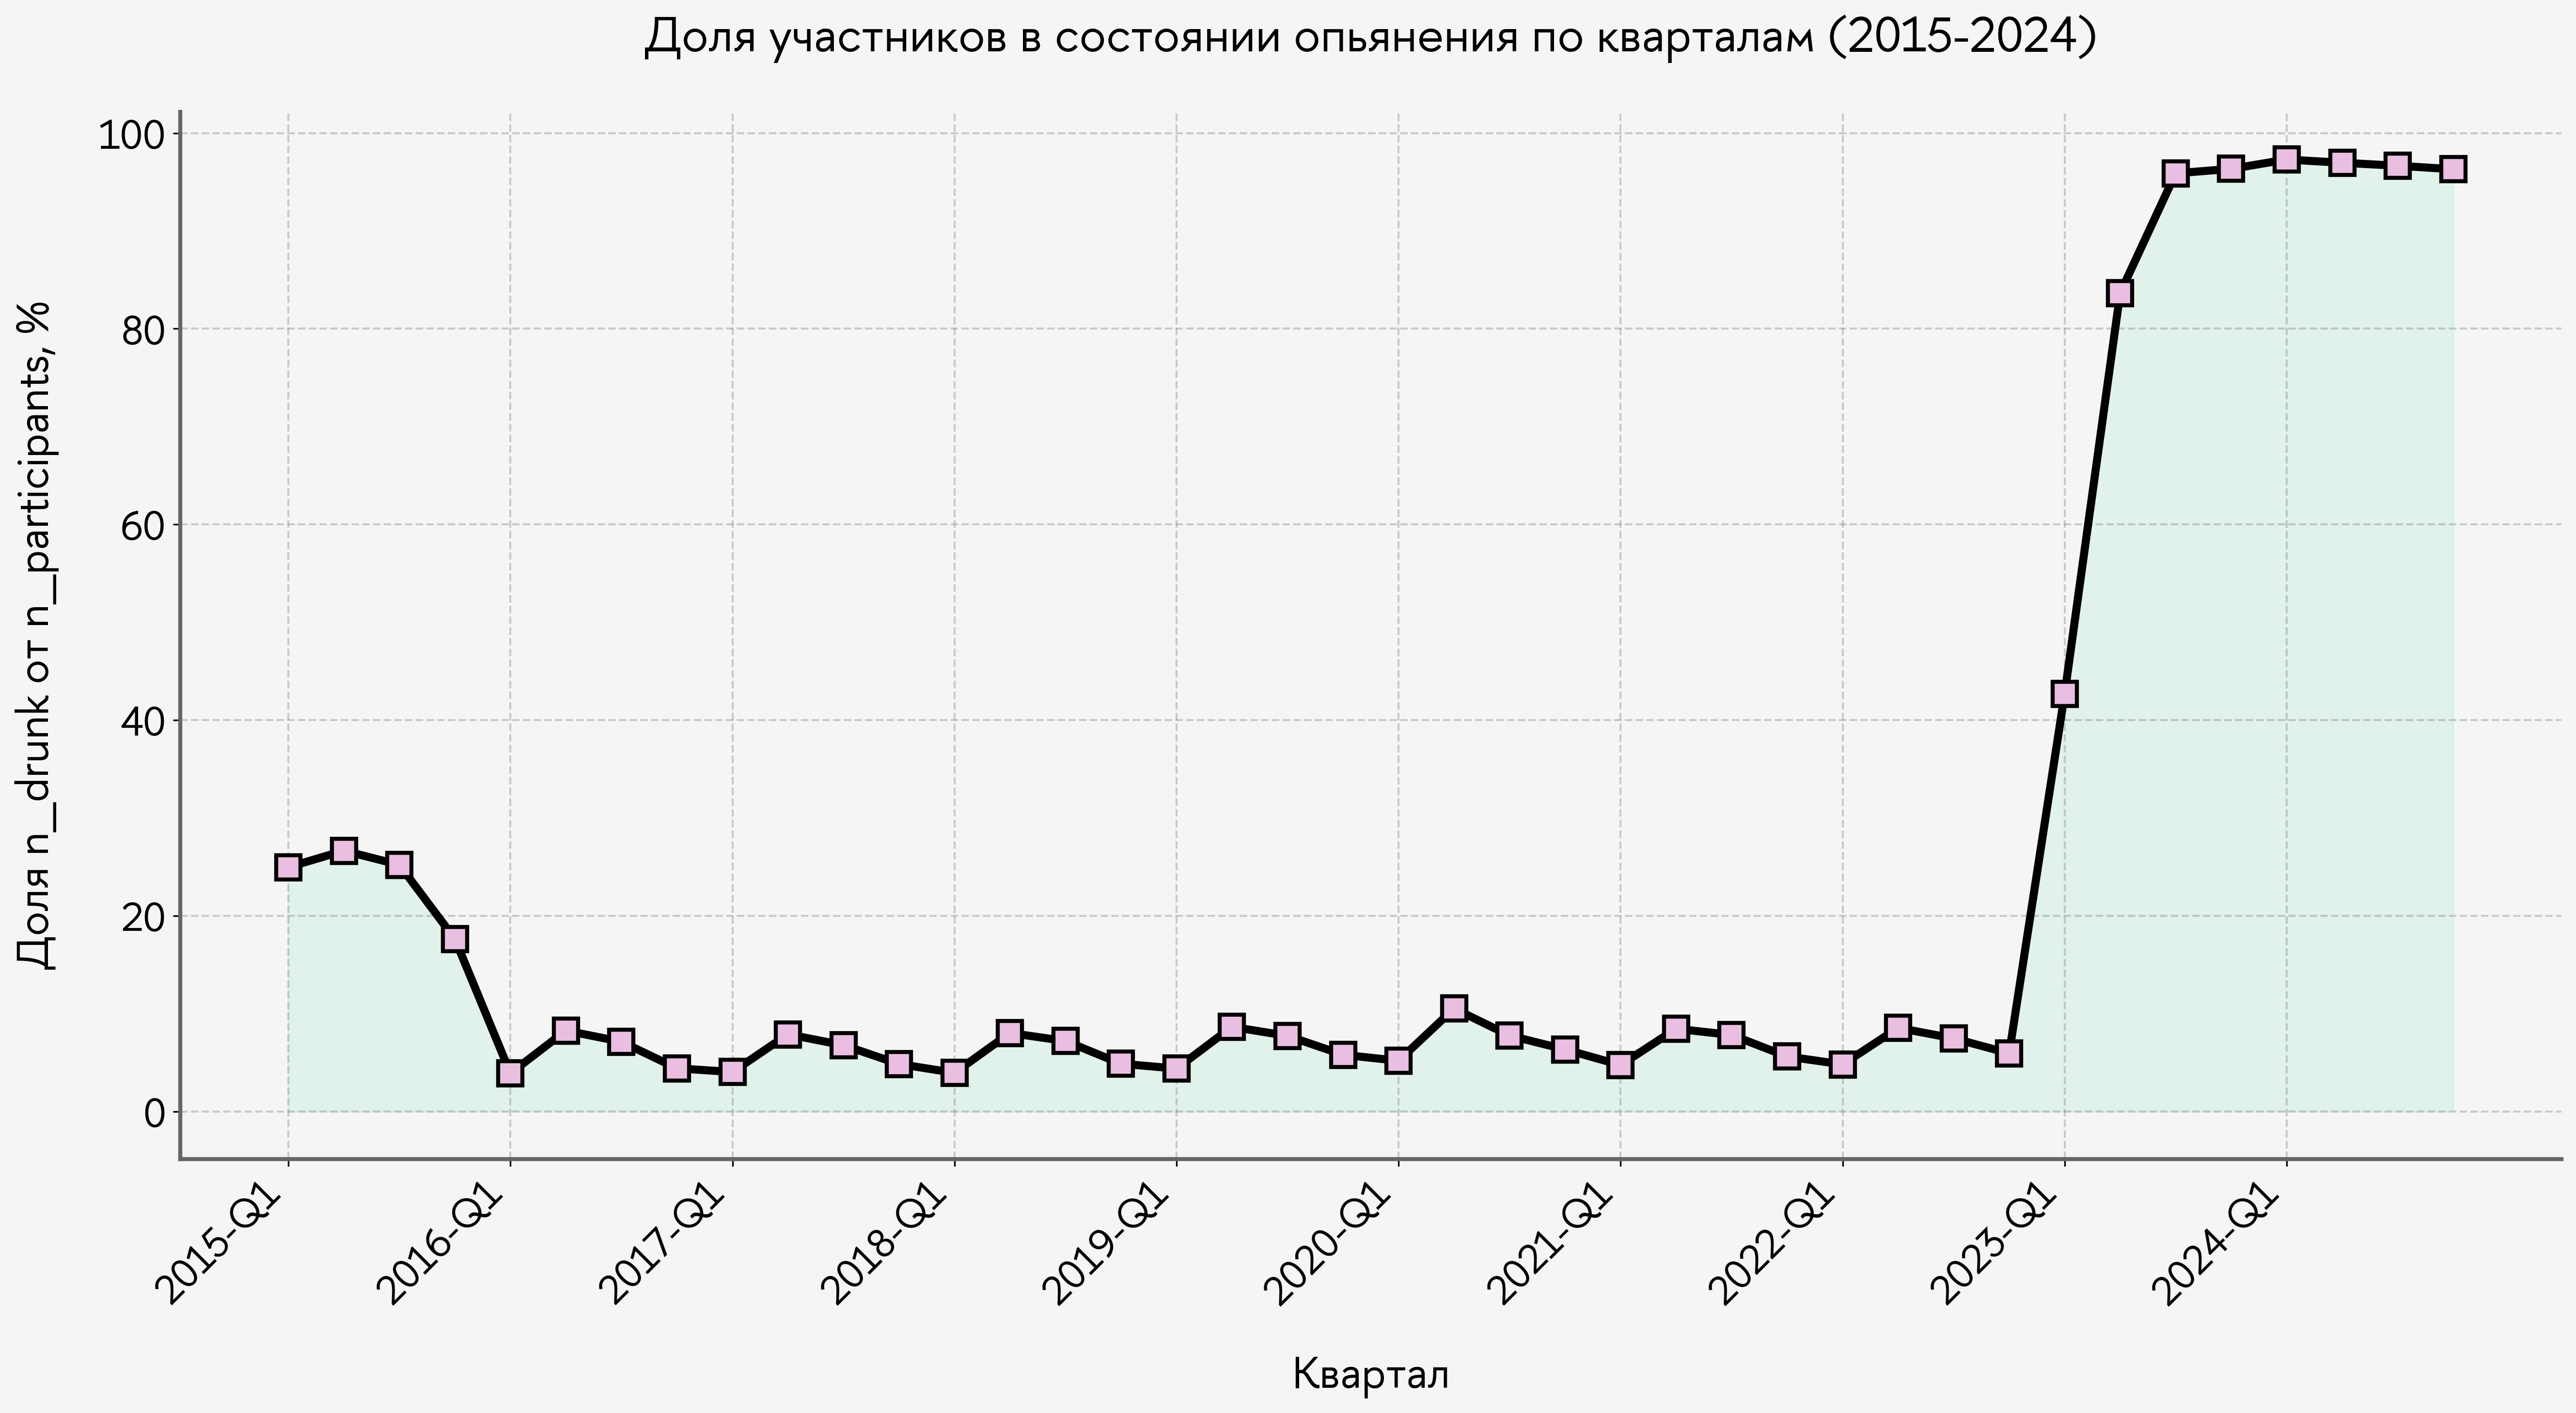

In [30]:
# ВАРИАНТ С ГРУППИРОВКОЙ ПО КВАРТАЛАМ (ЖИРНЫЕ И КРУПНЫЕ ПОДПИСИ)
fig, ax = plt.subplots(figsize=(18, 10))  # Увеличил размер фигуры
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

# Линейный график по кварталам
ax.plot(range(len(quarterly_stats)), quarterly_stats['drunk_ratio'],
        color='#000000',
        linewidth=4,  # Жирнее линия
        marker='s',
        markersize=12,  # Крупнее маркеры
        markerfacecolor='#E9BEE0',
        markeredgecolor='#000000',
        markeredgewidth=2)  # Жирнее обводка маркеров

# Заполнение
ax.fill_between(range(len(quarterly_stats)), quarterly_stats['drunk_ratio'],
               alpha=0.2, color='#93E9BE')

# Подписи по оси X - жирные и крупные
n_quarters = len(quarterly_stats)
step = max(1, n_quarters // 10)  # Показываем примерно 10 подписей

tick_positions = list(range(0, n_quarters, step))
tick_labels = []

for pos in tick_positions:
    if pos < n_quarters:
        quarter_str = quarterly_stats.iloc[pos]['quarter_str']
        # Форматируем как "2020-Q1"
        year = quarter_str[:4]
        quarter_num = quarter_str[-1]
        tick_labels.append(f"{year}-Q{quarter_num}")

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right', fontsize=20, fontweight='bold')  # Шрифт 18, жирный

# НАСТРОЙКИ ОСЕЙ - ОЧЕНЬ КРУПНЫЕ И ЖИРНЫЕ
ax.set_xlabel('Квартал', fontsize=22, fontweight='bold', labelpad=20)  # Шрифт 22
ax.set_ylabel('Доля n_drunk от n_participants, %', fontsize=22, fontweight='bold', labelpad=20)  # Шрифт 22
ax.set_title(f'Доля участников в состоянии опьянения по кварталам ({quarterly_stats["date_dt"].min().year}-{quarterly_stats["date_dt"].max().year})',
            fontsize=24, fontweight='bold', pad=30)  # Шрифт 24

# Шрифт для значений по оси Y
plt.yticks(fontsize=20, fontweight='bold')  # Шрифт 20, жирный

# Убираем рамку и добавляем сетку
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_color('#666666')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_color('#666666')
ax.spines['bottom'].set_linewidth(2)

# Сетка
ax.grid(True, linestyle='--', alpha=0.4, color='#888888', linewidth=1)

# Добавляем линию среднего значения
mean_ratio = quarterly_stats['drunk_ratio'].mean()


# Добавляем значения на точки для максимальных значений
# Находим топ-5 максимальных значений
top_n = min(5, len(quarterly_stats))
sorted_indices = quarterly_stats['drunk_ratio'].sort_values(ascending=False).index[:top_n]



# Легенда - крупная


plt.tight_layout()
plt.show()

In [31]:
df1 = df.copy()

In [32]:
df1['severity3'] = (df1['severity'] == 3).astype(int)

In [33]:
df1['deathsa'] = (df1['n_deaths'] > 0).astype(int)

In [34]:
df1.groupby('severity')['deathsa'].mean()

severity
1    0.0
2    0.0
3    1.0
Name: deathsa, dtype: float64

In [37]:
df1.groupby(['deathsa'])['severity'].mean()

deathsa
0    1.467449
1    3.000000
Name: severity, dtype: float64